In [1]:
import re
import csv
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from unicodedata import normalize
from datetime import datetime
from nltk.corpus import stopwords
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

In [2]:
def Get_Origin(Name):
    
    options = Options()
    options.add_argument("--headless") # Runs Chrome in headless mode.
    options.add_argument('--no-sandbox') # # Bypass OS security model
    options.add_argument('start-maximized')
    options.add_argument('disable-infobars')
    options.add_argument("--disable-extensions")
    
    driver = webdriver.Chrome(chrome_options=options,executable_path='/home/erq/chromedriver')
    #print ("Headless Chrome Initialized on Linux OS")
    url = f'https://www.misapellidos.com/buscar.php?busqueda=combinada&texto={Name}&buscar=Buscar'
    driver.get(url)       

    time.sleep(2)
    driver.find_element_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table/tbody/tr[2]/td[1]/table[2]/tbody/tr[1]/td[2]/img').text

    html_from_page = driver.page_source
    soup = BeautifulSoup(html_from_page, 'html.parser')
    driver.close() 

    apellidos_encontrados = (soup.find_all('td', attrs ={'width':'565'}))
    Origin = ""
    for i in range(len(apellidos_encontrados)):
        match = (soup.find_all('td', attrs ={'width':'565'})[i].text.split(' Breve Descripción de ')[1])
        match = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", match), 0, re.I)
        match = normalize( 'NFC', match)

        print('Match:', match)
        if match == Name.capitalize():
    
            Origin = soup.find_all('td', attrs ={'width':'85'})[i].find_next('img').find_next('img').get('src').split('/')[-1].split('.')[0].capitalize()
            print(match, '----->', Origin)
            break
        elif match.capitalize() == Name.capitalize():
            Origin = soup.find_all('td', attrs ={'width':'85'})[i].find_next('img').find_next('img').get('src').split('/')[-1].split('.')[0].capitalize()
            print(match, '----->', Origin)
            break         

        else:
            pass
            print('No es el primero')
    if Origin == "":
        print('Origin not found for', Name)
        Origin = 0
        
    return(Origin)

    

In [4]:
options = Options()
#options.add_argument("--headless") # Runs Chrome in headless mode.
options.add_argument('--no-sandbox') # # Bypass OS security model
options.add_argument('start-maximized')
options.add_argument('disable-infobars')
options.add_argument("--disable-extensions")
    
driver = webdriver.Chrome(chrome_options=options,executable_path='/home/erq/chromedriver')
#print ("Headless Chrome Initialized on Linux OS")
driver.get('https://www.misapellidos.com/significado-de-rodriguez-18307.html')       

time.sleep(2)
#driver.find_element_by_xpath('/html/body/table[2]/tbody/tr/td[2]/table/tbody/tr[2]/td[1]/table[2]/tbody/tr[1]/td[2]/img').text

html_from_page = driver.page_source
soup = BeautifulSoup(html_from_page, 'html.parser')

/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [21]:
soup.find_all('p', attrs = {"align":"justify"})[0].find_next('font').text.strip()

'Se trata de un apellido patronímico, derivado del nombre propio Rodrigo.  Su punto de origen parece ser Asturias y, en general el norte de la Península. Cuantos sostienen esta opinión se basan en el rey don Rodrigo, a quien hacen uno de los primeros de este nombre.  \nNo obstante lo anterior, otros mantienen la opinión de que este nombre, Rodrigo, fue españolizado, por decirlo así, ya que el original del monarca visigodo era Rodrerich. De todos modos, como sea que ante la historia y para todos los efectos el que consta es el de Rodrigo, a él nos atendremos. \nEl apellido Rodríguez no podia estar ausente en la conquista de América y así, la historia cita a don Juan Rodríguez Suárez, nacido en Mérida y muerto en Venezuela en el año 1.561, participó en todas las campañas que se llevaron a efecto en el Nuevo Reino de Granada, y tomó parte en la conquista de Pamplona población de la que posteriormente fue alcalde en el año 1.558, en la región de las Sierras de Mérida, fundó la población de

In [29]:
html_from_page = html_from_page.split('<form action="ver_datos.php" method="get" name="formulario13" id="formulario13">')[0]

soup = BeautifulSoup(html_from_page, 'html.parser')

soup.find_all('p', attrs = {"align":"justify"})

[<p align="justify">
 <font style="font-size: 12px; font-family: Verdana, Geneva, Arial, Helvetica, sans-serif;">
  Se trata de un apellido patronímico, derivado del nombre propio Rodrigo.  Su punto de origen parece ser Asturias y, en general el norte de la Península. Cuantos sostienen esta opinión se basan en el rey don Rodrigo, a quien hacen uno de los primeros de este nombre.  <br/>
 No obstante lo anterior, otros mantienen la opinión de que este nombre, Rodrigo, fue españolizado, por decirlo así, ya que el original del monarca visigodo era Rodrerich. De todos modos, como sea que ante la historia y para todos los efectos el que consta es el de Rodrigo, a él nos atendremos. <br/>
 El apellido Rodríguez no podia estar ausente en la conquista de América y así, la historia cita a don Juan Rodríguez Suárez, nacido en Mérida y muerto en Venezuela en el año 1.561, participó en todas las campañas que se llevaron a efecto en el Nuevo Reino de Granada, y tomó parte en la conquista de Pamplona

In [33]:
html_from_page.split('<form action="ver_datos.php" method="get" name="formulario13" id="formulario13">')[0]

'<html xmlns="https://www.w3.org/1999/xhtml"><head>\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n<title>Mis Apellidos : Apellido Mis Apellidos - Nombre Mis Apellidos :  significado de Mis Apellidos - origen de Mis Apellidos - escudo de Mis Apellidos - historia de Mis Apellidos -historia de Mis Apellidos </title>\n<meta content="Mis Apellidos : Apellido Mis Apellidos - Nombre Mis Apellidos :  significado de Mis Apellidos - origen de Mis Apellidos - escudo de Mis Apellidos - historia de Mis Apellidos -historia de Mis Apellidos">\n<meta content="Mis Apellidos : Apellido Mis Apellidos - Nombre Mis Apellidos :  significado de Mis Apellidos - origen de Mis Apellidos - escudo de Mis Apellidos - historia de Mis Apellidos -historia de Mis Apellidos">\n<meta content="Mis Apellidos : Apellido Mis Apellidos - Nombre Mis Apellidos :  significado de Mis Apellidos - origen de Mis Apellidos - escudo de Mis Apellidos - historia de Mis Apellidos -historia de Mis Apellidos">

In [34]:
soup.find_all('strong', attrs= {'style':'color: Blue; font-size: 20px;'})


[<strong style="color: Blue; font-size: 20px;">+433</strong>,
 <strong style="color: Blue; font-size: 20px;">+188</strong>,
 <strong style="color: Blue; font-size: 20px;">+74</strong>,
 <strong style="color: Blue; font-size: 20px;">+68</strong>,
 <strong style="color: Blue; font-size: 20px;">+29</strong>,
 <strong style="color: Blue; font-size: 20px;">+184</strong>,
 <strong style="color: Blue; font-size: 20px;">+151</strong>,
 <strong style="color: Blue; font-size: 20px;">+97</strong>]

In [9]:
def Surname_Data(Name):
    from selenium.webdriver.common.keys import Keys
    
    options = Options()
    #options.add_argument("--headless") # Runs Chrome in headless mode.
    #options.add_argument('--no-sandbox') # # Bypass OS security model
    options.add_argument('start-maximized')
    options.add_argument('disable-infobars')
    options.add_argument("--disable-extensions")
    
    driver = webdriver.Chrome(chrome_options=options,executable_path='/home/erq/chromedriver')
    url = 'https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177009&menu=resultados&secc=1254736195497&idp=1254734710990#!tabs-1254736195497'

    
    #url = 'https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177009&menu=resultados&secc=1254736195454&idp=1254734710990'
    driver.get(url)       

    time.sleep(1)
    try:
        driver.find_element_by_xpath('//*[@id="cuerpo"]/ul/li[2]/a').click()

    except: 
         pass
    
    
    time.sleep(2)
    apellido = driver.find_elements_by_id('cmb6')[1]

    apellido.clear()
    apellido.send_keys(Name)

    # next page
    driver.find_element_by_xpath('//*[@id="tapellidos1"]/p[2]/button[2]').click()

    time.sleep(2)

    handles = []
    for handle in driver.window_handles:
        handles.append(handle)
    
    time.sleep(2)

    driver.switch_to.window(driver.window_handles[1])
    time.sleep(1)
    
    try:
        html_from_page = driver.page_source
        soup = BeautifulSoup(html_from_page, 'html.parser')
    except:
        try:
            time.sleep(2)
            pyautogui.hotkey('space')
            time.sleep(2)
            html_from_page = driver.page_source
            soup = BeautifulSoup(html_from_page, 'html.parser')
            
        except:
            pyautogui.hotkey('space')
            time.sleep(2)
            html_from_page = driver.page_source
            soup = BeautifulSoup(html_from_page, 'html.parser')
            print('NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO')
    #driver.quit() 
    tables = pd.read_html(html_from_page)
    
    Tabla  = tables[4]
    return(Tabla)

In [10]:
Surname_Data('Barrueco')

/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


Provincia Apellido 1º             Apellido 2º              \
                  Provincia       Total Por mil (‰)       Total Por mil (‰)   
0                     Total         571        0012         603          13   
1          Alicante/Alacant          ..          ..           6           5   
2               Araba/Álava          ..          ..           8          35   
3                   Badajoz          ..          ..          14          16   
4            Balears, Illes           9        0013          10          15   
5                 Barcelona          39        0010          37           9   
6                   Bizkaia          45        0045          32          32   
7                   Cáceres          18        0032          19          33   
8                     Cádiz          14        0011           8           6   
9                 Cantabria           6        0011           5           9   
10              Ciudad Real          11        0017           6           9   
11                 Gipuzkoa           5        0008          10          16   
12                   Madrid         109        0025         109          25   
13                   Murcia          ..          ..          12           9   
14                Salamanca         147        0339         184         425   
15   Santa Cruz de Tenerife          ..          ..           6           8   
16                  Sevilla          10        0005          11           6   
17                   Toledo          18        0029           8          13   
18        Valencia/València          10        0005          23          12   
19               Valladolid          ..          ..           9          18   
20                   Zamora          75        0274          42         153   
21  Nacido en el extranjero          26        0004          21           3   

   Ambos apellidos              
             Total Por mil (‰)  
0               20          ..  
1               ..          ..  
2               ..          ..  
3               ..          ..  
4               ..          ..  
5               ..          ..  
6               ..          ..  
7               ..          ..  
8               ..          ..  
9               ..          ..  
10              ..          ..  
11              ..          ..  
12              ..          ..  
13              ..          ..  
14              17        0039  
15              ..          ..  
16              ..          ..  
17              ..          ..  
18              ..          ..  
19              ..          ..  
20              ..          ..  
21              ..          ..

In [11]:
def Most_Popular_Surnames(Country):
    options = Options()
    options.add_argument("--headless") # Runs Chrome in headless mode.
    options.add_argument('--no-sandbox') # # Bypass OS security model
    options.add_argument('start-maximized')
    options.add_argument('disable-infobars')
    options.add_argument("--disable-extensions")
    
    driver = webdriver.Chrome(chrome_options=options,executable_path='/home/erq/chromedriver')
    Surnames = []
    url = f'https://forebears.io/{Country}/surnames'
    driver.get(url)       

    time.sleep(2)

    html_from_page = driver.page_source
    driver.close() 
    
    soup = BeautifulSoup(html_from_page, 'html.parser')
    proto_surnames = soup.find_all('td', attrs = {'class':'sur'})    

    for i in range(len(proto_surnames)):
        Surnames.append(proto_surnames[i].text)
    return(Surnames)

In [12]:
Apellidos = Most_Popular_Surnames('Spain')

/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [138]:
def check_pop(category):
    if category == 'Total':
        Population = 47026208
        
    elif category == 'Albacete':
        Population = 388167
        
    elif category == 'Alicante':
        Population = 1858683
        
    elif category == 'Almería':
        Population = 716820

    elif category == 'Araba':
        Population = 331549
            
    elif category == 'Asturias':
        Population = 1022800
            
    elif category == 'Ávila':
        Population = 157640
        
    elif category == 'Badajoz':
        Population = 673559
        
    elif category == 'Balears_Illes':
        Population = 1149460
        
    elif category == 'Barcelona':
        Population = 5664579
        
    elif category == 'Bizkaia':
        Population = 1152651
    
    elif category == 'Burgos':
        Population = 356958
        
    elif category == 'Cáceres':
        Population = 394151
    
    elif category == 'Cádiz':
        Population = 1240155
        
    elif category == 'Cantabria':
        Population = 581078
        
    elif category == 'Castellón':
        Population = 579962
        
    elif category == 'Ciudad_Real':
        Population = 495761
        
    elif category == 'Córdoba':
        Population = 782979
        
    elif category == 'Coruña_A':
        Population = 1119596
        
    elif category == 'Cuenca':
        Population = 196329
        
    elif category == 'Gipuzkoa':
        Population = 723576
        
    elif category == 'Girona':
        Population = 771044
    
    elif category == 'Granada':
        Population = 914678
    
    elif category == 'Guadalajara':
        Population = 257762
    
    elif category == 'Huelva':
        Population = 521870
    
    elif category == 'Huesca':
        Population = 220461
        
    elif category == 'Jaén':
        Population = 633564
    
    elif category == 'León':
        Population = 460001
    
    elif category == 'Lleida':
        Population = 434930
    
    elif category == 'Lugo':
        Population = 329587
        
    elif category == 'Madrid':
        Population = 6663394
        
    elif category == 'Málaga':
        Population = 1661785
        
    elif category == 'Murcia':
        Population = 1493898
        
    elif category == 'Navarra':
        Population = 654214
        
    elif category == 'Ourense':
        Population = 307651
        
    elif category == 'Palencia':
        Population = 160980
        
    elif category == 'Palmas_Las':
        Population = 1120406
        
    elif category == 'Pontevedra':
        Population = 942665
        
    elif category == 'Rioja_La':
        Population = 316798
    
    elif category == 'Salamanca':
        Population = 330119
        
    elif category == 'Santa_Cruz_de_Tenerife':
        Population = 1032983
        
    elif category == 'Segovia':
        Population = 153129
        
    elif category == 'Sevilla':
        Population = 1942389
    
    elif category == 'Soria':
        Population = 88636
    
    elif category == 'Tarragona':
        Population = 804664
    
    elif category == 'Teruel':
        Population = 134137
        
    elif category == 'Toledo':
        Population = 694844
    
    elif category == 'Valencia':
        Population = 2565124
    
    elif category == 'Valladolid':
        Population = 519546
    
    elif category == 'Zamora':
        Population = 172539
        
    elif category == 'Zaragoza':
        Population = 964693
    
    elif category == 'Ceuta':
        Population = 84777
        
    elif category == 'Melilla':
        Population = 86487
        
    elif category == 'Nacido_en_el_extranjero':
        Population = ""
        
    else:
        print('ERROR ', category, ' not here')
        
    return(Population)

In [139]:
def what_to_fill(category, value):
    if category == 'Total':
        Total[j] = (value)
        
    elif category == 'Total_per_1000':
        Total_per_1000[j] = (value)
        
    elif category == 'Albacete':
        Albacete[j] = (value)
        
    elif category == 'Albacete_per_1000':
        Albacete_per_1000[j] = (value)
        
    elif category == 'Alicante':
        Alicante[j] = (value)
        
    elif category == 'Alicante_per_1000':
        Alicante_per_1000[j] = (value)
        
    elif category == 'Almería':
        Almería[j] = (value)
        
    elif category == 'Almería_per_1000':
        Almería_per_1000[j] = (value)
        
    elif category == 'Araba':
        Araba[j] = (value)
        
    elif category == 'Araba_per_1000':
        Araba_per_1000[j] = (value)
    
    elif category == 'Asturias':
        Asturias[j] = (value)
        
    elif category == 'Asturias_per_1000':
        Asturias_per_1000[j] = (value)
        
    elif category == 'Ávila':
        Ávila[j] = (value)
        
    elif category == 'Ávila_per_1000':
        Ávila_per_1000[j] = (value)
        
    elif category == 'Badajoz':
        Badajoz[j] = (value)
        
    elif category == 'Badajoz_per_1000':
        Badajoz_per_1000[j] = (value)
    
    elif category == 'Balears_Illes':
        Balears_Illes[j] = (value)
        
    elif category == 'Balears_Illes_per_1000':
        Balears_Illes_per_1000[j] = (value)
        
    elif category == 'Barcelona':
        Barcelona[j] = (value)
        
    elif category == 'Barcelona_per_1000':
        Barcelona_per_1000[j] = (value)
        
    elif category == 'Bizkaia':
        Bizkaia[j] = (value)
    
    elif category == 'Bizkaia_per_1000':
        Bizkaia_per_1000[j] = (value)
        
    elif category == 'Burgos':
        Burgos[j] = (value)
        
    elif category == 'Burgos_per_1000':
        Burgos_per_1000[j] = (value)
        
    elif category == 'Cáceres':
        Cáceres[j] = (value)
    
    elif category == 'Cáceres_per_1000':
        Cáceres_per_1000[j] = (value)
        
    elif category == 'Cádiz':
        Cádiz[j] = (value)
        
    elif category == 'Cádiz_per_1000':
        Cádiz_per_1000[j] = (value)
    
    elif category == 'Cantabria':
        Cantabria[j] = (value)
        
    elif category == 'Cantabria_per_1000':
        Cantabria_per_1000[j] = (value)
        
    elif category == 'Castellón':
        Castellón[j] = (value)
        
    elif category == 'Castellón_per_1000':
        Castellón_per_1000[j] = (value)
        
    elif category == 'Ciudad_Real':
        Ciudad_Real[j] = (value)
        
    elif category == 'Ciudad_Real_per_1000':
        Ciudad_Real_per_1000[j] = (value)
        
    elif category == 'Córdoba':
        Córdoba[j] = (value)
        
    elif category == 'Córdoba_per_1000':
        Córdoba_per_1000[j] = (value)
        
    elif category == 'Coruña_A':
        Coruña_A[j] = (value)
        
    elif category == 'Coruña_A_per_1000':
        Coruña_A_per_1000[j] = (value)
        
    elif category == 'Cuenca':
        Cuenca[j] = (value)
        
    elif category == 'Cuenca_per_1000':
        Cuenca_per_1000[j] = (value)
        
    elif category == 'Gipuzkoa':
        Gipuzkoa[j] = (value)
        
    elif category == 'Gipuzkoa_per_1000':
        Gipuzkoa_per_1000[j] = (value)
        
    elif category == 'Girona':
        Girona[j] = (value)
    
    elif category == 'Girona_per_1000':
        Girona_per_1000[j] = (value)
        
    elif category == 'Granada':
        Granada[j] = (value)
    
    elif category == 'Granada_per_1000':
        Granada_per_1000[j] = (value)
        
    elif category == 'Guadalajara':
        Guadalajara[j] = (value)
    
    elif category == 'Guadalajara_per_1000':
        Guadalajara_per_1000[j] = (value)
        
    elif category == 'Huelva':
        Huelva[j] = (value)
    
    elif category == 'Huelva_per_1000':
        Huelva_per_1000[j] = (value)
        
    elif category == 'Huesca':
        Huesca[j] = (value)
        
    elif category == 'Huesca_per_1000':
        Huesca_per_1000[j] = (value)
        
    elif category == 'Jaén':
        Jaén[j] = (value)
    
    elif category == 'Jaén_per_1000':
        Jaén_per_1000[j] = (value)
        
    elif category == 'León':
        León[j] = (value)
    
    elif category == 'León_per_1000':
        León_per_1000[j] = (value)
        
    elif category == 'Lleida':
        Lleida[j] = (value)
    
    elif category == 'Lleida_per_1000':
        Lleida_per_1000[j] = (value)
        
    elif category == 'Lugo':
        Lugo[j] = (value)
        
    elif category == 'Lugo_per_1000':
        Lugo_per_1000[j] = (value)
    
    elif category == 'Madrid':
        Madrid[j] = (value)
        
    elif category == 'Madrid_per_1000':
        Madrid_per_1000[j] = (value)
    
    elif category == 'Málaga':
        Málaga[j] = (value)
        
    elif category == 'Málaga_per_1000':
        Málaga_per_1000[j] = (value)
    
    elif category == 'Murcia':
        Murcia[j] = (value)
        
    elif category == 'Murcia_per_1000':
        Murcia_per_1000[j] = (value)
    
    elif category == 'Navarra':
        Navarra[j] = (value)
        
    elif category == 'Navarra_per_1000':
        Navarra_per_1000[j] = (value)
    
    elif category == 'Ourense':
        Ourense[j] = (value)
        
    elif category == 'Ourense_per_1000':
        Ourense_per_1000[j] = (value)
    
    elif category == 'Palencia':
        Palencia[j] = (value)
        
    elif category == 'Palencia_per_1000':
        Palencia_per_1000[j] = (value)
    
    elif category == 'Palmas_Las':
        Palmas_Las[j] = (value)
        
    elif category == 'Palmas_Las_per_1000':
        Palmas_Las_per_1000[j] = (value)
    
    elif category == 'Pontevedra':
        Pontevedra[j] = (value)
        
    elif category == 'Pontevedra_per_1000':
        Pontevedra_per_1000[j] = (value)
    
    elif category == 'Rioja_La':
        Rioja_La[j] = (value)
        
    elif category == 'Rioja_La_per_1000':
        Rioja_La_per_1000[j] = (value)
    
    elif category == 'Salamanca':
        Salamanca[j] = (value)
        
    elif category == 'Salamanca_per_1000':
        Salamanca_per_1000[j] = (value)
    
    elif category == 'Santa_Cruz_de_Tenerife':
        Santa_Cruz_de_Tenerife[j] = (value)
        
    elif category == 'Santa_Cruz_de_Tenerife_per_1000':
        Santa_Cruz_de_Tenerife_per_1000[j] = (value)
    
    elif category == 'Segovia':
        Segovia[j] = (value)
        
    elif category == 'Segovia_per_1000':
        Segovia_per_1000[j] = (value)
    
    elif category == 'Sevilla':
        Sevilla[j] = (value)
    
    elif category == 'Sevilla_per_1000':
        Sevilla_per_1000[j] = (value)
        
    elif category == 'Soria':
        Soria[j] = (value)
    
    elif category == 'Soria_per_1000':
        Soria_per_1000[j] = (value)
        
    elif category == 'Tarragona':
        Tarragona[j] = (value)
    
    elif category == 'Tarragona_per_1000':
        Tarragona_per_1000[j] = (value)
        
    elif category == 'Teruel':
        Teruel[j] = (value)
        
    elif category == 'Teruel_per_1000':
        Teruel_per_1000[j] = (value)
    
    elif category == 'Toledo':
        Toledo[j] = (value)
    
    elif category == 'Toledo_per_1000':
        Toledo_per_1000[j] = (value)
        
    elif category == 'Valencia':
        Valencia[j] = (value)
    
    elif category == 'Valencia_per_1000':
        Valencia_per_1000[j] = (value)
        
    elif category == 'Valladolid':
        Valladolid[j] = (value)
    
    elif category == 'Valladolid_per_1000':
        Valladolid_per_1000[j] = (value)
        
    elif category == 'Zamora':
        Zamora[j] = (value)
        
    elif category == 'Zamora_per_1000':
        Zamora_per_1000[j] = (value)
        
    elif category == 'Zaragoza':
        Zaragoza[j] = (value)
    
    elif category == 'Zaragoza_per_1000':
        Zaragoza_per_1000[j] = (value)
    
    elif category == 'Ceuta':
        Ceuta[j] = (value)
        
    elif category == 'Ceuta_per_1000':
        Ceuta_per_1000[j] = (value)
    
    elif category == 'Melilla':
        Melilla[j] = (value)
        
    elif category == 'Melilla_per_1000':
        Melilla_per_1000[j] = (value)
    
    elif category == 'Nacido_en_el_extranjero':
        Nacido_en_el_extranjero[j] = (value)
        
    elif category == 'Nacido_en_el_extranjero_per_1000':
        Nacido_en_el_extranjero_per_1000[j] = (value)
    
    else:
        print('ERROR ', category, ' not here')

In [7]:
def fill():
    Total.append("")
    Total_per_1000.append("")
    Albacete.append("")
    Albacete_per_1000.append("")
    Alicante.append("")
    Alicante_per_1000.append("")
    Almería.append("")
    Almería_per_1000.append("")
    Araba.append("")
    Araba_per_1000.append("")
    Asturias.append("")
    Asturias_per_1000.append("")
    Ávila.append("")
    Ávila_per_1000.append("")
    Badajoz.append("")
    Badajoz_per_1000.append("")
    Balears_Illes.append("")
    Balears_Illes_per_1000.append("")
    Barcelona.append("")
    Barcelona_per_1000.append("")
    Bizkaia.append("")
    Bizkaia_per_1000.append("")
    Burgos.append("")
    Burgos_per_1000.append("")
    Cáceres.append("")
    Cáceres_per_1000.append("")
    Cádiz.append("")
    Cádiz_per_1000.append("")
    Cantabria.append("")
    Cantabria_per_1000.append("")
    Castellón.append("")
    Castellón_per_1000.append("")
    Ciudad_Real.append("")
    Ciudad_Real_per_1000.append("")
    Córdoba.append("")
    Córdoba_per_1000.append("")
    Coruña_A.append("")
    Coruña_A_per_1000.append("")
    Cuenca.append("")
    Cuenca_per_1000.append("")
    Gipuzkoa.append("")
    Gipuzkoa_per_1000.append("")
    Girona.append("")
    Girona_per_1000.append("")
    Granada.append("")
    Granada_per_1000.append("")
    Guadalajara.append("")
    Guadalajara_per_1000.append("")
    Huelva.append("")
    Huelva_per_1000.append("")
    Huesca.append("")
    Huesca_per_1000.append("")
    Jaén.append("")
    Jaén_per_1000.append("")
    León.append("")
    León_per_1000.append("")
    Lleida.append("")
    Lleida_per_1000.append("")
    Lugo.append("")
    Lugo_per_1000.append("")
    Madrid.append("")
    Madrid_per_1000.append("")
    Málaga.append("")
    Málaga_per_1000.append("")
    Murcia.append("")
    Murcia_per_1000.append("")
    Navarra.append("")
    Navarra_per_1000.append("")
    Ourense.append("")
    Ourense_per_1000.append("")
    Palencia.append("")
    Palencia_per_1000.append("")
    Palmas_Las.append("")
    Palmas_Las_per_1000.append("")
    Pontevedra.append("")
    Pontevedra_per_1000.append("")
    Rioja_La.append("")
    Rioja_La_per_1000.append("")
    Salamanca.append("")
    Salamanca_per_1000.append("")
    Santa_Cruz_de_Tenerife.append("")
    Santa_Cruz_de_Tenerife_per_1000.append("")
    Segovia.append("")
    Segovia_per_1000.append("")
    Sevilla.append("")
    Sevilla_per_1000.append("")
    Soria.append("")
    Soria_per_1000.append("")
    Tarragona.append("")
    Tarragona_per_1000.append("")
    Teruel.append("")
    Teruel_per_1000.append("")
    Toledo.append("")
    Toledo_per_1000.append("")
    Valencia.append("")
    Valencia_per_1000.append("")
    Valladolid.append("")
    Valladolid_per_1000.append("")
    Zamora.append("")
    Zamora_per_1000.append("")
    Zaragoza.append("")
    Zaragoza_per_1000.append("")
    Ceuta.append("")
    Ceuta_per_1000.append("")
    Melilla.append("")
    Melilla_per_1000.append("")
    Nacido_en_el_extranjero.append("")
    Nacido_en_el_extranjero_per_1000.append("")    

In [13]:
All_Categories = ['Total',
 'Albacete',
 'Alicante/Alacant',
 'Almería',
 'Araba/Álava',
 'Asturias',
 'Ávila',
 'Badajoz',
 'Balears, Illes',
 'Barcelona',
 'Bizkaia',
 'Burgos',
 'Cáceres',
 'Cádiz',
 'Cantabria',
 'Castellón/Castelló',
 'Ciudad Real',
 'Córdoba',
 'Coruña, A',
 'Cuenca',
 'Gipuzkoa',
 'Girona',
 'Granada',
 'Guadalajara',
 'Huelva',
 'Huesca',
 'Jaén',
 'León',
 'Lleida',
 'Lugo',
 'Madrid',
 'Málaga',
 'Murcia',
 'Navarra',
 'Ourense',
 'Palencia',
 'Palmas, Las',
 'Pontevedra',
 'Rioja, La',
 'Salamanca',
 'Santa Cruz de Tenerife',
 'Segovia',
 'Sevilla',
 'Soria',
 'Tarragona',
 'Teruel',
 'Toledo',
 'Valencia/València',
 'Valladolid',
 'Zamora',
 'Zaragoza',
 'Ceuta',
 'Melilla',
 'Nacido en el extranjero']

In [14]:
Super_Categories = []

for i in range(len(All_Categories)):
    All_Categories[i] = All_Categories[i].replace(' ','_').replace(',','').split('/')[0]
    Super_Categories.append((All_Categories[i]))
    Super_Categories.append(All_Categories[i] + ' per 1000'.replace(' ','_'))

In [11]:
# List of all the list.
Every_Category = [Total, Total_per_1000, Albacete, Albacete_per_1000, Alicante, Alicante_per_1000, Almería, Almería_per_1000, Araba, Araba_per_1000, Asturias, Asturias_per_1000, Ávila, Ávila_per_1000, Badajoz, Badajoz_per_1000, Balears_Illes, Balears_Illes_per_1000, Barcelona, Barcelona_per_1000, Bizkaia, Bizkaia_per_1000, Burgos, Burgos_per_1000, Cáceres, Cáceres_per_1000, Cádiz, Cádiz_per_1000, Cantabria, Cantabria_per_1000, Castellón, Castellón_per_1000, Ciudad_Real, Ciudad_Real_per_1000, Córdoba, Córdoba_per_1000, Coruña_A, Coruña_A_per_1000, Cuenca, Cuenca_per_1000, Gipuzkoa, Gipuzkoa_per_1000, Girona, Girona_per_1000, Granada, Granada_per_1000, Guadalajara, Guadalajara_per_1000, Huelva, Huelva_per_1000, Huesca, Huesca_per_1000, Jaén, Jaén_per_1000, León, León_per_1000, Lleida, Lleida_per_1000, Lugo, Lugo_per_1000, Madrid, Madrid_per_1000, Málaga, Málaga_per_1000, Murcia, Murcia_per_1000, Navarra, Navarra_per_1000, Ourense, Ourense_per_1000, Palencia, Palencia_per_1000, Palmas_Las, Palmas_Las_per_1000, Pontevedra, Pontevedra_per_1000, Rioja_La, Rioja_La_per_1000, Salamanca, Salamanca_per_1000, Santa_Cruz_de_Tenerife, Santa_Cruz_de_Tenerife_per_1000, Segovia, Segovia_per_1000, Sevilla, Sevilla_per_1000, Soria, Soria_per_1000, Tarragona, Tarragona_per_1000, Teruel, Teruel_per_1000, Toledo, Toledo_per_1000, Valencia, Valencia_per_1000, Valladolid, Valladolid_per_1000, Zamora, Zamora_per_1000, Zaragoza, Zaragoza_per_1000, Ceuta, Ceuta_per_1000, Melilla, Melilla_per_1000, Nacido_en_el_extranjero, Nacido_en_el_extranjero_per_1000]

NameError: name 'Total' is not defined

In [ ]:
# This next cell is the main one in the program, it scrapes the INE database and forms the dataframe

In [15]:
Apellidos = ['Garcia',
 'Rodriguez',
 'Gonzalez',
 'Fernandez',
 'Lopez',
 'Martinez',
 'Sanchez',
 'Perez',
 'Gomez',
 'Martin',
 'Jimenez',
 'Ruiz',
 'Hernandez',
 'Diaz',
 'Moreno',
 'Muñoz',
 'Alvarez',
 'Romero',
 'Alonso',
 'Gutierrez',
 'Navarro',
 'Torres',
 'Dominguez',
 'Ramos',
 'Vazquez',
 'Gil',
 'Ramirez',
 'Serrano',
 'Blanco',
 'Molina',
 'Morales',
 'Suarez',
 'Ortega',
 'Delgado',
 'Castro',
 'Ortiz',
 'Rubio',
 'Marin',
 'Sanz',
 'Iglesias',
 'Medina',
 'Nuñez',
 'Garrido',
 'Castillo',
 'Cortes',
 'Lozano',
 'Guerrero',
 'Santos',
 'Cano',
 'Prieto',
 'Cruz',
 'Mendez',
 'Calvo',
 'Vidal',
 'Gallego',
 'Herrera',
 'Cabrera',
 'Flores',
 'Peña',
 'Leon',
 'Marquez',
 'Campos',
 'Vega',
 'Fuentes',
 'Carrasco',
 'Diez',
 'Reyes',
 'Caballero',
 'Nieto',
 'Pascual',
 'Aguilar',
 'Santana',
 'Herrero',
 'Ferrer',
 'Lorenzo',
 'Gimenez',
 'Hidalgo',
 'Montero',
 'Ibañez',
 'Santiago',
 'Mora',
 'Vicente',
 'Vargas',
 'Arias',
 'Duran',
 'Benitez',
 'Carmona',
 'Crespo',
 'Pastor',
 'Soto',
 'Soler',
 'Roman',
 'Velasco',
 'Saez',
 'Moya',
 'Parra',
 'Esteban',
 'Bravo',
 'Rojas',
 'Gallardo',
 'Pardo',
 'Merino',
 'Franco',
 'Lara',
 'Espinosa',
 'Rivera',
 'Rivas',
 'Izquierdo',
 'Casado',
 'Camacho',
 'Silva',
 'Arroyo',
 'Vera',
 'Redondo',
 'Segura',
 'Rey',
 'Luque',
 'Sierra',
 'Montes',
 'Otero',
 'Carrillo',
 'Rios',
 'Marcos',
 'Galan',
 'Mendoza',
 'Soriano',
 'Marti',
 'Valero',
 'Bernal',
 'Robles',
 'Vila',
 'Palacios',
 'Heredia',
 'Guerra',
 'Varela',
 'Benito',
 'Mateo',
 'Contreras',
 'Bueno',
 'Exposito',
 'Macias',
 'Andres',
 'Villar',
 'Miranda',
 'Pereira',
 'Roldan',
 'Mateos',
 'Escudero',
 'Guillen',
 'Aguilera',
 'Casas',
 'Rivero',
 'Rico',
 'Padilla',
 'Beltran',
 'Gracia',
 'Abad',
 'Salas',
 'Acosta',
 'Conde',
 'Quintana',
 'Menendez',
 'Galvez',
 'Estevez',
 'Jurado',
 'Roca',
 'Plaza',
 'Calderon',
 'Aranda',
 'Salazar',
 'Serra',
 'Aparicio',
 'Costa',
 'Guzman',
 'Bermudez',
 'Miguel',
 'Villanueva',
 'Santamaria',
 'Manzano',
 'Trujillo',
 'Hurtado',
 'Cuesta',
 'Blazquez',
 'Rueda',
 'Pons',
 'Tomas',
 'Pacheco',
 'Avila',
 'Sancho',
 'de La Fuente',
 'Mesa',
 'Escobar',
 'Blasco',
 'Simon',
 'Luna',
 'Lazaro',
 'Zamora',
 'Salvador',
 'del Rio',
 'Alarcon',
 'Millan',
 'Castaño',
 'Maldonado',
 'Bermejo',
 'De-La-Fuente',
 'Ballesteros',
 'García',
 'Del-Rio',
 'Paredes',
 'Valverde',
 'Mas',
 'Anton',
 'Bautista',
 'Juan',
 'Ponce',
 'Oliva',
 'Lorente',
 'de La Cruz',
 'Montoya',
 'Valle',
 'Rodrigo',
 'Cordero',
 'Collado',
 'Marco',
 'Cuenca',
 'Murillo',
 'Martos',
 'Cuevas',
 'Ros',
 'Quesada',
 'Pozo',
 'Chen',
 'de-La-Cruz',
 'de La Torre',
 'Puig',
 'Barrera',
 'Gimeno',
 'Barroso',
 'Amador',
 'Alba',
 'Ordoñez',
 'Navas',
 'Pulido',
 'Soria',
 'Corral',
 'Rojo',
 'Arenas',
 'Cabello',
 'Domingo',
 'Galindo',
 'Saiz',
 'Valencia',
 'Escribano',
 'Aguado',
 'Asensio',
 'Mena',
 'Vallejo',
 'Lucas',
 'De-La-Torre',
 'Ramon',
 'Caro',
 'Mata',
 'Polo',
 'Linares',
 'Villalba',
 'Aguirre',
 'Paz',
 'Naranjo',
 'Reina',
 'Ojeda',
 'Leal',
 'Oliver',
 'Burgos',
 'Mohamed',
 'Moran',
 'Carretero',
 'Sosa',
 'Bonilla',
 'Roig',
 'Andreu',
 'Castellano',
 'Clemente',
 'Villa',
 'Cordoba',
 'Rosa',
 'Aragon',
 'Hernando',
 'Carrera',
 'Carrion',
 'Riera',
 'Calero',
 'Caceres',
 'Alcaraz',
 'Toledo',
 'Saavedra',
 'Cobo',
 'Domenech',
 'Cardenas',
 'Zapata',
 'Carbonell',
 'Juarez',
 'Llorente',
 'Chacon',
 'Sola',
 'Moral',
 'Velazquez',
 'Vela',
 'Sevilla',
 'Singh',
 'López',
 'Salgado',
 'Alfonso',
 'Font',
 'Villegas',
 'Requena',
 'Barrios',
 'Esteve',
 'Arribas',
 'Ayala',
 'Correa',
 'Quintero',
 'Pineda',
 'Olivares',
 'Bosch',
 'Grau',
 'Prado',
 'Fernández',
 'Carballo',
 'Salinas',
 'Pelaez',
 'Ballester',
 'Miralles',
 'Marrero',
 'González',
 'Ferreira',
 'Perea',
 'de La Rosa',
 'Piñeiro',
 'Luis',
 'Solis',
 'Cid',
 'Sala',
 'Sanchis',
 'Pinto',
 'Castilla',
 'Cantero',
 'Casanova',
 'Cardona',
 'Pérez',
 'Camara',
 'Palomo',
 'Belmonte',
 'Porras',
 'Ventura',
 'Baena',
 'Madrid',
 'Coll',
 'Palma',
 'Pino',
 'de-La-Rosa',
 'Arranz',
 'Recio',
 'Sánchez',
 'Herranz',
 'Rincon',
 'Barba',
 'Arevalo',
 'Lago',
 'Marques',
 'Cobos',
 'Nicolas',
 'Cuadrado',
 'Cervera',
 'Angulo',
 'Valls',
 'Muñiz',
 'Ochoa',
 'Cabezas',
 'Pujol',
 'Alfaro',
 'Vaquero',
 'Barreiro',
 'Martínez',
 'Puente',
 'Navarrete',
 'Bello',
 'Granados',
 'Peralta',
 'Latorre',
 'Becerra',
 'Velez',
 'Castellanos',
 'Rovira',
 'Ocaña',
 'Tapia',
 'Vergara',
 'da Silva',
 'Rodríguez',
 'Sastre',
 'Losada',
 'Estrada',
 'Campo',
 'Corrales',
 'Egea',
 'Gamez',
 'Godoy',
 'Garca',
 'Da-Silva',
 'Aznar',
 'Huertas',
 'Segovia',
 'Fraile',
 'Gonzales',
 'Ruano',
 'Cerezo',
 'Duarte',
 'Fajardo',
 'Mejias',
 'Guijarro',
 'Valenzuela',
 'Falcon',
 'Morcillo',
 'Cebrian',
 'Catalan',
 'Alcantara',
 'Arjona',
 'Borrego',
 'del Valle',
 'Carvajal',
 'Barbero',
 'Toro',
 'Ariza',
 'Wang',
 'Romera',
 'Ferreiro',
 'Barragan',
 'Sainz',
 'Peinado',
 'Royo',
 'Lin',
 'Rosales',
 'Morillo',
 'Melero',
 'Jorge',
 'Sole',
 'Pavon',
 'Llamas',
 'Alcaide',
 'Portillo',
 'Real',
 'Agudo',
 'Barrio',
 'Duque',
 'Espejo',
 'Lobato',
 'de Miguel',
 'Valdes',
 'Tirado',
 'Tejero',
 'Gonzalo',
 'Canovas',
 'Gordillo',
 'Figueroa',
 'Criado',
 'Galvan',
 'Grande',
 'Chamorro',
 'Solano',
 'Pla',
 'Llorens',
 'Davila',
 'Dorado',
 'Freire',
 'Moyano',
 'Saenz',
 'Tena',
 'Vives',
 'Rosado',
 'Calleja',
 'Frias',
 'Pizarro',
 'Amaya',
 'Mosquera',
 'Ferrero',
 'Zambrano',
 'Olmedo',
 'Huerta',
 'Bonet',
 'Serna',
 'Alcalde',
 'del Pozo',
 'Noguera',
 'Lafuente',
 'Paniagua',
 'Ahmed',
 'Poveda',
 'Mateu',
 'Mira',
 'Salcedo',
 'Heras',
 'Brito',
 'Rebollo',
 'Alcazar',
 'Giner',
 'Alcala',
 'Aviles',
 'Pazos',
 'Llopis',
 'Arce',
 'Chaves',
 'Alvarado',
 'Salguero',
 'Barranco',
 'Garzon',
 'Borja',
 'Paez',
 'Olmo',
 'Zhang',
 'Andrade',
 'Haro',
 'Piñero',
 'Valiente',
 'Valles',
 'Fuertes',
 'Cabeza',
 'Bartolome',
 'Abellan',
 'Orozco',
 'Ribas',
 'Afonso',
 'Borras',
 'Prats',
 'Laguna',
 'dos Santos',
 'Hervas',
 'Mellado',
 'del Castillo',
 'Palomino',
 'Maestre',
 'Palomares',
 'Barcelo',
 'Garces',
 'Souto',
 'Montesinos',
 'Bilbao',
 'Araujo',
 'Molero',
 'Quiros',
 'del Pino',
 'Murcia',
 'Dos-Santos',
 'Gómez',
 'Calle',
 'Castello',
 'Osorio',
 'Osuna',
 'Zaragoza',
 'Carreras',
 'Carreño',
 'Baeza',
 'Ceballos',
 'Castañeda',
 'Olmos',
 'Leiva',
 'Yañez',
 'Bellido',
 'Peris',
 'Felipe',
 'Zafra',
 'Vilchez',
 'Bustamante',
 'Perales',
 'Urbano',
 'Puertas',
 'Fuster',
 'Pareja',
 'Alegre',
 'Nadal',
 'Vizcaino',
 'Vasquez',
 'Chavez',
 'Tejada',
 'Luengo',
 'de Castro',
 'Minguez',
 'Campillo',
 'Gascon',
 'Acevedo',
 'Gago',
 'Vilar',
 'San Jose',
 'Jaen',
 'Montoro',
 'Sebastian',
 'Valera',
 'Arcos',
 'Monge',
 'Ripoll',
 'Tejedor',
 'Ledesma',
 'Sanjuan',
 'Enriquez',
 'Casal',
 'Sarmiento',
 'Tello',
 'San-Jose',
 'Bustos',
 'Cañas',
 'Verdu',
 'Sobrino',
 'Baños',
 'Jerez',
 'Cazorla',
 'Ferrando',
 'Li',
 'Seoane',
 'Armas',
 'Climent',
 'Conesa',
 'Ferre',
 'de Leon',
 'Amoros',
 'Montiel',
 'Baez',
 'Pallares',
 'Tortosa',
 'Martín',
 'Mayor',
 'Berenguer',
 'Sandoval',
 'Zabala',
 'Mejia',
 'Orellana',
 'Moro',
 'Jara',
 'del Campo',
 'Salmeron',
 'Rocha',
 'Lobo',
 'Barea',
 'Prada',
 'Veiga',
 'Arteaga',
 'Díaz',
 'Mari',
 'Batista',
 'Abril',
 'Ayuso',
 'Albert',
 'Catala',
 'Tamayo',
 'Jordan',
 'Prados',
 'Fraga',
 'Taboada',
 'Padron',
 'Barrero',
 'Moreira',
 'Ye',
 'Bejarano',
 'Manrique',
 'Infante',
 'Maya',
 'Patiño',
 'Ribera',
 'Canales',
 'Almeida',
 'Manso',
 'San Martin',
 'Yuste',
 'Machado',
 'Galera',
 'Xu',
 'Peñalver',
 'Alvaro',
 'Maroto',
 'Cerda',
 'Pinilla',
 'Moron',
 'Dieguez',
 'Perdomo',
 'Barros',
 'Medrano',
 'Mota',
 'Pedrosa',
 'Segarra',
 'Sampedro',
 'Diego',
 'Villena',
 'Cifuentes',
 'Lucena',
 'Nogales',
 'Teruel',
 'del Olmo',
 'Villaverde',
 'Atienza',
 'Miro',
 'San-Martin',
 'Liu',
 'Jaramillo',
 'Manzanares',
 'Ortuño',
 'Bernabeu',
 'Raya',
 'Balaguer',
 'España',
 'Macia',
 'Almagro',
 'Viñas',
 'Ubeda',
 'Novoa',
 'Sevillano',
 'Francisco',
 'Fernndez',
 'de las Heras',
 'Echeverria',
 'Checa',
 'Miguez',
 'Herreros',
 'Quevedo',
 'Robledo',
 'Dueñas',
 'de Diego',
 'Iniesta',
 'Morillas',
 'Wu',
 'Matas',
 'Ibarra',
 'Talavera',
 'Ares',
 'Lloret',
 'Puerto',
 'Trigo',
 'Echevarria',
 'Giraldo',
 'Acedo',
 'Pina',
 'Montilla',
 'Frances',
 'Lujan',
 'Bolaños',
 'Prat',
 'Snchez',
 'Hermida',
 'Puerta',
 'Alves',
 'Boix',
 'Merchan',
 'Caparros',
 'Peral',
 'Vivas',
 'Badia',
 'Espada',
 'Granado',
 'Toribio',
 'Torre',
 'Zamorano',
 'Tovar',
 'Palacio',
 'Bernabe',
 'Molinero',
 'Camps',
 'Cubero',
 'Mir',
 'Monzon',
 'Mayo',
 'Cervantes',
 'Coronado',
 'Arana',
 'Martorell',
 'Tellez',
 'Montaño',
 'Saura',
 'Valdivia',
 'Lamas',
 'Barbera',
 'Quiles',
 'Encinas',
 'Zhou',
 'De-Las-Heras',
 'Carro',
 'Planas',
 'Kaur',
 'Buendia',
 'Diallo',
 'Melian',
 'Torregrosa',
 'Mayoral',
 'Tome',
 'Rodenas',
 'Sales',
 'Melendez',
 'Botella',
 'Mariño',
 'Parrilla',
 'Piqueras',
 'Coca',
 'De-Diego',
 'Fidalgo',
 'Pedraza',
 'Acuña',
 'Mariscal',
 'Hinojosa',
 'Ali',
 'Peiro',
 'Sanmartin',
 'Revuelta',
 'Palau',
 'Sempere',
 'Costas',
 'Mestre',
 'Arnau',
 'de-Los-Santos',
 'de Los Santos',
 'Cañete',
 'Picazo',
 'Riquelme',
 'Sabater',
 'Zurita',
 'Carrero',
 'Martnez',
 'Fariña',
 'Ribes',
 'Narvaez',
 'Espinoza',
 'Sepulveda',
 'Perera',
 'Cuellar',
 'Ureña',
 'Gamero',
 'Solana',
 'Pico',
 'Codina',
 'Romo',
 'Cañadas',
 'Rodrguez',
 'Giron',
 'Arellano',
 'Andujar',
 'Calatayud',
 'Amor',
 'Viera',
 'Segui',
 'Parada',
 'Quiroga',
 'Cespedes',
 'Frutos',
 'Centeno',
 'Carrascosa',
 'Goñi',
 'Gordo',
 'Nieves',
 'Fuente',
 'Vilches',
 'Belda',
 'Silvestre',
 'Alamo',
 'Guevara',
 'Novo',
 'Lema',
 'Amores',
 'Pellicer',
 'Vegas',
 'Revilla',
 'Benavides',
 'Rial',
 'de Dios',
 'Quero',
 'Capdevila',
 'Mera',
 'Alemany',
 'Chico',
 'Cantos',
 'Rodrigues',
 'Guisado',
 'Hermoso',
 'Toledano',
 'Colomer',
 'Guardiola',
 'Rosell',
 'Herraiz',
 'Neira',
 'Adan',
 'Jimeno',
 'Nevado',
 'Labrador',
 'Antolin',
 'Torralba',
 'Gisbert',
 'Jaime',
 'Lora',
 'Parejo',
 'Palazon',
 'Sans',
 'Guirado',
 'Canto',
 'del Moral',
 'Farre',
 'Postigo',
 'Ramiro',
 'Hernández',
 'Vico',
 'Hoyos',
 'Gabarri',
 'Montenegro',
 'Gilabert',
 'Elvira',
 'Figueras',
 'Galiano',
 'Antunez',
 'Verdugo',
 'Mansilla',
 'Florez',
 'Comas',
 'Amat',
 'Reig',
 'Jiménez',
 'Megias',
 'De-Dios',
 'Caamaño',
 'Arnaiz',
 'Uriarte',
 'Garriga',
 'Berrocal',
 'Sousa',
 'Cordon',
 'Aroca',
 'Abreu',
 'Llanos',
 'Cornejo',
 'Cañizares',
 'Trillo',
 'Rosello',
 'Cerdan',
 'Rus',
 'Maza',
 'Cabanillas',
 'Aliaga',
 'Meseguer',
 'Vaca',
 'San Juan',
 'Sacristan',
 'Oliveira',
 'Yague',
 'Fonseca',
 'Perello',
 'Rio',
 'Mañas',
 'Samper',
 'Monteagudo',
 'Chaparro',
 'Quiñones',
 'Portela',
 'Carranza',
 'Betancor',
 'Tudela',
 'Seco',
 'Castells',
 'Gomis',
 'Matos',
 'Campoy',
 'Amado',
 'Barrientos',
 'Zhu',
 'Oviedo',
 'Morera',
 'Espin',
 'Lillo',
 'Muriel',
 'Tejera',
 'Cristobal',
 'Jover',
 'Espino',
 'Plasencia',
 'Candela',
 'Camino',
 'Mercado',
 'Carpio',
 'Olivera',
 'Holgado',
 'San Miguel',
 'Bastida',
 'Casals',
 'Zheng',
 'Julian',
 'Gaspar',
 'Torrejon',
 'Morilla',
 'Feijoo',
 'Agullo',
 'Guirao',
 'Ruz',
 'Benavente',
 'Lima',
 'Melgar',
 'de Haro',
 'Valcarcel',
 'Saldaña',
 'San-Juan']

In [34]:
'Benavente' in Dataset['Name/Surname']

False

In [38]:
count = 0
for i in range(len(Dataset)):
    for j in range(len(Apellidos)):
        if Apellidos[j] == Dataset['Name/Surname'][i]:
            print(Apellidos[j])
            count += 1
count

0

In [144]:
Dataset.to_excel('Surname freq data.xlsx')

In [48]:
count = 0
for j in range(len(Apellidos)):
    if Dataset_1000['Name/Surname'].str.contains(Apellidos[j]).sum() != 0:
        print(Apellidos[j],'is in my Dataset')
        count += 1
count


Acosta is in my Dataset
Acuña is in my Dataset
Aguilar is in my Dataset
Aguirre is in my Dataset
Alfaro is in my Dataset
Amador is in my Dataset
Arjona is in my Dataset
Ayala is in my Dataset
Baños is in my Dataset
Barba is in my Dataset
Barrera is in my Dataset
Bastida is in my Dataset
Bautista is in my Dataset
Becerra is in my Dataset
Bello is in my Dataset
Bernal is in my Dataset
Bolaños is in my Dataset
Bonilla is in my Dataset
Bustamante is in my Dataset
Busto is in my Dataset
Caballero is in my Dataset
Cabeza is in my Dataset
Cabrera is in my Dataset
Calleja is in my Dataset
Camacho is in my Dataset
Campos is in my Dataset
Carranza is in my Dataset
Carrillo is in my Dataset
Carvajal is in my Dataset
Casas is in my Dataset
Cerda is in my Dataset
Cervantes is in my Dataset
Collado is in my Dataset
Cordero is in my Dataset
Cornejo is in my Dataset
Correa is in my Dataset
Cuesta is in my Dataset
Cuevas is in my Dataset
Dorado is in my Dataset
Duarte is in my Dataset
Dueñas is in my D

201

In [29]:
Total = Dataset['Total'].fillna(0)

In [20]:
Dataset_1000 = pd.read_excel('/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Data Apellidos 1000.xlsx')

In [17]:
Dataset = pd.read_excel('/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Data Apellidos.xlsx')
Dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
Nuevos_apellidos = ["Abad","Abadía","Abarca","Abastos","Abaunza","Abbot","Abdallá","Abdalah","Abdallah","Abdelnour","Abdo","Abea","Abel","Abela","Abelado","Abella","Abellán","Abendaño","Abou","Abraham","Abrahams","Abrahán","Abrego","Abreu","Abrigo","Abril","Abufelo","Abugadba","Aburto","Acabal","Acebal","Acedo","Acevedo","Acosta","Acuña","Adames","Adamis","Adanaque","Adanis","Adis","Aedo","Agababa","Agámez","Agayón","Agrazal","Agreda","Aguayo","Agudelo","Agüero","Aguiar","Aguilar","Aguilera","Aguiluz","Aguilve","Aguinaga","Aguirre","Agurto","Agustín","Ahuja","Ahumada","Aiello","Aiza","Aizprúa","Aizpurúa","Alache","Alama","Alan","Alani","Alanis","Alanís","Alaniz","Alarcón","Alas","Alavez","Alayón","Alba","Albarello","Albarracín","Albelo","Albenda","Alburola","Alcaíno","Alcanzar","Alcázar","Alcazar","Alcibar","Alcócer","Alcóser","Alcóver","Alcózer","Aldana","Aldaña","Aldapa","Aldecoba","Alderrama","Alegría","Alejos","Alemán","Alexander","Alexandre","Alfaro","Alfonso","Algaba","Alguera","Aliaga","Alicama","Alier","Alizaga","Allan","Allon","Alluín","Almanza","Almanzar","Almanzo","Almaraz","Almazan","Almeida","Almendares","Almendárez","Almendáriz","Almengor","Almonte","Aloisio","Aloma","Alomar","Alonso","Alonzo","Alpírez","Alpízar","Altamirano","Altenor","Alterno","Altino","Altonor","Alva","Alvarado","Alvarenga","Alvares","Álvarez","Alvaro","Alvear","Alverde","Alvergue","Alvir","Alzate","Amado","Amador","Amalla","Amaris","Amaya","Amor","Amora","Amores","Amoros","Ampie","Ampié","Ampiée","Ampiee","Anaya","Anchetta","Anchez","Anchía","Anchieta","Andia","Andino","Andrade","André","Andrés","Andujar","Andújar","Andujo","Angele","Angelini","Anglada","Angulo","Anice","Anjos","Ansorena","Antelo","Antero","Antezana","Antich","Antillón","Antón","Antúnez","Anzora","Aparicio","Apolinar","Apollonio","Aponte","Aquiles","Aquino","Aragón","Aragones","Aragonés","Araica","Arana","Arancibia","Aranda","Arando","Arango","Aranjo","Araque","Arata","Araujo","Araus","Arauz","Araya","Arbaiza","Arballo","Arbelo","Arbizu","Arbizú","Arboleda","Arburola","Arca","Arcarate","Arce","Arceyudh","Arceyut","Arceyuth","Arcia","Arcía","Arciniegas","Ardila","Ardín","Ardón","Ardonnix","Areas","Arellano","Arena","Arenas","Arévalo","Argudo","Arguedas","Argüelles","Argüello","Argueta","Arguijo","Arias","Ariasdes","Arica","Arie","Ariño","Arispe","Arista","Ariza","Arjona","Armada","Armas","Armenta","Armento","Armeras","Armesto","Armijo","Arnáez","Arnau","Arnesto","Anuelo","Arnuero","Arone","Arosemena","Arquín","Arrazola","Arrea","Arredondo","Arreola","Arriaga","Arriagada","Arrieta","Arriola","Arrocha","Arroliga","Arrollo","Arrone","Arrones","Arronés","Arronez","Arronis","Arroniz","Arroyave","Arroyo","Arrubla","Artavia","Arteaga","Artecona","Artiaga","Artiga","Artiles","Artiñano","Artola","Artolozaga","Aruj","Aruizu","Arze","Arzola","Ascante","Ascencio","Asch","Asencio","Asero","Así","Asís","Aspirita","Astacio","Astete","Astorga","Astorquiza","Astúa","Asturias","Asunción","Asusema","Atehortúa","Atein","Atencio","Atensio","Atiensa","Atienza","Augusto","Ávalos","Avelar","Avellán","Avendaño","Ávila","Avilés","Avilez","Ayala","Ayales","Ayara","Ayarza","Aybar","Aycinena","Ayerdis","Aymerich","Azar","Azaria","Asofeifa","Azqueta","Azua","Azúa","Azuar","Azucena","Azul","Azuola","Azurdia","Babb","Babar","Baca","Bacca","Bacigalupo","Badilla","Bado","Báez","Baeza","Baidal","Bairnales","Baizan","Bajarano","Balarezo","Baldares","Balday","Baldelomar","Balderas","Balderrama","Balderramos","Baldí","Baldi","Baldioceda","Baldivia","Baldizón","Balladares","Ballar","Ballard","Ballester","Ballestero","Ballesteros","Ballón","Balma","Balmaceda","Balmacera","Balon","Balser","Baltodano","Banegas","Banet","Banilla","Baños","Bañuelos","Baquedano","Baquero","Baradín","Baraen","Barahoma","Barahona","Barajas","Baraquiso","Barat","Barba","Barbagallo","Barbagebra","Bárbara","Barbena","Barben","Barberena","Barbosa","Barboza","Barcelas","Barcelata","Barcenas","Barcia","Bardayan","Barguil","Barillas","Barletta","Baro","Barón","Barquedano","Barquero","Barquette","Barra","Barracosa","Barrante","Barrantes","Barraza","Barreda","Barrenechea","Barrera","Barrero","Barreto","Barrias","Barrientos","Barriga","Barrio","Barrionuevo","Barrios","Barroso","Barrot","Barrott","Barrundia","Barsallo","Bart","Bartal","Barteles","Bartels","Barth","Barvas","Baruch","Basadre","Basán","Basilio","Basti","Bastida","Bastos","Bastti","Batalla","Batán","Batista","Batres","Bautista","Bauzid","Baviera","Bayo","Bazán","Bazo","Beatriz","Becancur","Becerra","Becerril","Bedolla","Bedoya","Beeche","Beeché","Beingolea","Beita","Bejarano","Bejos","Bel","Belette","Belgrave","Bellanero","Bellido","Bello","Belloso","Belmonte","Beltrán","Beltre","Benach","Benambourg","Benambugr","Benambur","Benavente","Benavides","Benavídez","Benda","Bendaña","Bendig","Bendij","Benedictis","Beneditt","Benevides","Bengoechea","Benites","Benítez","Benito","Benzón","Berasaluce","Berciano","Berdasco","Berdugo","Berenzón","Bermejo","Bermeo","Bermudes","Bermúdez","Bernadas","Bernal","Bernardo","Bernat","Berrios","Berríos","Berrocal","Berrón","Bertel","Bertrán","Betancort","Bentancourt","Betancourth","Betancur","Betancurt","Beter","Beteta","Bethancourt","Betrano","Better","Biamonte","Binda","Blanco","Blandino","Blando","Blandón","Blau","Blum","Bobadilla","Bodán","Bogán","Bogantes","Bogarín","Bohorguez","Bohorquez","Bojorge","Bolaños","Bolívar","Bonice","Boniche","Bonichi","Bonilla","Borbas","Borbón","Borda","Bordallo","Borge","Borges","Borja","Borjas","Borjes","Borloz","Borras","Borrasé","Borredo","Borrero","Bosque","Botero","Boza","Bran","Bravia","Bravo","Brenes","Breve","Briceño","Brilla","Briones","Brito","Brizeño","Brizuela","Buencamino","Buendía","Bueno","Bueso","Buezo","Buga","Bugarín","Bugat","Bugria","Burgos","Burguera","Burgues","Burillo","Busano","Bustamante","Bustillo","Bustillos","Busto","Bustos","Buzano","Buzeta","Buzo","Caamano","Caamaño","Cabada","Cabadianes","Cabal","Cabalceta","Caballero","Cabana","Cabaña","Cabeza","Cabezas","Cabistán","Cabral","Cabrera","Cabrerizo","Cáceres","Cadenas","Cadet","Cageao","Caicedo","Cairol","Cajas","Cajiao","Cajina","Cala","Calatayud","Calazán","Calcáneo","Caldas","Caldera","Calderón","Calero","Caliva","Calix","Calle","Calleja","Callejas","Callejo","Calles","Calvo","Calzada","Camacho","Camaño","Camarena","Camareno","Camarillo","Cambronero","Camona","Campabadal","Campabadall","Campodónico","Campos","Canales","Canalias","Canas","Candamo","Candelaria","Candelario","Canejo","Canessa","Canet","Canetta","Canizales","Canizález","Canizares","Canno","Cano","Canossa","Cantarero","Cantero","Cantillano","Canto","Cantón","Cañas","Cañizales","Cañizález","Capón","Carabaguias","Carabaguiaz","Caranza","Caravaca","Carazo","Carbalda","Carballo","Carbonell","Carbonero","Carcache","Carcachi","Cárcamo","Carcedo","Carcía","Cárdenas","Cárdenes","Cardona","Cardos","Cardoso","Cardoza","Cardoze","Cares","Carias","Caridad","Carit","Carlos","Carmiol","Carmona","Carnero","Caro","Carpio","Carranza","Carrasco","Carrasquilla","Carreño","Carrera","Carreras","Carrillo","Carrión","Carrizo","Carro","Cartagena","Cartago","Cartín","Carvajal","Carvalho","Carvallo","Casa","Casaca","Casafont","Casal","Casanova","Casañas","Cásares","Casas","Casasnovas","Casasola","Cascante","Casco","Casorla","Cassasola","Cásseres","Castaneda","Castañeda","Castañedas","Castaño","Castañón","Castaños","Castelán","Castellano","Castellanos","Castellón","Casteñeda","Castiblanco","Castilla","Castillo","Castro","Catania","Cateres","Catón","Cavalceta","Cavaller","Cavallo","Cavanillas","Cavazos","Cavero","Cazanga","Ceba","Ceballos","Ceciliano","Cedeño","Cejudo","Celada","Celedón","Celís","Centella","Centeno","Cepeda","Cerceño","Cerda","Cerdas","Cerna","Cernas","Cerón","Cerpas","Cerros","Cervantes","Cervilla","Céspedes","Cevallos","Cevedo","Cevilla","Chabrol","Chacón","Chamarro","Chamorro","Chanquín","Chanta","Chanto","Chavarría","Chavera","Chaverri","Chaves","Chávez","Chavira","Cheves","Chévez","Chica","Chicaiza","Chicas","Chilquillo","Chinchilla","Chinchillo","Chirino","Chirinos","Chocano","Choza","Cid","Cifuentes","Cintrón","Cisar","Cisne","Cisnero","Cisneros","Cisternas","Claro","Cleves","Cobaleda","Coe","Coello","Coen","Cohen","Coles","Colina","Colindres","Collado","Collina","Colom","Coloma","Colombo","Colomer","Concepción","Concha","Conde","Condega","Condes","Conedo","Conejo","Congosto","Conte","Contreras","Corales","Corao","Cordeiro","Cordero","Cordido","Córdoba","Cordón","Cordonero","Córdova","Cordoze","Corea","Corella","Cornavaca","Cornejo","Corona","Coronado","Coronas","Coronel","Corrales","Correa","Corredera","Corro","Corta","Cortaberría","Cortés","Cortez","Cortinez","Cortissoz","Corvera","Cosio","Cosiol","Cosme","Cossio","Costa","Cotera","Coto","Crespo","Crispín","Crispino","Cruces","Cruz","Cuadra","Cuadrado","Cuan","Cuaresma","Cuarezma","Cuarta","Cubas","Cubenas","Cubero","Cubías","Cubias","Cubilla","Cubillo","Cubillos","Cubria","Cuebas","Cuellar","Cuéllar","Cuello","Cuenca","Cuendis","Cuernavaca","Cuervo","Cuesta","Cueva","Cuevas","Cuevillas","Cunill","Cunillera","Curbelo","Curco","Curdelo","Da Costa","Da Silva","Dacosta","D’Acosta","Dalorso","Dalorzo","Dalsaso","Damaceno","Damito","Daniel","Daniels","Dapuerto","Dapueto","Darce","Darche","Darcia","Darío","Dasadre","Dasilva","Dávalos","David","Dávila","Davis","D’Avola","De Abate","De Aguilar","De Alba","De Alvarado","De Benedictis","De Briones","De Camino","De Castro","De Céspedes","De Espeleta","De Ezpeleta","De Falco","De Faria","De Franco","De Jesús","De Jorge","De Juana","De La Cruz","De La Cuesta","De La Espriella","De La Fuente","De La Garza","De La Guardia","De La Herran","De La Hormaza","De La Jara","De La Mata","De La Nuez","De La O","De La Osa","De La Ossa","De La Paz","De La Peña","De La Rocha","De La Rosa","De La Selva","De La Teja","De La Torre","De La Trava","De La Vega","De Largaespada","De Las Casas","De Las Cuevas","De Las Heras","De Lemos","De León","De Lev","De Lima","De López","De Luz","De Miguel","De Miranda","De Moya", "De Odio","De Óleo","De Ona","De Oña","De Paco","De Paredes","De Pass","De Paz","De Pazos","De Pedro","De Pinedo","De Prado","De Rayo","De Sárraga","De Sá","De Trinidad","De Ureña","De Vega","De Yglesias","Del Barco","Del Barrio","Del Bello","Del Busto","Del Carmen","Del Castillo","Del Cid","Del Pilar","Del Pimo","Del Río","Del Risco","Del Socorro","Del Solar","Del Valle","Delatolla","Delgadillo","Delgado","Deliyore","Dellale","Dellanoce","Delso","Delvo","Dengo","Denis","Dennis","Detrinidad","Devanda","Devandas","Devoto","Dias","Díaz","Díez","Díjeres","Díjerez","Dimas","Dinares","Dinarte","Discua","Doblado","Dobles","Dodero","Dalmus","Dalmuz","Domingo","Domínguez","Donado","Donaire","Donato","Doña","Doñas","Donzón","Dorado","Dormos","Dormuz","Doryan","Duar","Duares","Duarte","Duartes","Duenas","Dueñas","Duque","Duque Estrada","Durall","Durán","Durante","Duval","Duvall","Duverrán","Echandi","Echavarría","Echeverri","Echeverría","Eduarte","Egea","Elías","Eligia","Elizalde","Elizonda","Elizondo","Elmaleh","Emanuel","Enrique","Enriques","Enríquez","Eras","Erazo","Escabar","Escalante","Escamilla","Escarré","Escobar","Escobedo","Escocia","Escorriola","Escosia","Escoto","Escovar","Escribano","Escude","Escudero","España","Esparragó","Espelerta","Espeleta","Espinach","Espinal","Espinales","Espinar","Espino","Espinosa","Espinoza","Espitia","Esquivel","Esteban","Esteves","Estévez","Estrada","Estrella","Faba","Fabara","Fabián","Fábrega","Fabregat","Fabres","Facio","Faerrón","Faeth","Faiges","Fait","Faith","Fajardo","Falco","Falcón","Falla","Fallas","Farach","Farah","Fargas","Farias","Farías","Faries","Fariña","Fariñas","Farrach","Farrer","Farrera","Farrier","Fatjo","Fatjó","Faundez","Faune","Fava","Fazio","Fermández","Fermán","Fernandes","Fernández","Fernando","Ferrada","Ferrán","Ferrando","Ferraro","Ferreira","Ferreiro","Ferrer","Ferrero","Ferris","Ferro","Ferros","Fiallos","Fictoria","Fidalgo","Fierro","Figueiredo","Figuer","Figueras","Figueres","Figueroa","Filomena","Fletes","Fletis","Flores","Fonseca","Font","Forero","Formoso","Fornaguera","Fraga","Fraguela","Francés","Frances","Francesa","Francia","Francis","Franco","Fray","Frayle","Freer","Freira","Fresno","Freyre","Frías","Frutos","Fuentes","Fumero","Funes","Funez","Fúnez","Fuscaldo","Fusco","Gabriel","Gadea","Gaete","Gago","Gainza","Gaitán","Galacia","Galagarza","Galán","Galarza","Galaviz","Galba","Galcerán","Galeano","Galeas","Galeno","Galera","Galiana","Galiano","Galindo","Galino","Galiñanes","Gallardo","Gallegas","Gallegos","Gallo","Galo","Galtés","Galván","Gálvez","Galvis","Gamarra","Gamazo","Gambo","Gamboa","Gámez","Garay","Garayar","Garbanzo","Garcés","García","Gardela","Gargollo","Garino","Garita","Garmendia","Garner","Garnier","Garreta","Garrido","Garro","Garrón","Garza","Garzel","Garzón","Garzona","Gaspar","Gateno","Gateño","Gavarrete","Gavilán","Gaviria","Gavosto","Gayoso","Gaytán","Gazel","Gazo","Geoyenaga","Gil","Gillén","Gilles","Giral","Giraldo","Giraldt","Giralt","Giro","Girón","Gladis","Goches","Góchez","Godines","Godínez","Godoy","Goic","Goicoechea","Goicuria","Goldenberg","Golfín","Gomar","Gómez","Gomis","Gondres","Góndrez","Góngora","Gonzaga","Gonzales","González","Gonzalo","Goñi","Gordon","Górgona","Goyenaga","Gracía","Gracias","Gradis","Grajal","Grajales","Grajeda","Grana","Granada","Granados","Granda","Grandoso","Granera","Granizo","Granja","Graña","Gras","Grau","Greco","Greñas","Gridalva","Grigoyen","Grijalba","Grijalda","Grijalva","Grillo","Guadamuz","Guadrón","Guajardo","Guardado","Guardano","Guardia","Guardián","Guardiola","Guarín","Guasch","Gudino","Gudiño","Güel","Güell","Güendel","Güendell","Guerra","Guerrero","Guevara","Guido","Guie","Guier","Guifarro","Guilá","Guillarte","Guillén","Guillermet","Guillermo","Guilles","Güillies","Guillies","Guillis","Guilloch","Guiménez","Guindos","Guitiérrez","Guitta","Guix","Gulubay","Gunera","Guntanis","Gurdián","Gurrero","Gurrola","Gustavino","Gutiérrez","Guzmán","Haba","Habibe","Haenz","Harrah","Hénchoz","Henríquez","Henrriquez","Herdocia","Heredia","Herencia","Heríquez","Hermann","Hermosilla","Hernández","Hernando","Hernánez","Herra","Herradora","Herrán","Herrera","Herrero","Hevia","Hidalgo","Hierro","Hincapié","Hinostroza","Horna","Hornedo","Huerta","Huertas","Huete","Huezo","Hurtado","Hurtecho","Ibáñez","Ibarra","Ibarras","Icaza","Iglesias","Ilama","Incapié","Incer","Incera","Inceras","Inces","Infante","Iracheta","Iraheta","Irastorza","Irias","Iribar","Irigaray","Irola","Isaac","Isaacs","Israel","Ivañez","Izaba","Izaguirre","Izandra","Iznardo","Izquierdo","Izrael","Izurieta","Jácamo","Jacobo","Jácome","Jácomo","Jaen","Jáenz","Jara","Jaramillo","Jarquín","Jarrín","Jerano","Jerez","Jiménez","Jimera","Jinesta","Jirón","Joseph","Jovel","Juárez","Junco","Juncos","Jurado","Kaminsky","Klein","Kuadra","La Barca","Labra","Lacarez","Lacayo","Lafuente","Lago","Lagos","Laguardia","Laguna","Lain","Laine","Lainez","Laitano","Lamas","Lamela","Lamicq","Lamugue","Lamuza","Lancho","Lanco","Landazuri","Lández","Lanuza","Lanza","Lanzas","Lapeira","Laporte","Laprade","Lara","Lares","Largaespada","Largo","Larios","Larrabure","Larrad","Larragan","Larragán","Larraguivel","Lasa","Lasantas","Láscares","Láscarez","Láscaris","Lasso","Lastra","Lastreto","Latiff","Latino","Latorraca","Laurito","Laverde","Lázaro","Lázarus","Lázcares","Lazo","Lazzo","L’Calleja","Leal","Leandra","Leandro","Ledezma","Ledo","Leitón","Leiva","Lejarza","Lemmes","Lemos","Lemus","Lemuz","Leñero","León","Lépiz","Levi","Leytón","Leyva","Lezama","Lezana","Lezcano","Lhamas","Lieberman","Lima","Linares","Linarte","Lindo","Lines","Líos","Lira","Lizama","Lizana","Lizano","Lizarme","Llabona","Llach","Llado","Llamazares","Llamosas","Llano","Lanos","Llanten","Llaurado","Llerena","Llibre","Llinas","Llobet","Llobeth","Llorca","Llorella","Llorens","Llorente","Llosent","Lloser","Llovera","Llubere","Loáciga","Loáiciga","Loáisiga","Loaissa","Loaiza","Lobo","Loeb","Loew","Loinaz","Lombardo","Londoño","Lope,Lopes","Lopera","López","Lopezlage","Loprete","Lora","Loredo","Lorente","Lorenz","Lorenzana","Lorenzen","Lorenzo","Loría","Lorío","Lorio","Lorz","Losada","Losilla","Louk","Louzao","Loynaz","Loza","Lozano","Luarca","Lucas","Lucena","Lucero","Lucke","Lugo","Luis","Luján","Luna","Lunaza","Luque","Luquez","Macaya","Macedo","Maceo","Machado","Machín","Machuca","Macia","Macias","Macías","Macís","Macre","Macrea","Madariaga","Maderos","Madinagoitia","Madrano","Madrid","Madriga","Madrigal","Madril","Madriz","Maduro","Magalhaes","Magallón","Magaña","Magdalena","Maguiña","Mahomar","Maikut","Maingot","Mairena","Maisonave","Maita","Majano","Majarres","Malaga","Maldonado","Malé","Malespín","Malestín","Maltés","Maltez","Malvarez","Manavella","Mancheno","Mancia","Mancía","Mandas","Mangaña","Mangas","Mangel","Manjarres","Mans","Mansalvo","Mansilla","Manso","Mantanero","Mantica","Mantilla","Manuel","Manzanal","Manzanares","Manzano","Manzur","Marabiaga","Maradiaga","Marbes","Marbis","Marcenaro","March","Marchena","Marcia","Marcías","Marcillo","Marcos","Mardones","Marenco","Margules","María","Marichal","Marín","Marinero","Marino","Mariñas","Mariño","Marot","Maroto","Marqués","Marquez","Marreco","Marrero","Marroquín","Marsell","Marte","Martell","Martén","Martens","Martí","Martin","Martínez","Martins","Marvez","Mas","Masía","Masís","Maso","Mason","Massuh","Mastache","Mata","Matamoros","Matarrita","Mate","Mateo","Matera","Mateus","Matías","Matos","Mattus","Mattuz","Matul","Matus","Matute","Maurel","Maurer","Mauricio","Mauro","Maynard","Maynaro","Maynart","Mayo","Mayor","Mayorga","Mayorquín","Mayre","Mayrena","Maza","Mazariegos","Mazas","Mazín","Mazón","Mazuque","Mazure","Medal","Mederano","Mederas","Medeiros","Medina","Medinilla","Medoza","Medrano","Meira","Mejía","Mejías","Melara","Meléndez","Melgar","Melgarrejo","Mellado","Melo","Membreño","Mena","Menayo","Menchaca","Mendea","Méndez","Mendiantuba","Mendieta","Mendiola","Mendives","Mendivil","Mendoza","Mendreño","Menéndez","Meneses","Menjibar","Menjivar","Menocal","Meono","Meoño","Merayo","Meraz","Merazo","Merazzo","Mercado","Mercelina","Mercer","Mergarejo","Mérida","Merino","Merizalde","Merlo","Mesa","Mesales","Mesalles","Meseguer","Mesén","Messeguer","Mestayer","Meszaros","Meza","Michelena","Michelino","Micillo","Miguez","Mijangos","Mijares","Milanés","Milano","Millet","Mina","Minas","Minero,Miño","Miqueo","Miraba","Miralles","Mirambell","Miramontes","Miranda","Miro","Mirquez","Mitja","Mitjavila","Mizrachi","Mojarro","Mojica","Molestina","Molian","Molín","Molina","Molinero","Molleda","Mollinedo","Mollo","Moncada","Mondol","Mondragón","Moneda","Moneiro","Monestel","Monga","Mongalo","Móngalo","Monge","Mongillo","Monguillo","Monjarres","Monjarrez","Monjica","Monserrat","Montagné","Montalbán","Montalbert","Montalto","Montalván","Montalvo","Montana","Montanaro","Montandón","Montano","Montealegre","Montealto","Montecino","Montecinos","Monteil","Montejo","Montenaro","Montenegro","Montero","Monterosa","Monteroza","Monterrey","Monterrosa","Monterroso","Montes","Monterinos","Monteverde","Montiel","Montier","Montoya","Monturiol","Mora","Moraes","Moraga","Morales","Morán","Morazán","Moreira","Morejón","Morena","Moreno","Morera","Moriano","Morice","Morillo","Morín","Moris","Morise","Moro","Morote","Moroto","Morraz","Morúa","Morún","Morux","Morvillo","Moscarella","Moscoa","Moscoso","Mosquera","Motta","Moxi","Moya","Mozquera","Mugica","Muiña","Muir","Mulato","Munera","Mungía","Munguía","Munive","Munizaga","Muñante","Muñiz","Muñoz","Murcia","Murgado","Murgas","Murias","Murillo","Murilo","Muro","Mussap","Mussapp","Mussio","Mustelier","Muxo","Naim","Naira","Nájar,Nájares","Najarro","Nájera","Nájeres","Naranjo","Narvaes","Narváez","Nasralah","Nasso","Navaro","Navarrete","Navarrette","Navarro","Navas","Nayap","Nazario","Nema","Nemar","Neyra","Nieto","Nino","Niño","Noble","Noboa","Noel","Nogebro","Noguera","Nomberto","Nora","Noriega","Norza","Nova","Novales","Novo","Novoa","Nuevo","Nuez","Nunga","Núñez","Obaldía","Obanbo","Obando","Obares","Obellón","Obon","Obrego","Obregón","Ocampo","Ocampos","Ocaña","Ocaño","Ocario","Ochoa","Ocón","Oconitrillo","Ode","Odio","Odir","Odóñez","Odor","Oduber","Oguilve","Ojeda","Okarlo","Okendo","Olarte","Olaso","Olaverri","Olazaba","Olguín","Oliva","Olivar","Olivares","Olivárez","Olivas","Oliver","Olivera","Oliverio","Olivier","Oliviera","Olivo","Oller","Olmeda","Olmedo","Olmo","Olmos","Omacell","Omodeo","Ondoy","Onetto","Oñate","Oñoro","Oporta","Oporto","Oquendo","Ora","Orama","Oramas","Orantes","Ordeñana","Ordoñes","Ordóñez","Orduz","Oreamuno","Oreas","Oreiro","Orella","Orellana","Orfila","Orias","Orios","Orjas","Orjuela","Orlich","Ormasis","Ormeño","Orna","Ornes","Orochena","Orocu","Orosco","Orozco","Ortega","Ortegón","Ortiz","Ortuño","Orve","Osante","Oseda","Osegueda","Osejo","Osequeda","Oses","Osorio","Osorno","Ospina","Ospino","Ossa","Otalvaro","Otárola","Otero","Oto","Otoya","Ovares","Ovarez","Oviedo","Ozerio","Ozores","Ozuno","Pabón","Pacheco","Paco","Padilla","Páez","Paguaga","País","Países","Paiz","Pajuelo","Palacino","Palacio","Palacios","Palaco","Paladino","Palazuelos","Palencia","Palma","Palomar","Palomino","Palomo","Pamares","Pampillo","Pana","Pandolfo","Paniagua","Pantigoso","Pantoja","Paña","Papez","Parada","Parado","Parajeles","Parajón","Páramo","Pardo","Paredes","Pareja","Pares","París","Parra","Parrales","Parreaguirre","Parriles","Parrilla","Pasamontes","Pasapera","Pasos","Passapera","Pastor","Pastora","Pastrán","Pastrana","Pastrano","Patiño","Patricio","Paut","Pauth","Pavez","Pavón","Paz","Pazmiño","Pazos","Pedraza","Pedreira","Pedreiro","Pedroza","Peinador","Peinano","Peláez","Pellas","Pellecer","Pena","Penabad","Penado","Pendones","Penón","Penso","Peña","Peñaloza","Peñaranda","Peñas","Peñate","Penzo","Peñón","Peraldo","Perales","Peralta","Peraza","Perdomo","Perea","Perearnau","Pereira","Pereiras","Perera","Pereyra","Pérez","Perezache","Pergo","Pericón","Perla","Perlaza","Pessoa","Peynado","Peytrequín","Pezo","Picado","Picasso","Picavea","Pichardo","Pico","Picón","Piedra","Piedrafita","Pila","Pilarte","Pimente","Pina","Pinada","Pinagel","Pinagen","Pinar","Pincai","Pincay","Pinchinat","Pineda","Pinel","Pinell","Piney","Pinillos","Pinkay","Pino","Pintado","Pinto","Pinzas","Piña","Piñar","Piñate","Piñeiro","Piñeres","Pinzón","Pío","Pion","Piovano","Piovet","Pitalva","Piza","Pizarro","Pla","Plá","Placeres","Pláceres","Plácido","Placidón","Plaja","Platero","Poblador","Poblete","Pocasangre","Pochet","Podoy","Pokoy","Pol","Polamo","Polo","Polonio","Poma","Pomar","Pomareda","Pomares","Ponares","Ponce","Pontigo","Pool","Porat","Porquet","Porras","Porta","Portela","Porter,Portero","Portilla","Portillo","Portobanco","Portocarrera","Portugués","Portuguez","Posada","Posla","Poveda","Povedano","Pozo","Pozos","Pozuelo","Prada","Pradella","Pradilla","Prado","Prat","Pratt","Pravia","Prendas","Prendis","Pretiz","Prettel","Prieto","Prietto","Primante","Prior","Prioto","Privatt","Procupez","Puente","Puentes","Puertas","Puga","Puig","Pujo","Pujol","Pulido","Pulis","Pull","Pulles","Pupo","Purcallas","Quedo","Queralt","Queredo","Querra","Quesada","Quevedo","Quezada","Quiel","Quijada","Quijano","Quinaz","Quinde","Quino","Quintana","Quintanilla","Quinter","Quintero","Quinto","Quiñones","Quiñónez","Quirce","Quiroga","Quirós","Quiroz","Raa","Raabe","Raba","Rabetta","Raga","Raigada","Raigosa","Ramírez","Ramón","Ramos","Randel","Randuro","Rangel","Raphael","Rauda","Raudes","Raudez","Raventos","Raventós","Raygada","Rayo","Rayos","Real","Reales","Reazco","Recinos","Recio","Redondo","Regaño","Regidor","Regueira","Regueyra","Reich","Reina","Renderos","Rendón","Reñazco","Repeto","Repetto","Requene","Requeno","Requeño","Rescia","Resenterra","Restrepo","Retana","Reuben","Revelo","Revilla","Revollar","Revollo","Rey","Reyes","Reyna","Riba","Ribas","Ribera","Ribero","Ricardo","Ricaurte","Riera","Rileva","Rincón","Río","Ríos","Riotte","Rivalta","Rivardo","Rivas","Rivel","Rivera","Rivero","Riverón","Riveros","Rizo","Roa","Roba","Robelo","Roble","Robles","Robleto","Roboz","Roca","Rocabado","Rocca","Roch","Rocha","Roda","Rodas","Rodesma","Rodesno","Rodezno","Rodó","Rodo","Rodrigo","Rodríguez","Roe","Roig","Rois","Rojas","Rojo","Roldán","Romagosa","Román","Romano","Romero","Roque","Rosa","Rosabal","Rosales","Rosas","Rouillón","Rovillón","Rovira","Roviralta","Roy","Royo","Roys","Rozados","Rozo","Ruano","Rubí","Rubia","Rubín","Rubino","Rubio","Rucavado","Rudín","Rueda","Rugama","Rugeles","Ruh","Ruilova","Ruin","Ruiz","Romoroso","Russo","Saavedra","Saba","Sabah","Saballo","Saballos","Sabat","Sabate","Sabba","Sabín","Sabogal","Saborío","Saboz","Sacasa","Sacida","Sada","Sadaña","Sáenz","Saer","Saerron","Sáez","Safiano","Sage","Sagel","Sagot","Sagreda","Saguero","Sala","Salablanca","Salamanca","Salas","Salazar","Salbavarro","Salcedo","Salcino","Saldaña","Saldivar","Salgada","Salgado","Salguera","Salguero","Saliba","Salinas","Salmerón","Salmón","Salom","Salomón","Salumé","Salume","Salustro","Salvado","Salvatierra","Salvo","Samaniego","Sambrana","Samper","Samudio","Samuel","San Gil","San José","San Juan","San Martín","San Román","San Silvestre","Sanabria","Sanahuja","Saname","Sanamucia","Sanarrusia","Sánchez","Sancho","Sandí","Sandigo","Sandino","Sandoval","Sandria","Sandy","Sanga","Sangil","Sanjines","Sanjuan","Sansebastián","Sansilvestre","Sanson","Sansores","Santa Ana","Santa Cruz","Santa María","Santacruz","Santamaría","Santana","Santander","Santiago","Santibanes","Santiesteban","Santillán","Santín","Santisteban","Santoanastacio","Santos","Sanvicente","Sanz","Saraiva","Saravanja","Saravia","Sardinas","Sardiñas","Sariego","Sarmiento","Sárraga","Sarratea","Sarraulte","Sarria","Sas","Sasso","Satjo","Sauceda","Saucedo","Sauza","Savala","Savallos","Savedra","Savinón","Saxón","Sayaguez","Scriba","Seas","Seballos","Secades","Secaida","Seco","Sedano","Sedo","Segares","Segovia","Segreda","Segura","Sehezar","Selaya","Selles","Selva","Selvas","Semerawno","Semeraro","Sepúlveda","Sequeira","Sermeño","Serra","Serracín","Serrano","Serrato","Serraulte","Serru","Serrut","Servellón","Sevilla","Sevillano","Sibaja","Sierra","Sieza","Sigüenza","Siguenza","Siles","Siliezar","Silva","Silvera","Silvia","Simana","Simón","Sinchico","Sio","Sion","Siri","Sirias","Siverio","","Siz","Sobalvarro","Sobrado","Sojo","Sol","Solana","Solano","Solar","Solares","Solarte","Soldevilla","Solé","Solemne","Soler","Solera","Soley","Solís","Soliz","Solno","Solo","Solórzano","Soltero","Somarriba","Somarribas","Somoza","Soria","Sorio","Soro","Sorto","Sosa","Sossa","Sosto","Sotela","Sotelo","Sotillo","Soto","Sotomayor","Sotres","Souto","Soutullo","Sovalbarro","Soza","Suárez","Suazao","Suazo","Subia","Subiros","Subirós","Subisos","Succar","Sueiras","Suñer","Suñol","Surroca","Suyapa","Suzarte","Tabah","Tabares","Tablada","Tabor","Tabora","Taborda","Taco","Tagarita","Tagarró","Tal","Talavera","Taleno","Tamara","Tamargo","Tamayo","Tames","Tanchez","Tanco","Tapia","Tapias","Taracena","Tardencilla","Tarjan","Tarrillo","Tasara","Tate","Tato","Tavares","Tedesco","Teherán","Teijeiro","Teixido","Tejada","Tejeda","Tejos","Tellería","Telles","Téllez","Tello","Tellos","Tencio","Tenorio","Terán","Tercero","Terrade","Terrientes","Terrin","Terrín","Thames","Theran","Thiel","Thiele","Thuel","Tíjeres","Tijerino","Tinoco","Toala","Tobal","Tobar","Tobe","Tobella","Tobín","Tobón","Toledo","Toletino","Tomas","Tomás","Tomeu","Toribio","Torijano","Tormo","Toro","Torralba","Torre","Torrealba","Torregresa","Torregroza","Torrente","Torrentes","Torres","Tórrez","Tortós","Tortosa","Toruño","Tosso","Touma","Toval","Tovar","Trala","Traña","Traures","Travierzo","Travieso","Trediño","Treguear","Trejos","Treminio","Treviño","Triana","Trigo","Triguel","Triguero","Trigueros","Trilite","Trimarco","Trimiño","Triquell","Tristán","Triunfo","Troche","Trocanis","Troncoso","Troya","Troyo","Troz","Trueba","Truffat","Trujillo","Trullas","Trullás","Truque","Tula","Turcio","Turcios","Ubach","Ubao","Ubeda","Ubico","Ubilla","Ubisco","Ubizco","Ucanan","Ucañan","Ugalde","Ugarte","Ujueta","Ulacia","Ulate","Ulcigrai","Ulcigral","Ulecia","Uley","Ulibarri","Ulloa","Umaña","Umanzor","Ungar","Urain","Uralde","Urbano","Urbina","Urcuyo","Urdangarin","Urea","Urela","Ureña","Urgellés","Uriarte","Uribe","Uriel","Urieta","Uriza","Uroz","Urquiaga","Urra","Urraca","Urrea","Urroz","Urruela","Urrutia","Urtecho","Urunuela","Urzola","Usaga","Useda","Uva","Uveda","Uzaga","Uzcategui","Vadivia","Vado","Valdelomar","Valderama","Valderrama","Valderramo","Valderramos","Valdés","Valdescastillo","Valdez","Valdiva","Valdivia","Valdivieso","Valencia","Valenciano","Valentín","Valenzuela","Valera","Valerín","Valerio","Vales","Valiente","Valladares","Vallarino","Vallcaneras","Valldeperas","Valle","Vallecillo","Vallecillos","Vallejo","Vallejos","Valles","Vallez","Valls","Vals","Valverde","Vanegas","Vaquerano","Vardesia","Varela","Varga","Vargas","Vargo","Varsi","Varsot","Vartanian","Varth","Vasco","Vasconcelos","Vasílica","Vásquez","Vassell","Vaz","Veas","Vedoba","Vedova","Vedoya","Vega","Vegas","Vela","Velarde","Velasco","Velásquez","Velazco","Velázquez","Vélez","Veliz","Venegas","Ventura","Vera","Verardo","Verastagui","Verdesia","Verdesoto","Vergara","Verguizas","Vertiz","Verzola","Vesco","Viales","Viana","Viatela","Vicario","Vicente","Vico","Víctor","Victores","Victoria","Vidaechea","Vidal","Vidales","Vidalón","Vidaorreta","Vidaurre","Videche","Vieira","Vieto","Vigil","Vigot","Vila","Vilaboa","Vilallobos","Vilanova","Vilaplana","Villar","Villareal","Villarebia","Villareiva","Villarreal","Villarroel","Villas","Villaseñor","Villasuso,Villatoro","Villaverde","Villavicencio","Villeda","Villegas","Villejas","Villena","Viloria","Vindas","Vindel","Vinueza","Viñas","Víquez","Viscaino","Viso","Vivallo","Vivas","Vivero","Vives","Vívez","Vivies","Vivó","Vizcaíno","Vizcayno","Wainberg","Wolf","Xatruch","Xirinachs","Xiques","Yaacobi","Yanarella","Yanayaco","Yanes","Yepez","Yglesias","Yllanes","Yurica","Yzaguirre","Zabala","Zabaleta","Zabate","Zablah","Zacarías","Zacasa","Zalazar","Zaldivar","Zallas","Zambrana","Zambrano","Zamora","Zamorano","Zamudio","Zamuria","Zapata","Zaragoza","Zárate","Zarco","Zaror","Zarzosa","Zavala","Zavaleta","Zayas","Zayat","Zecca","Zedan","Zegarra","Zelada","Zelaya","Zeledón","Zepeda","Zetina","Zonta","Zoratte","Zuleta","Zumba","Zumbado","Zúñiga","Zunzunegui"]

In [17]:
len(Dataset)

3310

In [18]:
Apellidos = ["Acosta", "Acuña", "Aguilar", "Aguirre", "Agustín", "Ahumada", "Alanis", "Alarcón", "Alayón", "Alcázar", "Alcocer", "Alfaro", "Almendárez", "Altamirano", "Álvarez", "Alzate", "Amador", "Anaya", "Argüelles", "Arjona", "Arriaga", "Arrollo", "Ayala", "Baca", "Báez", "Baños", "Barba", "Barrera", "Barrientos", "Barriga", "Bastida", "Batalla", "Bautista", "Bazán", "Becerra", "Becerril", "Bello", "Beltrán", "Benítez", "Bernal", "Bolaños", "Bonilla", "Borges", "Bustamante", "Busto", "Caballero", "Cabeza", "Cabrera", "Cadenas", "Caldera", "Calleja", "Calles", "Camacho", "Camareno", "Camarillo", "Campos", "Cárdenas", "Cardoso", "Carranza", "Carrillo", "Carvajal", "Carvallo", "Casas", "Castellanos Castañeda", "Cepeda", "Cerda", "Cervantes", "Céspedes", "Cevallos", "Cevedo", "Chávez", "Chavira", "Cisneros", "Collado", "Cordero", "Cornejo", "Correa", "Corro", "Cuéllar", "Cuervo", "Cuesta", "Cuevas", "Daniel", "Darío", "Dávila", "De Aguilar", "De Alba", "De la Cruz", "De la Cuesta", "De la Fuente", "De la Rosa", "Del Castillo", "Doblado", "Domínguez", "Donato", "Dorado", "Duarte", "Dueñas", "Echeverría", "Elizondo", "Enríquez", "Escalante", "Escamilla", "Escobar", "Escobedo", "Escoto", "Escovar", "Espino", "Esquivel", "Estévez", "Estrada", "Estrella", "Fábregas", "Falcón", "Farías", "Fernández", "Ferreira", "Ferrer", "Fierro", "Figueras", "Flores", "Fonseca", "Fraga", "Frías", "Fuentes", "Funez", "Gaitán", "Galán", "Galeano", "Galeno", "Galindo", "Gallegos", "Galván", "Gamboa", "Gámez", "García", "Garrido", "Gavilán", "Gayoso", "Gaytán", "Gillén", "Godines", "Gómez", "Góngora", "Granada", "Granados", "Grijalba", "Guardado", "Guardiola", "Guerrero", "Guillén", "Gutiérrez", "Guzmán", "Heredia", "Hernández", "Herrera", "Hidalgo", "Hierro", "Huerta", "Hurtado", "Ibáñez", "Ibarra", "Icaza", "Iglesias", "Infante", "Ivañez", "Izquierdo", "Jara", "Jaramillo", "Jerano", "Jiménez", "Juárez", "Junco", "Jurado", "Lacayo", "Lafuente", "Lagos", "Lagunal", "Lamas", "Lández", "Larios", "Lastreto", "Lázaro", "Leandro", "Lemus", "Leyva", "Linares", "Lines", "Lira", "Lizano", "Llano", "Lobo", "Lombardo", "López", "Loredo", "Lorio", "Losada", "Lozano", "Lucas", "Lugo", "Luna", "Macedo", "Machado", "Macías", "Maduro", "Magallón", "Maldonado", "Maltés", "Mantilla", "Manuel", "Manzanal", "Manzano", "Marcías", "Marrero", "Marroquí", "Martí", "Martínez", "Mateo", "Matías", "Maurer", "Medrano", "Medina", "Mendoza", "Mejía", "Mena", "Meneses", "Merazo", "Meza", "Mijares", "Milanés", "Minas", "Molina", "Molleda", "Moneda", "Monge", "Montalbán", "Montalvo", "Montecinos", "Montero", "Montes", "Montiel", "Morillo", "Moscoa", "Munera", "Murillo", "Naranjo", "Navaro", "Navarrete", "Navarro", "Nieto", "Noble", "Noguera", "Noriega", "Novales", "Novo", "Novoa", "Núñez", "Obellón", "Obregón", "Ocampo", "Ochoa", "Ordóñez", "Olguín", "Olivar", "Olivares", "Olivera", "Olmeda", "Olmedo", "Olmo", "Ordóñez", "Orozco", "Ortega", "Ortiz", "Oseda", "Osorio", "Ospino", "Otero", "Oviedo", "Ozuno", "Pacheco", "Padilla", "Páez", "Palacio", "Paladino", "Palazuelos", "Palomar", "Palomino Paniagua", "Pantoja", "Parado", "Páramo", "Pardo", "Paredes", "Parra", "Pastor", "Pastrana", "Patiño", "Paz", "Pedroza", "Pena", "Peña", "Peralta", "Peraza", "Perdomo", "Pineda", "Pino", "Plácido", "Ponce", "Portillo", "Prada", "Prieto", "Puente", "Quesada", "Quevedo", "Quijada", "Quijano", "Quintana", "Quintanilla", "Quiroga", "Quiroz", "Ramírez", "Ramón", "Ramos", "Rangel", "Real", "Redondo", "Restrepo", "Reyes", "Rivas", "Rivera", "Roble", "Robles", "Rojas", "Roldán", "Román", "Romero", "Rosales", "Rosas", "Rovira", "Rubín", "Rubio", "Rueda", "Ruiz", "Sabín", "Sáenz", "Sagel", "Sala", "Salas", "Salazar", "Salcedo", "Saldaña", "Saldivar", "Salinas", "Salmón", "Salvado", "Samper", "Sánchez", "Sandino", "Sandoval", "Santiago", "Santos", "Sardinas", "Sarmiento", "Saucedo", "Savala", "Seballos", "Sedano", "Segura", "Silva", "Sol", "Solana", "Solé", "Soler", "Solís", "Somoza", "Sorio", "Sotelo", "Soto", "Sotomayor", "Soza", "Suárez", "Tablada", "Talavera", "Tames", "Taracena", "Tedesco", "Tejada", "Tobar", "Torre", "Torrente", "Tovar", "Travieso", "Trejos", "Treminio", "Triguero", "Troncoso", "Trujillo", "Zabaleta", "Zacarías", "Zaldívar", "Zambrano", "Zamora", "Zamudio", "Zapata", "Zarco", "Zavala", "Zavaleta", "Zelaya", "Zetina", "Zuleta", "Zúñiga", "Ulloa", "Ureña", "Uriarte", "Uribe", "Urieta", "Urrutia", "Usaga", "Uveda", " Valdés", "Valdiva", "Valencia", "Valentín", "Valenzuela", "Vales", "Valle", "Vallejo", "Vanegas", "Varela", "Varga", "Vargas", "Vásquez", "Vega", "Vela", "Velarde", "Velasco", "Velásquez", "Venegas", "Ventura", "Verti", "Vidal", "Villallovos", "Villar", "Villareal", "Villas", "Villaseñor", "Villeda", "Vivas", "Vivero", "Vívez"]

In [21]:
Dataset = Dataset_1000

In [ ]:
Country = 'Venezuela'
Apellidos_Country = Most_Popular_Surnames(Country)

In [24]:
Dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [158]:
Most_Popular_Surnames('Costa Rica')

[]

In [152]:
Apellidos_Latinoamerica[:200]

['Gonzalez',
 'Rodriguez',
 'Gomez',
 'Fernandez',
 'Lopez',
 'Diaz',
 'Martinez',
 'Perez',
 'Garcia',
 'Sanchez',
 'Romero',
 'Sosa',
 'Torres',
 'Alvarez',
 'Ruiz',
 'Ramirez',
 'Flores',
 'Benitez',
 'Acosta',
 'Medina',
 'Herrera',
 'Suarez',
 'Aguirre',
 'Gimenez',
 'Gutierrez',
 'Pereyra',
 'Rojas',
 'Molina',
 'Castro',
 'Ortiz',
 'Silva',
 'Nuñez',
 'Luna',
 'Juarez',
 'Cabrera',
 'Rios',
 'Morales',
 'Godoy',
 'Moreno',
 'Ferreyra',
 'Dominguez',
 'Carrizo',
 'Peralta',
 'Castillo',
 'Ledesma',
 'Quiroga',
 'Vega',
 'Vera',
 'Muñoz',
 'Ojeda',
 'Ponce',
 'Villalba',
 'Cardozo',
 'Navarro',
 'Coronel',
 'Vazquez',
 'Ramos',
 'Vargas',
 'Caceres',
 'Arias',
 'Figueroa',
 'Cordoba',
 'Correa',
 'Maldonado',
 'Paz',
 'Rivero',
 'Miranda',
 'Mansilla',
 'Farias',
 'Roldan',
 'Mendez',
 'Guzman',
 'Aguero',
 'Hernandez',
 'Lucero',
 'Cruz',
 'Paez',
 'Escobar',
 'Mendoza',
 'Barrios',
 'Bustos',
 'Avila',
 'Ayala',
 'Blanco',
 'Soria',
 'Maidana',
 'Acuña',
 'Leiva',
 'Duarte',
 'M

In [55]:
Latinoamerica = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala','Haiti', 'Honduras','Mexico', 'Nicaragua', 'Panama','Paraguay', 'Peru', 'Dominican Republic', 'Uruguay', 'Venezuela']
Latinoamerica_1 = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa-Rica', 'Cuba', 'Ecuador', 'El-Salvador', 'Guatemala','Haiti', 'Honduras','Mexico', 'Nicaragua', 'Panama','Paraguay', 'Peru', 'dominican-republic', 'Uruguay', 'Venezuela']
Apellidos_Latinoamerica = []
Countries_Latinoamerica_Top_Surnames = {}
Not_added = []
for i in range(len(Latinoamerica)):
    print(Latinoamerica[i])
    try:
        Country = Latinoamerica[i]
        x = Most_Popular_Surnames(Latinoamerica_1[i])
        Countries_Latinoamerica_Top_Surnames[Latinoamerica[i]] = x
        for j in range(len(x)):
            if x[j] not in Apellidos_Latinoamerica:
                Apellidos_Latinoamerica.append(x[j])
        print(len(Apellidos_Latinoamerica))
    except:
        Not_added.append(Latinoamerica[i])

Argentina


/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


1000
Bolivia
1524
Chile
2037
Colombia
2491
Costa Rica
3011
Cuba
3425
Ecuador
3879
El Salvador
4294
Guatemala
4857
Haiti
5819
Honduras
6090
Mexico
6308
Nicaragua
6409
Panama
6733
Paraguay
6866
Peru
7133
Dominican Republic
7263
Uruguay
7628
Venezuela
7884


In [87]:
'Rodriguez' in Surnames['Surnames']

False

In [88]:
Surnames.head()

,Surnames,Origin
0,Garcia,Spain
1,Rodriguez,Spain
2,Gonzalez,Spain
3,Fernandez,Spain
4,Lopez,Spain


In [115]:
Surnames = pd.read_excel("/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/origin spanish surnames.xlsx")

In [93]:
Surnames['Surnames'].str.contains(Apellidos_Latinoamerica[i])

0       False
1       False
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7210    False
7211    False
7212    False
7213    False
7214    False
7215    False
7216    False
7217    False
7218    False
7219    False
7220    False
7221    False
7222    False
7223    False
7224    False
7225    False
7226    False
7227    False
7228    False
7229    False
7230    False
7231    False
7232    False
7233    False
7234    False
7235    False
7236    False
7237    False
7238    False
7239    False
Name: Surnames, Length: 7240, dtype: bool

In [100]:
Apellidos_Missing_Origin = []
for i in range(len(Apellidos_Latinoamerica)):
    if Surnames['Surnames'].str.contains(Apellidos_Latinoamerica[i]).sum() != 0:
        print(i, Apellidos_Latinoamerica[i], 'is already here.')
        continue
    else:
        print(Apellidos_Latinoamerica[i])
        Apellidos_Missing_Origin.append(Apellidos_Latinoamerica[i])


0 Gonzalez is already here.
1 Rodriguez is already here.
2 Gomez is already here.
3 Fernandez is already here.
4 Lopez is already here.
5 Diaz is already here.
6 Martinez is already here.
7 Perez is already here.
8 Garcia is already here.
9 Sanchez is already here.
10 Romero is already here.
11 Sosa is already here.
12 Torres is already here.
13 Alvarez is already here.
14 Ruiz is already here.
15 Ramirez is already here.
16 Flores is already here.
17 Benitez is already here.
18 Acosta is already here.
19 Medina is already here.
20 Herrera is already here.
21 Suarez is already here.
22 Aguirre is already here.
23 Gimenez is already here.
24 Gutierrez is already here.
25 Pereyra is already here.
26 Rojas is already here.
27 Molina is already here.
28 Castro is already here.
29 Ortiz is already here.
30 Silva is already here.
31 Nuñez is already here.
32 Luna is already here.
33 Juarez is already here.
34 Cabrera is already here.
35 Rios is already here.
36 Morales is already here.
37 Go

359 Encina is already here.
360 Padilla is already here.
361 Leal is already here.
362 Sepulveda is already here.
363 Ferrero is already here.
364 Rueda is already here.
365 Cardoso is already here.
366 Lara is already here.
367 Rivarola is already here.
368 Alfaro is already here.
369 Garrido is already here.
370 Segura is already here.
371 Lugo is already here.
372 Banegas is already here.
373 Chaparro is already here.
374 Lorenzo is already here.
375 Borda is already here.
376 Cuellar is already here.
377 Colombo is already here.
378 Muller is already here.
379 Ahumada is already here.
380 Abregu is already here.
381 Quispe is already here.
382 Villar is already here.
383 Cepeda is already here.
384 Gordillo is already here.
385 Sena is already here.
386 Ordoñez is already here.
387 Lamas is already here.
388 Tevez is already here.
389 Fleitas is already here.
390 Salto is already here.
391 Pucheta is already here.
392 Carmona is already here.
393 Morel is already here.
394 Troncoso

703 Mariani is already here.
704 Zambrano is already here.
705 Velardez is already here.
706 Bautista is already here.
707 Celiz is already here.
708 Lugones is already here.
709 Dias is already here.
710 Salva is already here.
711 Gudiño is already here.
712 Orona is already here.
713 del Rio is already here.
714 Castelli is already here.
715 Larrea is already here.
716 Larrosa is already here.
717 Martini is already here.
718 Patiño is already here.
719 Piñeiro is already here.
720 Mazza is already here.
721 Paiva is already here.
722 Zamudio is already here.
723 Vilca is already here.
724 Saracho is already here.
725 Barzola is already here.
726 Cabello is already here.
727 Caminos is already here.
728 Carrion is already here.
729 Sueldo is already here.
730 Vilches is already here.
731 Arellano is already here.
732 Pajon is already here.
733 Gaspar is already here.
734 Santander is already here.
735 Cabezas is already here.
736 Espejo is already here.
737 Mancini is already here.
7

994 Barberis is already here.
995 Cancino is already here.
996 Fraga is already here.
997 Carpio is already here.
998 Pena is already here.
999 Banega is already here.
1000 Huanca is already here.
1001 Justiniano is already here.
1002 Soliz is already here.
1003 Villca is already here.
1004 Ticona is already here.
1005 Chambi is already here.
1006 Calle is already here.
1007 Nina is already here.
1008 Torrico is already here.
1009 Poma is already here.
1010 Limachi is already here.
1011 Zambrana is already here.
1012 Quisbert is already here.
1013 Laura is already here.
1014 Callisaya is already here.
1015 Terrazas is already here.
1016 Yucra is already here.
1017 Claros is already here.
1018 Mejia is already here.
1019 Yujra is already here.
1020 Canaviri is already here.
1021 Paco is already here.
1022 Copa is already here.
1023 Hinojosa is already here.
1024 Ribera is already here.
1025 Arteaga is already here.
1026 Melgar is already here.
1027 Coca is already here.
1028 Chura is al

1282 Sullca is already here.
1283 Orihuela is already here.
1284 Zuna is already here.
1285 Maita is already here.
1286 Verduguez is already here.
1287 Muriel is already here.
1288 Calvimontes is already here.
1289 Penaranda is already here.
1290 Quezada is already here.
1291 Calla is already here.
1292 Felipe is already here.
1293 Subirana is already here.
1294 Cuentas is already here.
1295 Cahuana is already here.
1296 Arratia is already here.
1297 Bolivar is already here.
1298 Lijeron is already here.
1299 Bellido is already here.
1300 Lozada is already here.
1301 Pesoa is already here.
1302 Alpire is already here.
1303 Pimentel is already here.
1304 Llampa is already here.
1305 Aro is already here.
1306 Mendizabal is already here.
1307 Centellas is already here.
1308 Cadena is already here.
1309 Agreda is already here.
1310 Paxi is already here.
1311 Cala is already here.
1312 Urquieta is already here.
1313 Valero is already here.
1314 Corani is already here.
1315 Sanjinez is alrea

1588 Estay is already here.
1589 Urbina is already here.
1590 Ordenes is already here.
1591 Barahona is already here.
1592 Lizana is already here.
1593 Borquez is already here.
1594 Urzua is already here.
1595 Valderrama is already here.
1596 Maureira is already here.
1597 Aburto is already here.
1598 Ferrada is already here.
1599 Oyarce is already here.
1600 Fierro is already here.
1601 Zepeda is already here.
1602 Olave is already here.
1603 Bugueño is already here.
1604 Lorca is already here.
1605 Vivanco is already here.
1606 Vicencio is already here.
1607 Aranguiz is already here.
1608 Rozas is already here.
1609 Briceño is already here.
1610 Aguila is already here.
1611 Belmar is already here.
1612 Armijo is already here.
1613 Aros is already here.
1614 Collao is already here.
1615 Marambio is already here.
1616 Mejias is already here.
1617 Letelier is already here.
1618 Parraguez is already here.
1619 Iturra is already here.
1620 Saldivia is already here.
1621 Pinilla is already

1909 Grez is already here.
1910 Pastenes is already here.
1911 Cayul is already here.
1912 Corona is already here.
1913 Mariqueo is already here.
1914 Beiza is already here.
1915 Barrueto is already here.
1916 Burdiles is already here.
1917 Ruminot is already here.
1918 Almarza is already here.
1919 Claveria is already here.
1920 Manosalva is already here.
1921 Utreras is already here.
1922 Loncon is already here.
1923 Almuna is already here.
1924 Gana is already here.
1925 Dubo is already here.
1926 Alday is already here.
1927 Ogalde is already here.
1928 Paillalef is already here.
1929 Painen is already here.
1930 Egaña is already here.
1931 Contador is already here.
1932 Pedrero is already here.
1933 Ravanal is already here.
1934 Cruzat is already here.
1935 Tudela is already here.
1936 Luco is already here.
1937 Ocaranza is already here.
1938 Balladares is already here.
1939 Saa is already here.
1940 Millalonco is already here.
1941 Ilabaca is already here.
1942 Fabres is already h

2255 Maestre is already here.
2256 Manjarrez is already here.
2257 Buritica is already here.
2258 Suaza is already here.
2259 Malagon is already here.
2260 Perilla is already here.
2261 Marrugo is already here.
2262 Otalvaro is already here.
2263 Navas is already here.
2264 Marroquin is already here.
2265 Polania is already here.
2266 Vides is already here.
2267 Baena is already here.
2268 Mondragon is already here.
2269 Pallares is already here.
2270 Gelvez is already here.
2271 Tapiero is already here.
2272 Delarosa is already here.
2273 Pico is already here.
2274 Montilla is already here.
2275 Posso is already here.
2276 Victoria is already here.
2277 Altamar is already here.
2278 Mestra is already here.
2279 Lucumi is already here.
2280 Imbachi is already here.
2281 Ballen is already here.
2282 Peñuela is already here.
2283 Roncancio is already here.
2284 Epiayu is already here.
2285 Yate is already here.
2286 Yela is already here.
2287 Sarria is already here.
2288 Dueñas is alread

Steller
2600 Grijalba is already here.
Eduarte
2602 Toruño is already here.
2603 Williams is already here.
2604 Orias is already here.
2605 Taylor is already here.
2606 Sirias is already here.
Loaiciga
2608 Traña is already here.
2609 Tijerino is already here.
2610 Potoy is already here.
2611 Thomas is already here.
2612 Concepcion is already here.
2613 Ampie is already here.
Parajeles
2615 Salmeron is already here.
2616 Wilson is already here.
2617 Tames is already here.
2618 Marenco is already here.
Lewis
2620 Li is already here.
2621 Cantillano is already here.
2622 Wong is already here.
Richmond
Sotela
2625 Grant is already here.
Ilama
Apu
2628 Parrales is already here.
2629 Morgan is already here.
2630 Samudio is already here.
Watson
Lepiz
2633 Campbell is already here.
2634 Lezama is already here.
2635 Johnson is already here.
2636 Torrentes is already here.
2637 Manzanares is already here.
Phillips
2639 Vives is already here.
2640 Selva is already here.
2641 Cajina is already he

3038 Noa is already here.
3039 Almaguer is already here.
3040 Frometa is already here.
3041 Socarras is already here.
3042 Zaldivar is already here.
3043 Sotolongo is already here.
3044 Basulto is already here.
3045 Monteagudo is already here.
3046 Camejo is already here.
3047 Pedroso is already here.
3048 de La Torre is already here.
3049 Carrazana is already here.
3050 Yero is already here.
3051 Carbonell is already here.
3052 del Toro is already here.
3053 Chaviano is already here.
3054 Cobas is already here.
3055 Robaina is already here.
3056 Carmenate is already here.
3057 Cepero is already here.
3058 de La Paz is already here.
3059 Puig is already here.
3060 Fundora is already here.
3061 Calzadilla is already here.
3062 Exposito is already here.
3063 Pompa is already here.
3064 Palmero is already here.
3065 Calderin is already here.
3066 Borrego is already here.
3067 Mustelier is already here.
3068 Yanes is already here.
3069 Fleites is already here.
3070 Riveron is already here.

3334 Maqueira is already here.
3335 Mayor is already here.
3336 Sabina is already here.
3337 Maturell is already here.
3338 Companionis is already here.
3339 Aloma is already here.
3340 Lescay is already here.
3341 Estenoz is already here.
3342 Giro is already here.
3343 Carballosa is already here.
3344 Loforte is already here.
3345 Risco is already here.
3346 Sori is already here.
3347 Roig is already here.
3348 Alberto is already here.
3349 Contino is already here.
3350 Primelles is already here.
3351 Jardinez is already here.
3352 Danger is already here.
3353 Rosello is already here.
3354 Guanche is already here.
3355 Lorente is already here.
3356 Figueras is already here.
3357 Lamoru is already here.
3358 Casañas is already here.
3359 Nnez is already here.
3360 Rego is already here.
3361 Abrahantes is already here.
3362 Laguardia is already here.
3363 Mijares is already here.
3364 Cardero is already here.
3365 Daniel is already here.
3366 Cordovi is already here.
3367 Sardina is al

3628 Males is already here.
3629 Morante is already here.
3630 Plua is already here.
3631 Pintado is already here.
3632 Vizuete is already here.
3633 Chiquito is already here.
3634 Mullo is already here.
3635 Villamarin is already here.
3636 Chasi is already here.
3637 Balarezo is already here.
3638 Perugachi is already here.
3639 Pilataxi is already here.
3640 Aguinda is already here.
3641 Pilamunga is already here.
3642 Caguana is already here.
3643 Chalen is already here.
3644 Cunalata is already here.
3645 del Pezo is already here.
3646 Yumbo is already here.
3647 Bermello is already here.
3648 Cercado is already here.
3649 Carchi is already here.
3650 Angamarca is already here.
3651 Quizhpi is already here.
3652 Egas is already here.
3653 Lucio is already here.
3654 Pisco is already here.
3655 Pilligua is already here.
3656 Vite is already here.
3657 Verduga is already here.
3658 Lituma is already here.
3659 Chimborazo is already here.
3660 Iturralde is already here.
3661 Tutiven 

3927 Platero is already here.
3928 de La O is already here.
3929 Corado is already here.
3930 Ortez is already here.
3931 Villeda is already here.
3932 Jacobo is already here.
3933 Hercules is already here.
Aguillon
3935 Paiz is already here.
3936 Lue is already here.
Anzora
Serpas
3939 Raymundo is already here.
3940 Perla is already here.
3941 Cerritos is already here.
3942 Dubon is already here.
3943 Osegueda is already here.
Sermeño
3945 Villacorta is already here.
3946 Cedillos is already here.
3947 Corvera is already here.
3948 Merlos is already here.
Canizalez
3950 Velis is already here.
3951 Martir is already here.
Preza
Pocasangre
3954 Belloso is already here.
Climaco
3956 Servellon is already here.
3957 Morataya is already here.
Baos
Moz
3960 Ferman is already here.
Guadron
3962 Dimas is already here.
Constanza
3964 Samayoa is already here.
Ticas
Lovato
Navidad
Sigaran
Canjura
Ceren
Guandique
3972 Gavidia is already here.
Gochez
Tepas
Sigenza
3976 Colindres is already here.
Va

4451 Lajuj is already here.
4452 Sagui is already here.
4453 Quiroa is already here.
4454 Zacal is already here.
4455 Oscal is already here.
4456 Saloj is already here.
4457 Tzul is already here.
4458 Cos is already here.
4459 Maaz is already here.
4460 Cahuec is already here.
4461 Tipaz is already here.
4462 Laynez is already here.
4463 Tux is already here.
4464 Ajpop is already here.
4465 Quisquina is already here.
4466 Aspuac is already here.
4467 Bocel is already here.
4468 Tacam is already here.
4469 Salic is already here.
4470 Bac is already here.
4471 Tzalam is already here.
4472 Botzoc is already here.
4473 Rustrian is already here.
4474 Chayax is already here.
4475 Och is already here.
4476 Ax is already here.
4477 Iboy is already here.
4478 Suret is already here.
4479 Ixcayau is already here.
4480 Domingo is already here.
4481 Poou is already here.
4482 Cajbon is already here.
4483 Jolon is already here.
4484 Guarcax is already here.
4485 Pol is already here.
4486 Chiroy is a

4809 Sulugui is already here.
4810 Hu is already here.
4811 Cao is already here.
4812 Axpuaca is already here.
4813 Guit is already here.
4814 Chon is already here.
4815 Ajuchan is already here.
4816 Celada is already here.
4817 Yol is already here.
4818 Gonon is already here.
4819 Saqui is already here.
4820 Gómez is already here.
4821 Jimon is already here.
4822 Acuta is already here.
4823 Tahuico is already here.
4824 Saz is already here.
4825 Camaja is already here.
4826 Velásquez is already here.
4827 Xoquic is already here.
4828 Yucute is already here.
4829 de La Roca is already here.
4830 Tepen is already here.
4831 Hilario is already here.
4832 Sutuj is already here.
4833 Salala is already here.
4834 Taracena is already here.
4835 de Rosa is already here.
4836 Lutin is already here.
4837 Tic is already here.
4838 Batzin is already here.
4839 Ichaj is already here.
4840 Xum is already here.
4841 Chali is already here.
4842 Ixquiactap is already here.
4843 Con is already here.
48

Payoute
Presendieu
Lafrance
Julmeus
Almonord
Dorcinvil
Duvert
Valmyr
Bonnet
Dagrin
Fevrier
Philemon
Jolicoeur
Adonis
Belzince
Morland
5589 Leo is already here.
Galette
Pierre-Charles
Devil
Cherisier
Olibrice
Duverna
Dutervil
Renaty
Adelus
Delisca
Depestre
Telson
St Germain
Latortue
Rely
Regulas
Louime
Alabre
Philidor
Trazile
Nacius
Larame
Derval
Bolivard
Zephyr
Philibert
Cherfils
Antilus
Thelamour
Saint-Pierre
Filder
Pierrette
Nortil
Denaud
Saintime
Lafalaise
Martial
Dorleus
Dalce
Dorestant
Timothee
Isidor
Louigene
Cherisme
Jusme
Pamphile
Remilien
Joanis
Petit-Nord
Pierrelus
Thelusme
Delinois
Dorismond
Mirvil
Meneus
Nemours
Exius
5647 Moline is already here.
Theodor
Fontilus
Anglade
Gaetan
Previlma
Dervilus
Thenor
Orisme
Athis
5657 Colo is already here.
Paraison
Alteus
Merilien
Regalas
Champagne
Gilbert
Joasil
Ordena
Omelus
Mercius
Fidelus
Mezidor
Dacin
Fonrose
Kercy
Lector
Obei
Patrice
Boursiquot
5677 Isma is already here.
Sidney
Thibaud
5680 Dera is already here.
Breval
Nord
Bourdeau

6084 Ortis is already here.
6085 Troches is already here.
6086 Bola is already here.
6087 Chimilio is already here.
6088 Larreinaga is already here.
6089 Lone is already here.
Resendiz
Angeles
del Angel
6093 Islas is already here.
Balderas
Garduño
Pech
Armenta
Arreola
Gaytan
6100 Zaragoza is already here.
Valadez
6102 Treviño is already here.
6103 Santiz is already here.
6104 Becerril is already here.
Cazares
Canul
Casillas
Cantu
Ornelas
Anguiano
Cota
Guadarrama
Carreon
Jasso
6115 Mireles is already here.
6116 Alcala is already here.
Canche
Poot
Neri
6120 Alcantar is already here.
6121 Barcenas is already here.
6122 Chi is already here.
6123 Villaseñor is already here.
6124 Mares is already here.
6125 Adame is already here.
6126 Camarillo is already here.
Bañuelos
Dzul
Vilchis
6130 Ceja is already here.
Loera
Dorantes
Razo
6134 Uc is already here.
Gastelum
Caamal
Ruelas
Aceves
Ruvalcaba
Chable
Lomeli
Santoyo
6143 Mosqueda is already here.
Cauich
Briseño
Palafox
Sifuentes
Plascencia
Bah

Franceschi
Catuy
Mock
Oda
Urrunaga
Carles
Casama
Sabugara
de Obaldia
6593 Ríos is already here.
Solanilla
Escartin
Alleyne
Martez
Araba
Betegon
Hawkins
Prestan
Cabezon
Griffith
Cardoze
Botacio
Ubarte
Deago
Barnett
Alcedo
Berroa
Gobea
Jovane
Troetsch
Borbua
Alzamora
Tristan
Staff
6618 Becker is already here.
Castroverde
Hill
Cañate
Iguala
Anguizola
Vejarano
Burke
Sibala
Visuetti
Rodrguez
Sinclair
Corpas
Cases
Stevenson
McFarlane
Alexander
Casis
Septimo
6637 Fruto is already here.
Cigarruista
Gittens
Pedrol
Frago
Ricord
Sanapi
Yángüez
Berguido
Patel
Gibbs
Dean
Arquiñez
Best
6651 Sencion is already here.
Elizondro
6653 Miro is already here.
Sobenis
Ariano
Famania
Blake
6658 Branda is already here.
Luo
Sanguillen
Guizado
Prescott
Visuete
Marcusi
Maxwell
Marshall
6667 Pinzón is already here.
Macho
Parris
Trottman
Andreve
6672 Baso is already here.
6673 Manzane is already here.
Callender
Knight
Liao
Mepaquito
Choy
McKay
Quintanar
Martes
Fossatti
6683 Concepción is already here.
Navalo
6685 P

Liranzo
Volquez
Beriguete
Lluberes
Moquete
7196 Canela is already here.
Checo
Villalona
Camilo
Portes
Chalas
Doñe
Dilone
7204 Moronta is already here.
7205 de Paula is already here.
Caminero
Casilla
Corniel
Aristy
Hiraldo
Canario
Germosen
Breton
Belliard
Turbi
Portorreal
Bisono
7218 Tavares is already here.
Hiciano
Manzueta
Mosquea
Astacio
Carela
Altagracia
Leyba
Brazoban
Decena
Herasme
7229 Pina is already here.
7230 Nuez is already here.
Cortorreal
Dotel
de Peña
Minier
del Villar
Mueses
7237 Galva is already here.
Corcino
Saviñon
Mordan
7241 Beras is already here.
Dipre
Ubiera
Pantaleon
7245 Arvelo is already here.
7246 de Castro is already here.
Minyety
Morla
Restituyo
Amarante
Adon
Calcaño
Aguasvivas
Amparo
Goris
Read
7257 Lama is already here.
Ricart
7259 Nadal is already here.
Pou
Garabito
Tatis
7263 Techera is already here.
7264 Nuã¿ez is already here.
7265 Bentancor is already here.
7266 Fagundez is already here.
7267 Umpierrez is already here.
7268 Muniz is already here.
7269 

7521 Vespa is already here.
7522 Bertinat is already here.
7523 Laureiro is already here.
7524 Pagani is already here.
7525 Telis is already here.
7526 Modernell is already here.
7527 Teixeira is already here.
7528 Baz is already here.
7529 Guarino is already here.
7530 Gasco is already here.
7531 Rolando is already here.
7532 Mila is already here.
7533 Modernel is already here.
7534 Ottonello is already here.
7535 Fagian is already here.
7536 Grecco is already here.
7537 Irigaray is already here.
7538 Olid is already here.
7539 Coitiã¿o is already here.
7540 Etchart is already here.
7541 Lauz is already here.
7542 Ceriani is already here.
7543 Garcia da Rosa is already here.
7544 Luz is already here.
7545 do Canto is already here.
7546 Demarco is already here.
7547 Osores is already here.
7548 de Cuadro is already here.
7549 Clavero is already here.
7550 Estefan is already here.
7551 Morena is already here.
7552 Rovetta is already here.
7553 Castiglioni is already here.
7554 Crossa is

7804 Urrieta is already here.
7805 Mundarain is already here.
7806 Mavares is already here.
7807 Pire is already here.
7808 Reveron is already here.
7809 Sandrea is already here.
7810 Soteldo is already here.
7811 Galea is already here.
7812 Escorche is already here.
7813 Oberto is already here.
7814 Itriago is already here.
7815 Piñate is already here.
7816 Cambero is already here.
7817 Verenzuela is already here.
7818 Isea is already here.
7819 Faneite is already here.
7820 Longa is already here.
7821 Morey is already here.
7822 Beria is already here.
7823 Urquiola is already here.
7824 Larreal is already here.
7825 Depablos is already here.
7826 Chauran is already here.
7827 Maican is already here.
7828 Basanta is already here.
7829 Nadales is already here.
7830 Bonalde is already here.
7831 Rosillo is already here.
7832 Quiaro is already here.
7833 Abache is already here.
7834 Pirona is already here.
7835 Lanz is already here.
7836 Tablante is already here.
7837 Golindano is alread

In [104]:
len(Apellidos_Missing_Origin)

2148

In [36]:
#Latinoamerica = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala','Haiti', 'Honduras','Mexico', 'Nicaragua', 'Panama','Paraguay', 'Peru', 'Dominican Republic', 'Uruguay', 'Venezuela']
Latinoamerica = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa-Rica', 'Cuba', 'Ecuador', 'El-Salvador', 'Guatemala','Haiti', 'Honduras','Mexico', 'Nicaragua', 'Panama','Paraguay', 'Peru', 'dominican-republic', 'Uruguay', 'Venezuela']

In [77]:
for i in range(len(Latinoamerica)):
    print(i, Latinoamerica[i])
#Most_Popular_Surnames(Latinoamerica[i])

0 Argentina
1 Bolivia
2 Chile
3 Colombia
4 Costa Rica
5 Cuba
6 Ecuador
7 El Salvador
8 Guatemala
9 Haiti
10 Honduras
11 Mexico
12 Nicaragua
13 Panama
14 Paraguay
15 Peru
16 Dominican Republic
17 Uruguay
18 Venezuela


In [29]:
Countries_Latinoamerica_Top_Surnames[Latinoamerica[4]] = Most_Popular_Surnames('costa-rica')
    
    

/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [37]:
for i in range(len(Countries_Latinoamerica_Top_Surnames)):
    print(Latinoamerica[i], len(Countries_Latinoamerica_Top_Surnames[Latinoamerica[i]]))

Argentina 1000
Bolivia 911
Chile 1000
Colombia 1000
Costa-Rica 1000
Cuba 980
Ecuador 1000
El-Salvador 1000
Guatemala 1000
Haiti 1000
Honduras 1000
Mexico 1000
Nicaragua 682
Panama 1002
Paraguay 518
Peru 1000
dominican-republic 482
Uruguay 1001
Venezuela 1000


In [105]:
Apellidos_Missing_Origin

['Fallas',
 'Cerdas',
 'Arguedas',
 'Artavia',
 'Matarrita',
 'Vindas',
 'Viquez',
 'Garita',
 'Azofeifa',
 'Loria',
 'Ulate',
 'Mesen',
 'Leiton',
 'Saborio',
 'Bogantes',
 'Portuguez',
 'Anchia',
 'Ovares',
 'Valerin',
 'Prendas',
 'Viales',
 'Beita',
 'Astua',
 'Borbon',
 'Tencio',
 'Monestel',
 'Garbanzo',
 'Oconitrillo',
 'Cartin',
 'Arley',
 'Ferreto',
 'Camareno',
 'Cabalceta',
 'Chanto',
 'Oreamuno',
 'Seas',
 'Steller',
 'Eduarte',
 'Loaiciga',
 'Parajeles',
 'Lewis',
 'Richmond',
 'Sotela',
 'Ilama',
 'Apu',
 'Watson',
 'Lepiz',
 'Phillips',
 'Boniche',
 'Scott',
 'Jenkins',
 'Montezuma',
 'Reid',
 'Ellis',
 'Lee',
 'Casares',
 'Wright',
 'Charpentier',
 'Arburola',
 'Meoño',
 'Dobles',
 'Uva',
 'Morua',
 'Buzano',
 'Robinson',
 'Edwards',
 'Gatgens',
 'Somarribas',
 'Galagarza',
 'Hall',
 'Quiel',
 'Cheves',
 'Almengor',
 'Morice',
 'Webb',
 'Ramrez',
 'Acon',
 'McKenzie',
 'Walker',
 'Forbes',
 'Bryan',
 'Jinesta',
 'Gorgona',
 'Snchez',
 'Apuy',
 'Foster',
 'Canton',
 'Iro

In [106]:
Todos_Apellidos_Latinos = Apellidos_Latinoamerica
Apellidos_Missing_Latinoamerica = []
for j in range(len(Apellidos_Missing_Origin)):
    #try:

    if Dataset['Name/Surname'].str.contains(Apellidos_Missing_Origin[j]).sum() != 0:
        print(j, Apellidos_Missing_Origin[j], 'is already here.')
        continue
    else:
        Apellidos_Missing_Latinoamerica.append(Apellidos_Missing_Origin[j])

In [108]:
len(Apellidos_Missing_Latinoamerica)

2148

In [25]:
Get_Origin('Aguero')

/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'normalize' is not defined

In [110]:
#aquiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
count = 0
Origen_Apellidos_Latinoamerica = []

for i in range(len(Apellidos_Missing_Origin)):
    print(i, Apellidos_Missing_Origin[i], round(i*100/len(Apellidos_Missing_Origin),2),'%')
    try:
        Origen_Apellidos_Latinoamerica.append(Get_Origin(Apellidos_Missing_Origin[i]))
        print(Origen_Apellidos_Latinoamerica[i])
    except:
        if count >= 300:
            print('CONTINUAR?')
            continuar = input()
            
            if continuar != 'Si':
                break
            count = 1

        count += 1
        Origen_Apellidos_Latinoamerica.append(0)
        

0 Fallas 0.0 %


/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


Match: fallas
fallas -----> Sinorigen
Sinorigen
1 Cerdas 0.05 %
2 Arguedas 0.09 %
Match: arguedas
arguedas -----> Spain
Spain
3 Artavia 0.14 %
Match: Artavia
Artavia -----> Sinorigen
Sinorigen
4 Matarrita 0.19 %
5 Vindas 0.23 %
6 Viquez 0.28 %
Match: viquez
viquez -----> Sinorigen
Sinorigen
7 Garita 0.33 %
Match: Angarita
No es el primero
Match: gargarita
No es el primero
Match: Garita
Garita -----> Spain
Spain
8 Azofeifa 0.37 %
9 Loria 0.42 %
Match: Eloria
No es el primero
Match: Floria
No es el primero
Match: floriach
No es el primero
Match: florian
No es el primero
Match: Floriana
No es el primero
Origin not found for Loria
0
10 Ulate 0.47 %
Match: Eulate
No es el primero
Match: Garcia de eulate
No es el primero
Match: Ulate
Ulate -----> Sinorigen
Sinorigen
11 Mesen 0.51 %
Match: Mesen
Mesen -----> Alemania
Alemania
12 Leiton 0.56 %
Match: cleiton
No es el primero
Match: leiton
leiton -----> Sinorigen
Sinorigen
13 Saborio 0.61 %
Match: Saborio
Saborio -----> Sinorigen
Sinorigen
14 B

Match: villachica
villachica -----> Sinorigen
Sinorigen
128 Kopper 5.96 %
129 Dormond 6.01 %
130 Adanis 6.05 %
131 Morris 6.1 %
Match: Morris
Morris -----> Usa
Usa
132 Darcia 6.15 %
Match: Andarcia
No es el primero
Match: Darcia
Darcia -----> Francia
Francia
133 McDonald 6.19 %
Match: mcdonald
mcdonald -----> Sinorigen
Sinorigen
134 Sols 6.24 %
Match: basols
No es el primero
Match: bassols
No es el primero
Match: Gasols
No es el primero
Match: Gassols
No es el primero
Match: passols
No es el primero
Origin not found for Sols
0
135 Abrahams 6.28 %
Match: Abrahams
Abrahams -----> Usa
Usa
136 Coghi 6.33 %
137 Fournier 6.38 %
Match: fournier
fournier -----> Sinorigen
Sinorigen
138 Crawford 6.42 %
Match: Crawford
Crawford -----> Usa
Usa
139 Mattey 6.47 %
140 Evans 6.52 %
Match: Bevans
No es el primero
Match: evans
evans -----> Usa
Usa
141 McLean 6.56 %
Match: mclean
mclean -----> Sinorigen
Sinorigen
142 Mitchell 6.61 %
Match: Mitchell
Mitchell -----> Sinorigen
Sinorigen
143 Vaglio 6.66 %
14

Match: reinerio
No es el primero
Match: senerio
No es el primero
Origin not found for Nerio
0
253 Aguillon 11.78 %
Match: Aguillon
Aguillon -----> Spain
Spain
254 Anzora 11.82 %
255 Serpas 11.87 %
256 Sermeño 11.92 %
257 Canizalez 11.96 %
258 Preza 12.01 %
Match: Apreza
No es el primero
Origin not found for Preza
0
259 Pocasangre 12.06 %
Match: pocasangre
pocasangre -----> Spain
Spain
260 Climaco 12.1 %
Match: Climaco
Climaco -----> Portugal
Portugal
261 Baos 12.15 %
Match: baos
baos -----> Spain
Spain
262 Moz 12.2 %
Match: almozara
No es el primero
Match: amoza
No es el primero
Match: amozarrain
No es el primero
Match: amoztegui
No es el primero
Match: caballeros mozarabes
No es el primero
Origin not found for Moz
0
263 Guadron 12.24 %
264 Constanza 12.29 %
Match: Constanza
Constanza -----> Italia
Italia
265 Ticas 12.34 %
Match: hiticas
No es el primero
Origin not found for Ticas
0
266 Lovato 12.38 %
Match: lovato
lovato -----> Spain
Spain
267 Navidad 12.43 %
Match: navidad
navidad --

388 Maeda 18.06 %
Match: maeda
maeda -----> Sinorigen
Sinorigen
389 Caada 18.11 %
390 Solito 18.16 %
391 Tomasino 18.2 %
Match: tomasino
tomasino -----> Sinorigen
Sinorigen
392 Zarpate 18.25 %
393 Quiteo 18.3 %
394 Comayagua 18.34 %
395 Caishpal 18.39 %
396 Paulino 18.44 %
Match: Paulino
Paulino -----> Italia
Italia
397 Bonito 18.48 %
Match: Bonito
Bonito -----> Americano_nativo
Americano_nativo
398 Parras 18.53 %
Match: parras
parras -----> Sinorigen
Sinorigen
399 Efigenio 18.58 %
Match: efigenio
efigenio -----> Sinorigen
Sinorigen
400 Chilin 18.62 %
401 Escolero 18.67 %
402 Monchez 18.72 %
403 Elena 18.76 %
Match: Celena
No es el primero
Match: Elena
Elena -----> Grecia
Grecia
404 Evangelista 18.81 %
Match: evangelista
evangelista -----> Spain
Spain
405 Reinoza 18.85 %
Match: Ereinozaga
No es el primero
Origin not found for Reinoza
0
406 Musun 18.9 %
407 Guinea 18.95 %
Match: guinea
guinea -----> Spain
Spain
408 Alvayero 18.99 %
409 Corcio 19.04 %
410 Telule 19.09 %
411 Culgua 19.13 

Match: Edouard
Edouard -----> Francia
Francia
522 Pierre-Louis 24.3 %
523 Jeune 24.35 %
Match: lejeune
No es el primero
Origin not found for Jeune
0
524 Celestin 24.39 %
Match: celestin
celestin -----> Sinorigen
Sinorigen
525 Dorvil 24.44 %
526 Calixte 24.49 %
527 Philippe 24.53 %
Match: Philippe
Philippe -----> Francia
Francia
528 Saint-Louis 24.58 %
529 Altidor 24.63 %
530 Jean-Pierre 24.67 %
531 Mondesir 24.72 %
532 Guillaume 24.77 %
Match: Guillaume
Guillaume -----> Francia
Francia
533 Hyppolite 24.81 %
534 Petit-Frere 24.86 %
535 Raymond 24.91 %
Match: Raymond
Raymond -----> Francia
Francia
536 Janvier 24.95 %
537 Belizaire 25.0 %
538 Eugene 25.05 %
Match: eugene
eugene -----> Sinorigen
Sinorigen
539 Hilaire 25.09 %
Match: Hilaire
Hilaire -----> Francia
Francia
540 Jeudy 25.14 %
541 Bazile 25.19 %
542 Ulysse 25.23 %
Match: ulysses
No es el primero
Origin not found for Ulysse
0
543 Fils-Aime 25.28 %
544 Jeanty 25.33 %
545 Jerome 25.37 %
Match: jerome
jerome -----> Sinorigen
Sinorig

697 Elysee 32.45 %
698 Obas 32.5 %
Match: alcobas
No es el primero
Match: arrobas
No es el primero
Match: bienzobas
No es el primero
Match: casanovas
No es el primero
Match: cobas
No es el primero
Origin not found for Obas
0
699 Cineus 32.54 %
700 Marseille 32.59 %
CONTINUAR?
Si
701 Narcisse 32.64 %
702 Valcourt 32.68 %
703 Mondestin 32.73 %
704 Normil 32.77 %
705 Vilme 32.82 %
706 Appolon 32.87 %
707 St Jean 32.91 %
708 St Hilaire 32.96 %
709 Occean 33.01 %
710 Murat 33.05 %
Match: murat
murat -----> Sinorigen
Sinorigen
711 Saint-Cyr 33.1 %
712 Regis 33.15 %
Match: Regis
Regis -----> Italia
Italia
713 Amazan 33.19 %
Match: camazano
No es el primero
Match: Caramazana
No es el primero
Match: ramazan
No es el primero
Match: velamazan
No es el primero
Origin not found for Amazan
0
714 Dorcely 33.24 %
715 Adrien 33.29 %
Match: Adrien
Adrien -----> Francia
Francia
716 Durosier 33.33 %
717 Estiverne 33.38 %
718 Derilus 33.43 %
719 Dorelus 33.47 %
720 Desulme 33.52 %
721 Dorcine 33.57 %
722 L

Match: dedieu
No es el primero
Match: Dieu
Dieu -----> Francia
Francia
884 Boyer 41.15 %
Match: boyer
boyer -----> Francia
Francia
885 Darelus 41.2 %
886 Gerome 41.25 %
887 Previlus 41.29 %
888 Josaphat 41.34 %
889 Lefevre 41.39 %
Match: lefevre
lefevre -----> Sinorigen
Sinorigen
890 Mascary 41.43 %
891 Sainvilus 41.48 %
892 Lacroix 41.53 %
Match: lacroix
lacroix -----> Sinorigen
Sinorigen
893 Thermitus 41.57 %
894 Blemur 41.62 %
895 Verne 41.67 %
Match: duverney
No es el primero
Match: La Verne
No es el primero
Match: Laverne
No es el primero
Match: Severne
No es el primero
Match: taverner
No es el primero
Origin not found for Verne
0
896 Legrand 41.71 %
Match: legrand
legrand -----> Spain
Spain
897 Fleuridor 41.76 %
898 Evariste 41.81 %
899 Riviere 41.85 %
Match: riviere
riviere -----> Francia
Francia
900 Predestin 41.9 %
Match: predestina
No es el primero
Match: predestinacion
No es el primero
Origin not found for Predestin
0
901 Dorlean 41.95 %
902 Monpremier 41.99 %
903 Excellent 

Match: matheus
No es el primero
Match: mattheus
No es el primero
Match: theus
theus -----> Sinorigen
Sinorigen
1062 Mombrun 49.44 %
Match: mombru
No es el primero
Origin not found for Mombrun
0
1063 Turenne 49.49 %
1064 Dorcius 49.53 %
1065 Fleurissaint 49.58 %
1066 Mompoint 49.63 %
1067 Dugue 49.67 %
Match: verduguez
No es el primero
Origin not found for Dugue
0
1068 Saintus 49.72 %
1069 Senecharles 49.77 %
1070 Saint-Germain 49.81 %
1071 Gerard 49.86 %
Match: Gerard
Gerard -----> Alemania
Alemania
1072 Dejean 49.91 %
1073 Mettelus 49.95 %
1074 Hector 50.0 %
Match: Hector
Hector -----> Grecia
Grecia
1075 St-Vil 50.05 %
1076 Muscadin 50.09 %
1077 Justilien 50.14 %
1078 Poteau 50.19 %
Match: potau
No es el primero
Origin not found for Poteau
0
1079 Macenat 50.23 %
1080 Numa 50.28 %
Match: chunuma
No es el primero
Match: Huenuman
No es el primero
Match: Inuma
No es el primero
Match: Numan
No es el primero
Match: numancia
No es el primero
Origin not found for Numa
0
1081 Anilus 50.33 %
10

Match: Patrice
Patrice -----> Francia
Francia
1252 Boursiquot 58.29 %
1253 Sidney 58.33 %
Match: Sidney
Sidney -----> Usa
Usa
1254 Thibaud 58.38 %
Match: Thibaud
Thibaud -----> Francia
Francia
1255 Breval 58.43 %
Match: breval
breval -----> Sinorigen
Sinorigen
1256 Nord 58.47 %
Match: nord
nord -----> Sinorigen
Sinorigen
1257 Bourdeau 58.52 %
1258 Charleus 58.57 %
1259 Fatal 58.61 %
1260 Doresca 58.66 %
1261 Manigat 58.71 %
1262 Carrenard 58.75 %
1263 Anna 58.8 %
Match: ABDELHANNANE
No es el primero
Match: ABDELMANNAN
No es el primero
Match: Adreanna
No es el primero
Match: Adrianna
No es el primero
Match: agzannay
No es el primero
Origin not found for Anna
0
1264 Chevalier 58.85 %
Match: Chevalier
Chevalier -----> Francia
Francia
1265 Valbert 58.89 %
1266 Cheri 58.94 %
Match: belmecheri
No es el primero
Match: bencherif
No es el primero
Match: checherita
No es el primero
Match: Cheri
Cheri -----> Francia
Francia
1267 Exime 58.99 %
Match: Eximeno
No es el primero
Origin not found for E

1410 Dzul 65.64 %
Match: Dzul
Dzul -----> Spain
Spain
1411 Vilchis 65.69 %
Match: vilchis
vilchis -----> Mexico
Mexico
1412 Loera 65.74 %
Match: Loera
Loera -----> Grecia
Grecia
1413 Dorantes 65.78 %
Match: dorantes
dorantes -----> Spain
Spain
1414 Razo 65.83 %
Match: alcarazo
No es el primero
Match: arazo
No es el primero
Match: arazola
No es el primero
Match: arazosa
No es el primero
Match: arazouk
No es el primero
Origin not found for Razo
0
1415 Gastelum 65.88 %
Match: gastelum
gastelum -----> Galicia
Galicia
1416 Caamal 65.92 %
Match: CAAMAL
CAAMAL -----> Maya
Maya
1417 Ruelas 65.97 %
Match: ciruelas
No es el primero
Match: esteruelas
No es el primero
Match: hiruelas
No es el primero
Match: ruelas
ruelas -----> Mexico
Mexico
1418 Aceves 66.01 %
Match: aceves
aceves -----> Spain
Spain
1419 Ruvalcaba 66.06 %
Match: ruvalcaba
ruvalcaba -----> Arabe
Arabe
1420 Chable 66.11 %
1421 Lomeli 66.15 %
Match: Lomeli
Lomeli -----> Italia
Italia
1422 Santoyo 66.2 %
Match: Santoyo
Santoyo ----->

Match: Colunga
Colunga -----> Sinorigen
Sinorigen
1511 Osornio 70.34 %
Match: osornio
osornio -----> Alemania
Alemania
1512 de La Garza 70.39 %
Match: De la Garza
De la Garza -----> Sinorigen
Sinorigen
1513 Samano 70.44 %
Match: Samano
Samano -----> Spain
Spain
1514 Zetina 70.48 %
1515 Victoriano 70.53 %
Match: Victoriano
Victoriano -----> Spain
Spain
1516 Valtierra 70.58 %
Match: valtierra
valtierra -----> Spain
Spain
1517 Gerardo 70.62 %
Match: Gerardo
Gerardo -----> Alemania
Alemania
1518 Govea 70.67 %
Match: ciorgovean
No es el primero
Match: govea
govea -----> Portugal
Portugal
1519 Alejandre 70.72 %
Match: alejandre
alejandre -----> Spain
Spain
1520 Luciano 70.76 %
Match: Luciano
Luciano -----> Italia
Italia
1521 Chairez 70.81 %
1522 Uscanga 70.86 %
1523 Tuz 70.9 %
Match: albertuz
No es el primero
Match: altuzarra
No es el primero
Match: artuzamonoa
No es el primero
Match: bertuzzi
No es el primero
Match: butuza
No es el primero
Origin not found for Tuz
0
1524 Rodarte 70.95 %
Mat

Match: Carramolino
No es el primero
Match: carramolinos
No es el primero
Match: del Molino
No es el primero
Match: D`Molino
No es el primero
Match: molino
molino -----> Spain
Spain
1644 Levy 76.54 %
Match: levy
levy -----> Sinorigen
Sinorigen
1645 Dutary 76.58 %
1646 Cedeo 76.63 %
1647 Cerceño 76.68 %
1648 Chifundo 76.72 %
Match: Chifundo
Chifundo -----> Sinorigen
Sinorigen
1649 Him 76.77 %
Match: abdelrahim
No es el primero
Match: abderahim
No es el primero
Match: abderhim
No es el primero
Match: abderrahim
No es el primero
Match: abderrahime
No es el primero
Origin not found for Him
0
1650 Ruiloba 76.82 %
Match: ruiloba
ruiloba -----> Spain
Spain
1651 Aldeano 76.86 %
Match: aldeano
aldeano -----> Sinorigen
Sinorigen
1652 Achurra 76.91 %
Match: achurra
achurra -----> Sinorigen
Sinorigen
1653 Avecilla 76.96 %
Match: avecilla
avecilla -----> Sinorigen
Sinorigen
1654 de Hoyos 77.0 %
Match: Garcia De Hoyos
No es el primero
Origin not found for de Hoyos
0
1655 Moore 77.05 %
Match: Moore
Mo

Match: Garcia de Paredes
Garcia de Paredes -----> Spain
Spain
1771 Ferguson 82.45 %
Match: Ferguson
Ferguson -----> Escoces
Escoces
1772 Lowe 82.5 %
Match: blower
No es el primero
Match: clowes
No es el primero
Match: flower
No es el primero
Match: flowers
No es el primero
Match: Harlowe
No es el primero
Origin not found for Lowe
0
1773 Midi 82.54 %
Match: bouhmidi
No es el primero
Match: emidio
No es el primero
Match: hamidi
No es el primero
Match: hmidi
No es el primero
Match: lahmidi
No es el primero
Origin not found for Midi
0
1774 Achito 82.59 %
1775 Aparício 82.64 %
1776 Saturno 82.68 %
Match: saturno
saturno -----> Sinorigen
Sinorigen
1777 Harding 82.73 %
Match: Harding
Harding -----> Usa
Usa
1778 Opua 82.77 %
1779 Simons 82.82 %
Match: Fitzsimons
No es el primero
Match: simons
simons -----> Sinorigen
Sinorigen
1780 Anria 82.87 %
1781 Migar 82.91 %
Match: Irmigard
No es el primero
Origin not found for Migar
0
1782 Hansell 82.96 %
1783 Zhang 83.01 %
Match: zhang
zhang -----> Sino

Match: Escriva de Romani
No es el primero
Match: Romani
Romani -----> Sinorigen
Sinorigen
1883 Mego 87.66 %
Match: ermengol
No es el primero
Match: Gemego
No es el primero
Match: lamego
No es el primero
Match: Lamegos
No es el primero
Match: mego
mego -----> Sinorigen
Sinorigen
1884 Pacco 87.71 %
1885 Cuya 87.76 %
Match: Cuya
Cuya -----> Sinorigen
Sinorigen
1886 Huancas 87.8 %
Match: Huancas
Huancas -----> Americano_nativo
Americano_nativo
1887 Pillaca 87.85 %
Match: pillaca
pillaca -----> Sinorigen
Sinorigen
1888 Oscco 87.9 %
Match: oscco
oscco -----> Sinorigen
Sinorigen
1889 Principe 87.94 %
Match: Principe
Principe -----> Spain
Spain
1890 Canchari 87.99 %
Match: canchari
canchari -----> Catalunya
Catalunya
1891 Ccahuana 88.04 %
Match: ccahuana
ccahuana -----> Sinorigen
Sinorigen
1892 Tamani 88.08 %
Match: vatamaniuc
No es el primero
Origin not found for Tamani
0
1893 Pulache 88.13 %
1894 Tangoa 88.18 %
1895 Ancajima 88.22 %
Match: ancajima
ancajima -----> Sinorigen
Sinorigen
1896 Hu

1993 Trigoso 92.78 %
Match: trigoso
trigoso -----> Sinorigen
Sinorigen
1994 Siesquen 92.83 %
1995 Bacilio 92.88 %
Match: bacilio
bacilio -----> Spain
Spain
1996 Condezo 92.92 %
Match: condezo
condezo -----> Sinorigen
Sinorigen
1997 Piscoya 92.97 %
1998 Manuyama 93.02 %
1999 Paitan 93.06 %
2000 Cobeñas 93.11 %
2001 Pasache 93.16 %
Match: pasache
pasache -----> Sinorigen
Sinorigen
2002 Nole 93.2 %
Match: agnoletti laura
No es el primero
Match: Brignole
No es el primero
Match: Enole
No es el primero
Match: manole
No es el primero
Match: manolea
No es el primero
Origin not found for Nole
0
2003 Calsin 93.25 %
Match: calsina
No es el primero
Origin not found for Calsin
0
2004 Tananta 93.3 %
2005 Camones 93.34 %
Match: camones
camones -----> Spain
Spain
2006 Llamocca 93.39 %
2007 Coveñas 93.44 %
2008 Limache 93.48 %
Match: limache
limache -----> Sinorigen
Sinorigen
2009 Aspajo 93.53 %
Match: aspajo
aspajo -----> Sinorigen
Sinorigen
2010 Rumiche 93.58 %
2011 Orbegoso 93.62 %
Match: Orbegoso
O

Match: Iturbide
No es el primero
Match: turbi
turbi -----> Sinorigen
Sinorigen
2110 Portorreal 98.23 %
Match: portorreal
portorreal -----> Sinorigen
Sinorigen
2111 Bisono 98.28 %
Match: bisono
bisono -----> Sinorigen
Sinorigen
2112 Hiciano 98.32 %
Match: hiciano
hiciano -----> Sinorigen
Sinorigen
2113 Manzueta 98.37 %
Match: manzueta
manzueta -----> Sinorigen
Sinorigen
2114 Mosquea 98.42 %
Match: mosquea
mosquea -----> Sinorigen
Sinorigen
2115 Astacio 98.46 %
Match: anastacio
No es el primero
Match: astacio
astacio -----> Spain
Spain
2116 Carela 98.51 %
Match: carela
carela -----> Sinorigen
Sinorigen
2117 Altagracia 98.56 %
Match: Altagracia
Altagracia -----> Spain
Spain
2118 Leyba 98.6 %
Match: Leyba
Leyba -----> Spain
Spain
2119 Brazoban 98.65 %
Match: brazoban
brazoban -----> Sinorigen
Sinorigen
2120 Decena 98.7 %
Match: decena
decena -----> Sinorigen
Sinorigen
2121 Herasme 98.74 %
Match: herasme
herasme -----> Sinorigen
Sinorigen
2122 Cortorreal 98.79 %
Match: cortorreal
cortorreal

In [113]:
Origin = pd.DataFrame()
Origin['Surnames'] = Apellidos_Missing_Origin[:]
Origin['Origin'] = Origen_Apellidos_Latinoamerica
Origin

,Surnames,Origin
0,Fallas,Sinorigen
1,Cerdas,0
2,Arguedas,Spain
3,Artavia,Sinorigen
4,Matarrita,0
5,Vindas,0
6,Viquez,Sinorigen
7,Garita,Spain
8,Azofeifa,0
9,Loria,0


In [114]:
Origin.to_excel('Origin_Names_missing.xlsx')

In [95]:
count = 0
Surnames = Dataset['Name/Surname']
Origen_Apellidos_Dataset = []
for i in range(len(Surnames)):
    print(i, Surnames[i], round(i*100/len(Surnames),2),'%')
    try:
        Origen_Apellidos_Dataset.append(Get_Origin(Surnames[i]))
        print(Origen_Apellidos_Dataset[i])
    except:
        if count >= 300:
            print('CONTINUAR?')
            continuar = input()
            
            if continuar != 'Si':
                break
            count = 1

        count += 1
        Origen_Apellidos_Dataset.append(0)
        

0 Garcia 0.0 %


/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


1 Rodriguez 0.03 %
2 Gonzalez 0.06 %
3 Fernandez 0.09 %
4 Lopez 0.12 %
5 Martinez 0.15 %
6 Sanchez 0.18 %
7 Perez 0.21 %
8 Gomez 0.24 %
9 Martin 0.27 %
10 Jimenez 0.3 %
11 Ruiz 0.33 %
12 Hernandez 0.36 %
Match: de HERNANDEZ
No es el primero
Match: Hernandez
Hernandez -----> Spain
Spain
13 Diaz 0.39 %
Match: albardiaz
No es el primero
Match: Dias
No es el primero
Match: Diaz
Diaz -----> Spain
Spain
14 Moreno 0.42 %
15 Muñoz 0.45 %
16 Alvarez 0.48 %
17 Romero 0.51 %
Match: carromero
No es el primero
Match: Romero
Romero -----> Spain
Spain
18 Alonso 0.54 %
19 Gutierrez 0.57 %
Match: Gutierrez
Gutierrez -----> Spain
Spain
20 Navarro 0.6 %
Match: Diaz navarro
No es el primero
Match: ibarnavarro
No es el primero
Match: martinavarro
No es el primero
Match: Navarro
Navarro -----> Spain
Spain
21 Torres 0.63 %
Match: ancetespo torres
No es el primero
Match: casatorres
No es el primero
Match: Diez de Revenga Torres Fontes
No es el primero
Match: Eugenio de las torres
No es el primero
Match: Gonza

Match: De Vicente
No es el primero
Match: Martinez de San Vicente
No es el primero
Match: San Vicente
No es el primero
Match: Sanvicente
No es el primero
Match: savicente
No es el primero
Origin not found for Vicente
0
82 Vargas 2.48 %
Match: Diaz de vargas
No es el primero
Match: Garcia de vargas
No es el primero
Match: Leonor Vargas
No es el primero
Match: Vargas
Vargas -----> Spain
Spain
83 Arias 2.51 %
Match: aldarias
No es el primero
Match: andarias
No es el primero
Match: Arias
Arias -----> Spain
Spain
84 Duran 2.54 %
Match: andurand
No es el primero
Match: Duran
Duran -----> Spain
Spain
85 Benitez 2.57 %
Match: Benitez
Benitez -----> Spain
Spain
86 Carmona 2.6 %
Match: Carmona
Carmona -----> Sinorigen
Sinorigen
87 Crespo 2.63 %
Match: Creapo
No es el primero
Match: Crespo
Crespo -----> Italia
Italia
88 Pastor 2.66 %
Match: bompastor
No es el primero
Match: Depastor
No es el primero
Match: lapastora
No es el primero
Match: Pastor
Pastor -----> Spain
Spain
89 Soto 2.69 %
Match: de

Match: alvillar
No es el primero
Match: del villar
No es el primero
Match: Gomez Del Villar
No es el primero
Match: Mavillard
No es el primero
Match: pavillard
No es el primero
Origin not found for Villar
0
143 Miranda 4.32 %
Match: Altamiranda
No es el primero
Match: Garcia miranda
No es el primero
Match: Miranda
Miranda -----> Spain
Spain
144 Pereira 4.35 %
Match: nespereira
No es el primero
Match: Pareira
No es el primero
Match: Pereira
Pereira -----> Portugal
Portugal
145 Roldan 4.38 %
Match: Roldan
Roldan -----> Spain
Spain
146 Mateos 4.41 %
Match: Mateo
No es el primero
Match: Mateos
Mateos -----> Spain
Spain
147 Escudero 4.44 %
Match: Escudero
Escudero -----> Spain
Spain
148 Guillen 4.47 %
Match: Guillen
Guillen -----> Spain
Spain
149 Aguilera 4.5 %
Match: Aguilera
Aguilera -----> Spain
Spain
150 Casas 4.53 %
Match: Casas
Casas -----> Sinorigen
Sinorigen
151 Rivero 4.56 %
Match: crivero
No es el primero
Match: de Rivero
No es el primero
Match: Garcia rivero
No es el primero
Matc

Match: bolivar
No es el primero
Match: Caballero de las Olivas
No es el primero
Match: casaoliva
No es el primero
Match: casoliva
No es el primero
Match: comasolivas
No es el primero
Origin not found for Oliva
0
215 Lorente 6.5 %
Match: Florente
No es el primero
Match: Llorente
No es el primero
Match: Lorente
Lorente -----> Spain
Spain
216 de La Cruz 6.53 %
Match: de la cruz
de la cruz -----> Spain
Spain
217 Montoya 6.56 %
Match: Montoya
Montoya -----> Euskadi
Euskadi
218 Valle 6.59 %
Match: avalle
No es el primero
Match: Balles
No es el primero
Match: Ballester
No es el primero
Match: baravalle
No es el primero
Match: casas del valle
No es el primero
Origin not found for Valle
0
219 Rodrigo 6.62 %
Match: ana isabel rodriguez santana
No es el primero
Match: Rodrigo
Rodrigo -----> Alemania
Alemania
220 Cordero 6.65 %
Match: Cordero
Cordero -----> Spain
Spain
221 Collado 6.68 %
Match: Collado
Collado -----> Spain
Spain
222 Marco 6.71 %
Match: colamarco
No es el primero
Match: demarco
No 

Match: Aragon
Aragon -----> Spain
Spain
285 Hernando 8.61 %
Match: Hernando
Hernando -----> Alemania
Alemania
286 Carrera 8.64 %
Match: Carrera
Carrera -----> Spain
Spain
287 Carrion 8.67 %
Match: Carrion
Carrion -----> Spain
Spain
288 Riera 8.7 %
Match: barrieras
No es el primero
Match: briera
No es el primero
Match: friera
No es el primero
Match: Genebriera
No es el primero
Match: griera
No es el primero
Origin not found for Riera
0
289 Calero 8.73 %
Match: bancalero
No es el primero
Match: Calero
Calero -----> Sinorigen
Sinorigen
290 Caceres 8.76 %
Match: Caceres
Caceres -----> Spain
Spain
291 Alcaraz 8.79 %
Match: Alcaraz
Alcaraz -----> Spain
Spain
292 Toledo 8.82 %
Match: Alvarez de Toledo
No es el primero
Match: Carrillo de Toledo
No es el primero
Match: Garcia de toledo
No es el primero
Match: Toledo
Toledo -----> Spain
Spain
293 Saavedra 8.85 %
Match: Saavedra
Saavedra -----> Spain
Spain
294 Cobo 8.88 %
Match: chacobo
No es el primero
Match: chocobolita
No es el primero
Match: 

Match: Cuadrado
Cuadrado -----> Arabe
Arabe
371 Cervera 11.21 %
Match: Cervera
Cervera -----> Spain
Spain
372 Angulo 11.24 %
Match: Angulo
Angulo -----> Spain
Spain
373 Valls 11.27 %
Match: claravalls
No es el primero
Match: desvalls
No es el primero
Match: miravalls
No es el primero
Match: pratsevalls
No es el primero
Match: savalls
No es el primero
Origin not found for Valls
0
374 Muñiz 11.3 %
375 Ochoa 11.33 %
Match: berriochoa
No es el primero
Match: Ochoa
Ochoa -----> Euskadi
Euskadi
376 Cabezas 11.36 %
Match: Cabezas
Cabezas -----> Sinorigen
Sinorigen
377 Pujol 11.39 %
Match: despujol
No es el primero
Match: Despujols
No es el primero
Match: pujol
pujol -----> Catalunya
Catalunya
378 Alfaro 11.42 %
Match: Alfaro
Alfaro -----> Spain
Spain
379 Vaquero 11.45 %
Match: Hernandez vaquero
No es el primero
Match: vaqueiro
No es el primero
Match: Vaquero
Vaquero -----> Sinorigen
Sinorigen
380 Barreiro 11.48 %
Match: Barreiro
Barreiro -----> Spain
Spain
381 Martínez 11.51 %
382 Puente 11.5

Match: tejero
tejero -----> Spain
Spain
457 Gonzalo 13.81 %
Match: Gonzalo
Gonzalo -----> Sinorigen
Sinorigen
458 Canovas 13.84 %
Match: Canovas
Canovas -----> Sinorigen
Sinorigen
459 Gordillo 13.87 %
Match: gordillo
gordillo -----> Spain
Spain
460 Figueroa 13.9 %
Match: Barva
No es el primero
Match: Figueroa
Figueroa -----> Sinorigen
Sinorigen
461 Criado 13.93 %
Match: Criado
Criado -----> Spain
Spain
462 Galvan 13.96 %
Match: Galvan
Galvan -----> Sinorigen
Sinorigen
463 Grande 13.99 %
Match: casagrande
No es el primero
Match: Grande
Grande -----> Spain
Spain
464 Chamorro 14.02 %
Match: chamorro
chamorro -----> Spain
Spain
465 Solano 14.05 %
Match: rocasolano
No es el primero
Match: Solano
Solano -----> Spain
Spain
466 Pla 14.08 %
Match: alejandrez
No es el primero
Match: arribasplata
No es el primero
Match: bonaplata
No es el primero
Match: caplat
No es el primero
Match: contemplacion
No es el primero
Origin not found for Pla
0
467 Llorens 14.11 %
Match: Llorens
Llorens -----> Spain


Match: Araujo
Araujo -----> Spain
Spain
543 Molero 16.4 %
Match: Molero
Molero -----> Spain
Spain
544 Quiros 16.44 %
Match: Bernaldo de Quiros
No es el primero
Match: Garcia quiros
No es el primero
Match: Gonzalez de quiros
No es el primero
Match: Quiros
Quiros -----> Spain
Spain
545 del Pino 16.47 %
Match: Del Pino
Del Pino -----> Spain
Spain
546 Murcia 16.5 %
Match: Murcia
Murcia -----> Sinorigen
Sinorigen
547 Dos-Santos 16.53 %
548 Gómez 16.56 %
549 Calle 16.59 %
Match: achicallende
No es el primero
Match: Ancalle
No es el primero
Match: Calle
Calle -----> Spain
Spain
550 Castello 16.62 %
Match: Castellauli
No es el primero
Match: Castello
Castello -----> Spain
Spain
551 Osorio 16.65 %
Match: Desposorios
No es el primero
Match: Osorio
Osorio -----> Galicia
Galicia
552 Osuna 16.68 %
Match: dosuna
No es el primero
Match: Osuna
Osuna -----> Sinorigen
Sinorigen
553 Zaragoza 16.71 %
Match: Zaragoza
Zaragoza -----> Spain
Spain
554 Carreras 16.74 %
Match: Carreras
Carreras -----> Sinorigen

Match: Adalbert
No es el primero
Match: adalberta
No es el primero
Match: Adalberto
No es el primero
Match: Albert
Albert -----> Alemania
Alemania
636 Catala 19.21 %
Match: blavi
No es el primero
Match: catala
catala -----> Catalunya
Catalunya
637 Tamayo 19.24 %
Match: Tamayo
Tamayo -----> Spain
Spain
638 Jordan 19.27 %
Match: Jordan
Jordan -----> Hebreo
Hebreo
639 Prados 19.31 %
Match: prados
prados -----> Spain
Spain
640 Fraga 19.34 %
Match: Fraga
Fraga -----> Galicia
Galicia
641 Taboada 19.37 %
Match: Gil taboada
No es el primero
Match: Taboada
Taboada -----> Galicia
Galicia
642 Padron 19.4 %
Match: Padron
Padron -----> Galicia
Galicia
643 Barrero 19.43 %
Match: Barrero
Barrero -----> Spain
Spain
644 Moreira 19.46 %
Match: moreira
moreira -----> Sinorigen
Sinorigen
645 Ye 19.49 %
Match: abdoulaye
No es el primero
Match: Aberbequeye
No es el primero
Match: ablaye
No es el primero
Match: aboagye
No es el primero
Match: aboutayeb
No es el primero
Origin not found for Ye
0
646 Bejarano 

Match: montilla
montilla -----> Spain
Spain
724 Frances 21.87 %
Match: frances
frances -----> Spain
Spain
725 Lujan 21.9 %
Match: Lujan
Lujan -----> Sinorigen
Sinorigen
726 Bolaños 21.93 %
727 Hermida 21.96 %
Match: hermida
hermida -----> Spain
Spain
728 Puerta 21.99 %
Match: De la Puerta
No es el primero
Match: Garcia puerta
No es el primero
Match: Gonzalez de la puerta
No es el primero
Match: juan jose de puerta
No es el primero
Match: lapuerta
No es el primero
Origin not found for Puerta
0
729 Alves 22.02 %
Match: alves
alves -----> Sinorigen
Sinorigen
730 Boix 22.05 %
Match: arboix
No es el primero
Match: boix
boix -----> Catalunya
Catalunya
731 Merchan 22.08 %
Match: Merchan
Merchan -----> Usa
Usa
732 Caparros 22.11 %
Match: caparros
caparros -----> Spain
Spain
733 Peral 22.15 %
Match: esperalba
No es el primero
Match: esperalta
No es el primero
Match: Gomez del peral
No es el primero
Match: laperal
No es el primero
Match: Peral
Peral -----> Sinorigen
Sinorigen
734 Vivas 22.18 %
M

Match: Gutierrez Solana
No es el primero
Match: roksolana
No es el primero
Match: Solana
Solana -----> Spain
Spain
814 Pico 24.59 %
Match: Dopico
No es el primero
Match: Gonzalez pico
No es el primero
Match: llopico
No es el primero
Match: Pedro Capdevila Pico
No es el primero
Match: Pico
Pico -----> Judio
Judio
815 Codina 24.62 %
Match: codina
codina -----> Catalunya
Catalunya
816 Romo 24.65 %
Match: aynaromoroan
No es el primero
Match: Coromoto
No es el primero
Match: Fromoso
No es el primero
Match: gromova
No es el primero
Match: Martin Romo
No es el primero
Origin not found for Romo
0
817 Giron 24.68 %
Match: Contreras Giron
No es el primero
Match: Giron
Giron -----> Spain
Spain
818 Arellano 24.71 %
Match: Arellano
Arellano -----> Spain
Spain
819 Andujar 24.74 %
Match: Andujar
Andujar -----> Spain
Spain
820 Calatayud 24.77 %
Match: Calatayud
Calatayud -----> Sinorigen
Sinorigen
821 Amor 24.8 %
Match: Aghamora
No es el primero
Match: Aghamore
No es el primero
Match: alsamora
No es e

Match: arnaiz
arnaiz -----> Spain
Spain
901 Uriarte 27.22 %
Match: huarte
No es el primero
Match: Uriarte
Uriarte -----> Euskadi
Euskadi
902 Garriga 27.25 %
Match: Egarriga
No es el primero
Match: Garriga
Garriga -----> Catalunya
Catalunya
903 Berrocal 27.28 %
Match: Berrocal
Berrocal -----> Spain
Spain
904 Sousa 27.31 %
Match: de sousa
No es el primero
Match: Sousa
Sousa -----> Portugal
Portugal
905 Cordon 27.34 %
Match: cordon
cordon -----> Spain
Spain
906 Aroca 27.37 %
Match: Aroca
Aroca -----> Euskadi
Euskadi
907 Abreu 27.4 %
Match: Abreu
Abreu -----> Portugal
Portugal
908 Llanos 27.43 %
Match: avellanosa
No es el primero
Match: Batallanos
No es el primero
Match: Castellanos
No es el primero
Match: Gonzalez llanos
No es el primero
Match: jovellanos
No es el primero
Origin not found for Llanos
0
909 Cornejo 27.46 %
Match: cornejo
cornejo -----> Alemania
Alemania
910 Cañizares 27.49 %
911 Trillo 27.52 %
Match: Castrillo
No es el primero
Match: Castrillon
No es el primero
Match: Ferna

Match: Barriga
Barriga -----> Spain
Spain
993 Batalla 30.0 %
Match: Batalla
Batalla -----> Spain
Spain
994 Bazán 30.03 %
995 Becerril 30.06 %
Match: Becerril
Becerril -----> Spain
Spain
996 Beltrán 30.09 %
997 Benítez 30.12 %
998 Borges 30.15 %
Match: Borges
Borges -----> Anglosajon
Anglosajon
999 Cadenas 30.18 %
Match: Cadena
No es el primero
Match: Cadenas
Cadenas -----> Spain
Spain
1000 Caldera 30.21 %
Match: Caldera
Caldera -----> Italia
Italia
1001 Calles 30.24 %
Match: Calles
Calles -----> Spain
Spain
1002 Agustín 30.27 %
1003 Ahumada 30.3 %
Match: Ahumada
Ahumada -----> Spain
Spain
1004 Alanis 30.33 %
Match: Alanis
Alanis -----> Celta
Celta
1005 Alarcón 30.36 %
1006 Alayón 30.39 %
1007 Alcázar 30.42 %
1008 Alcocer 30.45 %
Match: Alcocer
Alcocer -----> Spain
Spain
1009 Almendárez 30.48 %
1010 Altamirano 30.51 %
Match: Altamirano
Altamirano -----> Spain
Spain
1011 Álvarez 30.54 %
1012 Alzate 30.57 %
Match: aguirrebalzategui
No es el primero
Match: Alzate
Alzate -----> Spain
Spain


1126 Olguín 34.02 %
1127 Olmeda 34.05 %
Match: olmeda
olmeda -----> Spain
Spain
1128 Ordóñez 34.08 %
1129 Ospino 34.11 %
Match: ospino
ospino -----> Sinorigen
Sinorigen
1130 Páez 34.14 %
1131 Paladino 34.17 %
Match: paladino
paladino -----> Sinorigen
Sinorigen
1132 Palazuelos 34.2 %
Match: palazuelos
palazuelos -----> Spain
Spain
1133 Pantoja 34.23 %
Match: pantoja
pantoja -----> Spain
Spain
1134 Páramo 34.26 %
1135 Pastrana 34.29 %
Match: Pastrana
Pastrana -----> Sinorigen
Sinorigen
1136 Pedroza 34.32 %
Match: pedroza
pedroza -----> Spain
Spain
1137 Pena 34.35 %
Match: calpena
No es el primero
Match: Carpena
No es el primero
Match: caupena
No es el primero
Match: dapena
No es el primero
Match: Dopena
No es el primero
Origin not found for Pena
0
1138 Peraza 34.38 %
Match: Peraza
Peraza -----> Spain
Spain
1139 Plácido 34.41 %
1140 Quijada 34.44 %
Match: quijada
quijada -----> Francia
Francia
1141 Quijano 34.47 %
Match: alejandro quijano limonta cubano en espana quiero ayuda
No es el pri

Match: de la cruz
de la cruz -----> Spain
Spain
1245 De la Cuesta 37.61 %
Match: Garcia de la cuesta
No es el primero
Match: Gil de la cuesta
No es el primero
Origin not found for De la Cuesta
0
1246 De la Fuente 37.64 %
Match: De la Fuente
De la Fuente -----> Spain
Spain
1247 De la Rosa 37.67 %
Match: De la Rosa
De la Rosa -----> Spain
Spain
1248 Del Castillo 37.7 %
Match: castelli
No es el primero
Match: Del Castillo
Del Castillo -----> Spain
Spain
1249 Doblado 37.73 %
Match: doblado
doblado -----> Francia
Francia
1250 Domínguez 37.76 %
1251 Donato 37.79 %
Match: Abandonato
No es el primero
Match: Donato
Donato -----> Italia
Italia
1252 Echeverría 37.82 %
1253 Elizondo 37.85 %
Match: elizondo
elizondo -----> Euskadi
Euskadi
1254 Enríquez 37.89 %
1255 Escalante 37.92 %
Match: Descalante
No es el primero
Match: Escalante
Escalante -----> Spain
Spain
1256 Escamilla 37.95 %
Match: Escamilla
Escamilla -----> Spain
Spain
1257 Escobedo 37.98 %
Match: Escobedo
Escobedo -----> Spain
Spain
125

Match: Torrente
Torrente -----> Spain
Spain
1371 Travieso 41.42 %
Match: Travieso
Travieso -----> Spain
Spain
1372 Trejos 41.45 %
Match: trejos
trejos -----> Sinorigen
Sinorigen
1373 Triguero 41.48 %
Match: Triguero
Triguero -----> Catalunya
Catalunya
1374 Troncoso 41.51 %
Match: Troncoso
Troncoso -----> Spain
Spain
1375 Zabaleta 41.54 %
Match: Arizabaleta
No es el primero
Match: Arzabaleta
No es el primero
Match: Zabal Zabala Zabalegi Zabaleta
No es el primero
Match: Zabaleta
Zabaleta -----> Euskadi
Euskadi
1376 Zacarías 41.57 %
1377 Zaldívar 41.6 %
1378 Zamudio 41.63 %
Match: Federico zamudio
No es el primero
Match: ZaMoRa Zamudio
No es el primero
Match: Zamudio
Zamudio -----> Spain
Spain
1379 Zarco 41.66 %
Match: Zarco
Zarco -----> Sinorigen
Sinorigen
1380 Zavala 41.69 %
Match: zavala
zavala -----> Spain
Spain
1381 Zavaleta 41.72 %
Match: zavaleta
zavaleta -----> Sinorigen
Sinorigen
1382 Zelaya 41.75 %
Match: Zelaya
Zelaya -----> Spain
Spain
1383 Zuleta 41.78 %
Match: zuleta
zuleta 

Match: buezo
buezo -----> Spain
Spain
1484 Bugarín 44.83 %
1485 Burguera 44.86 %
Match: burguera
burguera -----> Spain
Spain
1486 Burgues 44.89 %
Match: burgues
burgues -----> Spain
Spain
1487 Burillo 44.92 %
Match: Burillo
Burillo -----> Spain
Spain
1488 Bustillos 44.95 %
Match: bustillos
bustillos -----> Alemania
Alemania
1489 Cabada 44.98 %
Match: Cabada
Cabada -----> Spain
Spain
1490 Cabana 45.02 %
Match: cabana
cabana -----> Spain
Spain
1491 Cabaña 45.05 %
1492 Cabral 45.08 %
Match: Cabral
Cabral -----> Sinorigen
Sinorigen
1493 Cabrerizo 45.11 %
Match: Cabrerizo
Cabrerizo -----> Spain
Spain
1494 Cáceres 45.14 %
1495 Cadet 45.17 %
Match: cadet
cadet -----> Spain
Spain
1496 Caicedo 45.2 %
Match: caicedo
caicedo -----> Spain
Spain
1497 Cairol 45.23 %
Match: cairol
cairol -----> Sinorigen
Sinorigen
1498 Cajas 45.26 %
Match: Cajas
Cajas -----> Spain
Spain
1499 Cajiao 45.29 %
Match: Cajiao
Cajiao -----> Galicia
Galicia
1500 Caldas 45.32 %
Match: Caldas
Caldas -----> Sinorigen
Sinorigen


Match: Cossio
Cossio -----> Italia
Italia
1615 Cotera 48.79 %
Match: cotera
cotera -----> Spain
Spain
1616 Coto 48.82 %
Match: Coto
Coto -----> Italia
Italia
1617 Crispín 48.85 %
1618 Cruces 48.88 %
Match: CRUCES
CRUCES -----> Galicia
Galicia
1619 Cuaresma 48.91 %
Match: cuaresma
cuaresma -----> Sinorigen
Sinorigen
1620 Cubas 48.94 %
Match: cubas
cubas -----> Spain
Spain
1621 Cubías 48.97 %
1622 Cubilla 49.0 %
Match: alcubilla
No es el primero
Match: alcubillas
No es el primero
Match: cubilla
cubilla -----> Spain
Spain
1623 Cubillo 49.03 %
Match: cubillo
cubillo -----> Spain
Spain
1624 Cubillos 49.06 %
Match: Cubillos
Cubillos -----> Spain
Spain
1625 Cubria 49.09 %
Match: Cubria
Cubria -----> Nordica
Nordica
1626 Cuello 49.12 %
Match: Cuello
Cuello -----> Sinorigen
Sinorigen
1627 Cunill 49.15 %
Match: conill
No es el primero
Match: cunill
cunill -----> Sinorigen
Sinorigen
1628 Cunillera 49.18 %
Match: cunillera
cunillera -----> Catalunya
Catalunya
1629 Curbelo 49.21 %
Match: Curbelo
Cu

1736 Farrera 52.45 %
Match: farrera
farrera -----> Galicia
Galicia
1737 Fatjo 52.48 %
Match: fatjo
fatjo -----> Sinorigen
Sinorigen
1738 Fatjó 52.51 %
1739 Faundez 52.54 %
Match: Faundez
Faundez -----> Spain
Spain
1740 Fava 52.57 %
Match: fava
fava -----> Spain
Spain
1741 Fazio 52.6 %
Match: Fazio
Fazio -----> Italia
Italia
1742 Fernandes 52.63 %
Match: fernandes
fernandes -----> Portugal
Portugal
1743 Fernando 52.66 %
Match: Fernando
Fernando -----> Alemania
Alemania
1744 Ferrán 52.69 %
1745 Ferraro 52.72 %
Match: ferraro
ferraro -----> Italia
Italia
1746 Ferris 52.75 %
Match: Ferris
Ferris -----> Spain
Spain
1747 Ferro 52.78 %
Match: capdeferro
No es el primero
Match: Capodiferro
No es el primero
Match: Ferro
Ferro -----> Spain
Spain
1748 Fiallos 52.81 %
Match: Fiallos
Fiallos -----> Arabe
Arabe
1749 Figueiredo 52.84 %
Match: figueiredo
figueiredo -----> Sinorigen
Sinorigen
1750 Figueres 52.87 %
Match: figueres
figueres -----> Sinorigen
Sinorigen
1751 Fletes 52.9 %
Match: fletes
flet

Match: iznardo
iznardo -----> Sinorigen
Sinorigen
1851 Jacobo 55.92 %
Match: Jacobo
Jacobo -----> Hebreo
Hebreo
1852 Jácome 55.95 %
1853 Jaen 55.98 %
Match: Jaen
Jaen -----> Sinorigen
Sinorigen
1854 Jarquín 56.01 %
1855 Jarrín 56.04 %
1856 Jirón 56.07 %
1857 Joseph 56.1 %
Match: Joseph
Joseph -----> Hebreo
Hebreo
1858 Jovel 56.13 %
Match: jovel
jovel -----> Catalunya
Catalunya
1859 Juncos 56.16 %
Match: comajuncosa
No es el primero
Match: comajuncosas
No es el primero
Match: juncos
juncos -----> Sinorigen
Sinorigen
1860 Laguardia 56.19 %
Match: laguardia
laguardia -----> Sinorigen
Sinorigen
1861 Lain 56.22 %
Match: Acelain
No es el primero
Match: Alain
No es el primero
Match: Alaina
No es el primero
Match: Alaine
No es el primero
Match: alainez
No es el primero
Origin not found for Lain
0
1862 Laine 56.25 %
Match: Alaine
No es el primero
Match: alainez
No es el primero
Match: Avelaine
No es el primero
Match: Blaine
No es el primero
Match: Blainey
No es el primero
Origin not found for L

Match: marchena
marchena -----> Sinorigen
Sinorigen
1946 Marcia 58.79 %
Match: marcia
marcia -----> Egipto
Egipto
1947 Marcillo 58.82 %
Match: marcillo
marcillo -----> Francia
Francia
1948 Mardones 58.85 %
Match: Mardones
Mardones -----> Euskadi
Euskadi
1949 Marenco 58.88 %
Match: marenco
marenco -----> Sinorigen
Sinorigen
1950 María 58.91 %
1951 Marichal 58.94 %
Match: marichal
marichal -----> Francia
Francia
1952 Marín 58.97 %
1953 Marino 59.0 %
Match: Marino
Marino -----> Latin
Latin
1954 Mariñas 59.03 %
1955 Marqués 59.06 %
1956 Marroquín 59.09 %
1957 Martell 59.12 %
Match: Martell
Martell -----> Francia
Francia
1958 Martén 59.15 %
1959 Martens 59.18 %
Match: martens
martens -----> Alemania
Alemania
1960 Martins 59.21 %
Match: Marti
No es el primero
Match: martins
martins -----> Portugal
Portugal
1961 Masía 59.24 %
1962 Masís 59.27 %
1963 Maso 59.31 %
Match: amasorrain
No es el primero
Match: benmasoud
No es el primero
Match: comasolivas
No es el primero
Match: Damaso
No es el prim

Match: norza
norza -----> Sinorigen
Sinorigen
2061 Nuevo 62.27 %
Match: aÑonuevo
No es el primero
Match: barnuevo
No es el primero
Match: Barrionuevo
No es el primero
Match: castronuevo
No es el primero
Match: Don Manuel Barnuevo Arcaina
No es el primero
Origin not found for Nuevo
0
2062 Nuez 62.3 %
Match: De la Nuez
No es el primero
Match: Gonzalez de la nuez
No es el primero
Match: Nuez
Nuez -----> Sinorigen
Sinorigen
2063 Obaldía 62.33 %
2064 Obando 62.36 %
Match: obando
obando -----> Sinorigen
Sinorigen
2065 Obon 62.39 %
Match: Bobon
No es el primero
Match: dobon
No es el primero
Match: Homobono
No es el primero
Match: lobon
No es el primero
Match: lobont
No es el primero
Origin not found for Obon
0
2066 Ocampos 62.42 %
Match: ocampos
ocampos -----> Arabe
Arabe
2067 Ocón 62.45 %
2068 Olarte 62.48 %
Match: colarte
No es el primero
Match: Olarte
Olarte -----> Euskadi
Euskadi
2069 Olaso 62.51 %
Match: olaso
olaso -----> Escoces
Escoces
2070 Olaverri 62.54 %
Match: olaverri
olaverri --

Match: pincay
pincay -----> Sinorigen
Sinorigen
2158 Pinel 65.2 %
Match: carpinell
No es el primero
Match: espinel
No es el primero
Match: orpinell
No es el primero
Match: pimpinela
No es el primero
Match: pinel
pinel -----> Spain
Spain
2159 Pinell 65.23 %
Match: carpinell
No es el primero
Match: orpinell
No es el primero
Match: pinell
pinell -----> Sinorigen
Sinorigen
2160 Piney 65.26 %
Match: Gomez de pineyra
No es el primero
Match: piney
piney -----> Sinorigen
Sinorigen
2161 Pinillos 65.29 %
Match: pinillos
pinillos -----> Sinorigen
Sinorigen
2162 Pintado 65.32 %
Match: Pintado
Pintado -----> Spain
Spain
2163 Pinzas 65.35 %
Match: pinzas
pinzas -----> Sinorigen
Sinorigen
2164 Piña 65.38 %
2165 Piñar 65.41 %
2166 Pinzón 65.44 %
2167 Pío 65.47 %
2168 Placeres 65.5 %
Match: placeres
placeres -----> Sinorigen
Sinorigen
2169 Pláceres 65.53 %
2170 Plaja 65.56 %
Match: plaja
plaja -----> Sinorigen
Sinorigen
2171 Platero 65.59 %
Match: Platero
Platero -----> Spain
Spain
2172 Poblador 65.62 

Match: Romano
Romano -----> Spain
Spain
2248 Roque 67.92 %
Match: Barroque
No es el primero
Match: broquetas
No es el primero
Match: chiroque
No es el primero
Match: croques
No es el primero
Match: larroque
No es el primero
Origin not found for Roque
0
2249 Rosabal 67.95 %
Match: rosabal
rosabal -----> Sinorigen
Sinorigen
2250 Roviralta 67.98 %
Match: roviralta
roviralta -----> Sinorigen
Sinorigen
2251 Rozados 68.01 %
Match: rozados
rozados -----> Galicia
Galicia
2252 Rozo 68.04 %
Match: barrozo
No es el primero
Match: brozos
No es el primero
Match: Carozo
No es el primero
Match: corozo
No es el primero
Match: llanderrozos
No es el primero
Origin not found for Rozo
0
2253 Rubia 68.07 %
Match: anrubia
No es el primero
Match: cobarrubias
No es el primero
Match: Covarrubias
No es el primero
Match: enrubia
No es el primero
Match: Fontrubia
No es el primero
Origin not found for Rubia
0
2254 Rubino 68.1 %
Match: Rubino
Rubino -----> Galicia
Galicia
2255 Rugama 68.13 %
Match: rugama
rugama --

Match: tabares
tabares -----> Spain
Spain
2345 Taborda 70.85 %
Match: TABORDA
TABORDA -----> Sinorigen
Sinorigen
2346 Taco 70.88 %
Match: Bentacourt
No es el primero
Match: cantacorps
No es el primero
Match: catacora
No es el primero
Match: espartaco
No es el primero
Match: gratacos
No es el primero
Origin not found for Taco
0
2347 Tagarró 70.91 %
2348 Tamara 70.94 %
Match: Tamara
Tamara -----> Hebreo
Hebreo
2349 Tamargo 70.97 %
Match: tamargo
tamargo -----> Spain
Spain
2350 Tanco 71.0 %
Match: bentancor
No es el primero
Match: betanco
No es el primero
Match: betancor
No es el primero
Match: betancort
No es el primero
Match: betancour
No es el primero
Origin not found for Tanco
0
2351 Tapias 71.03 %
Match: tapias
tapias -----> Spain
Spain
2352 Tato 71.06 %
Match: betato
No es el primero
Match: chtatou
No es el primero
Match: matatoros
No es el primero
Match: motato
No es el primero
Match: tato
tato -----> Sinorigen
Sinorigen
2353 Tavares 71.09 %
Match: tavares
tavares -----> Spain
Spai

Match: viatela
viatela -----> Sinorigen
Sinorigen
2441 Vicario 73.75 %
Match: Vicario
Vicario -----> Spain
Spain
2442 Víctor 73.78 %
2443 Victoria 73.81 %
Match: Victoria
Victoria -----> Spain
Spain
2444 Vidales 73.84 %
Match: Martin de Vidales
No es el primero
Match: Vidales
Vidales -----> Spain
Spain
2445 Vidaurre 73.87 %
Match: Vidaurre
Vidaurre -----> Spain
Spain
2446 Vieira 73.9 %
Match: Vieira
Vieira -----> Portugal
Portugal
2447 Vigil 73.93 %
Match: leovigilda
No es el primero
Match: leovigildo
No es el primero
Match: Vigil
Vigil -----> Spain
Spain
2448 Vilaboa 73.96 %
Match: vilaboa
vilaboa -----> Sinorigen
Sinorigen
2449 Vilanova 73.99 %
Match: Vilanova
Vilanova -----> Spain
Spain
2450 Vilaplana 74.02 %
Match: vilaplana
vilaplana -----> Catalunya
Catalunya
2451 Villarreal 74.05 %
Match: Villarreal
Villarreal -----> Spain
Spain
2452 Villarroel 74.08 %
Match: Villarroel
Villarroel -----> Spain
Spain
2453 Villavicencio 74.11 %
Match: Don Lorenzo Francisco Fernandez de Villavicenc

Match: San segundo
No es el primero
Match: Sansegundo
No es el primero
Match: Segundo
Segundo -----> Spain
Spain
2547 Alfonzo 76.95 %
Match: Alfonzo
Alfonzo -----> Spain
Spain
2548 Bracamonte 76.98 %
Match: bracamonte
bracamonte -----> Spain
Spain
2549 Mancilla 77.01 %
Match: mancilla
mancilla -----> Spain
Spain
2550 Tobares 77.04 %
Match: tobares
tobares -----> Spain
Spain
2551 Retamozo 77.07 %
Match: Retamoso
No es el primero
Match: retamozo
retamozo -----> Spain
Spain
2552 Villagran 77.1 %
Match: Villagran
Villagran -----> Spain
Spain
2553 Ybarra 77.13 %
Match: ybarra
ybarra -----> Spain
Spain
2554 Abalos 77.16 %
Match: Abalos
Abalos -----> Spain
Spain
2555 Loyola 77.19 %
Match: loyola
loyola -----> Euskadi
Euskadi
2556 Puebla 77.22 %
Match: De la Puebla
No es el primero
Match: Fernandez de la puebla
No es el primero
Match: lapuebla
No es el primero
Match: Puebla
Puebla -----> Spain
Spain
2557 Arredondo 77.25 %
Match: arredondo
arredondo -----> Spain
Spain
2558 Benegas 77.28 %
Match

Match: Canedo
Canedo -----> Spain
Spain
2652 Monasterio 80.12 %
Match: monasterio
monasterio -----> Spain
Spain
2653 Negrete 80.15 %
Match: Gil negrete
No es el primero
Match: Negrete
Negrete -----> Spain
Spain
2654 Acha 80.18 %
Match: abed khachan
No es el primero
Match: Abracham
No es el primero
Match: Acha
Acha -----> Euskadi
Euskadi
2655 Barja 80.21 %
Match: Barja
Barja -----> Spain
Spain
2656 Sullca 80.24 %
Match: sullca
sullca -----> Spain
Spain
2657 Orihuela 80.27 %
Match: corihuela
No es el primero
Match: escorihuela
No es el primero
Match: Orihuela
Orihuela -----> Spain
Spain
2658 Arratia 80.3 %
Match: Arratia
Arratia -----> Euskadi
Euskadi
2659 Bolivar 80.33 %
Match: bolivar
bolivar -----> Euskadi
Euskadi
2660 Lozada 80.36 %
Match: Lozada
Lozada -----> Spain
Spain
2661 Mendizabal 80.39 %
Match: Mendizabal
Mendizabal -----> Euskadi
Euskadi
2662 Centellas 80.42 %
Match: centellas
centellas -----> Catalunya
Catalunya
2663 Agreda 80.45 %
Match: Agreda
Agreda -----> Spain
Spain
26

Match: Lecaros
Lecaros -----> Spain
Spain
2758 Monroy 83.32 %
Match: Monroy
Monroy -----> Spain
Spain
2759 Iturriaga 83.35 %
Match: Aldaiturriaga
No es el primero
Match: aldeiturriaga
No es el primero
Match: Iturriaga
Iturriaga -----> Euskadi
Euskadi
2760 Maluenda 83.38 %
Match: maluenda
maluenda -----> Spain
Spain
2761 Ormazabal 83.41 %
Match: hormazabal
No es el primero
Match: ormazabal
ormazabal -----> Spain
Spain
2762 Larrain 83.44 %
Match: larrain
larrain -----> Euskadi
Euskadi
2763 Navea 83.47 %
Match: navea
navea -----> Spain
Spain
2764 Aceituno 83.5 %
Match: Aceituno
Aceituno -----> Spain
Spain
2765 Asenjo 83.53 %
Match: asenjo
asenjo -----> Spain
Spain
2766 Ascencio 83.56 %
Match: Ascencio
Ascencio -----> Spain
Spain
2767 Placencia 83.6 %
Match: placencia
placencia -----> Spain
Spain
2768 Santelices 83.63 %
Match: santelices
santelices -----> Spain
Spain
2769 Rioseco 83.66 %
Match: rioseco
rioseco -----> Spain
Spain
2770 Cereceda 83.69 %
Match: Cereceda
Cereceda -----> Spain
S

Match: enciso
enciso -----> Spain
Spain
2876 Galindez 86.89 %
Match: Galindez
Galindez -----> Spain
Spain
2877 Parrado 86.92 %
Match: parrado
parrado -----> Spain
Spain
2878 Gaona 86.95 %
Match: cenigaonaindia
No es el primero
Match: gaona
gaona -----> Spain
Spain
2879 Cuaran 86.98 %
Match: cuaran
cuaran -----> Spain
Spain
2880 Grueso 87.01 %
Match: grueso
grueso -----> Spain
Spain
2881 Useche 87.04 %
Match: useche
useche -----> Spain
Spain
2882 Vergel 87.07 %
Match: Bergeles
No es el primero
Match: DUVERGEL
No es el primero
Match: vergel
vergel -----> Spain
Spain
2883 Solorzano 87.1 %
Match: Solorzano
Solorzano -----> Spain
Spain
2884 Espinel 87.13 %
Match: espinel
espinel -----> Spain
Spain
2885 Badillo 87.16 %
Match: Badillo
Badillo -----> Spain
Spain
2886 Gamba 87.19 %
Match: Bacigalupo Bellagamba
No es el primero
Match: gamba
gamba -----> Spain
Spain
2887 Guarnizo 87.22 %
Match: guarnizo
guarnizo -----> Spain
Spain
2888 Chala 87.25 %
Match: achalandabaso
No es el primero
Match: Ca

Match: Abdelisse
No es el primero
Match: Adelisa
No es el primero
Match: Adelise
No es el primero
Match: Brandelis
No es el primero
Match: delis
delis -----> Spain
Spain
2988 Galdos 90.27 %
Match: Galdos
Galdos -----> Spain
Spain
2989 Remedios 90.3 %
Match: Remedios
Remedios -----> Spain
Spain
2990 Baracaldo 90.33 %
Match: Baracaldo
Baracaldo -----> Euskadi
Euskadi
2991 Bandera 90.36 %
Match: bandera
bandera -----> Spain
Spain
2992 Loor 90.39 %
Match: bloor
No es el primero
Match: Loor
Loor -----> Spain
Spain
2993 Alcivar 90.42 %
Match: alcivar
alcivar -----> Euskadi
Euskadi
2994 Campoverde 90.45 %
Match: campoverde
campoverde -----> Galicia
Galicia
2995 Villacis 90.48 %
Match: villacis
villacis -----> Catalunya
Catalunya
2996 Caiza 90.51 %
Match: caiza
caiza -----> Spain
Spain
2997 Cando 90.54 %
Match: CANDO
CANDO -----> Spain
Spain
2998 Pinargote 90.57 %
Match: pinargote
pinargote -----> Spain
Spain
2999 Alban 90.6 %
Match: alban
alban -----> Spain
Spain
3000 Gavilanes 90.63 %
Match:

Match: Picon
Picon -----> Spain
Spain
3102 Enamorado 93.72 %
Match: enamorado
enamorado -----> Spain
Spain
3103 Bardales 93.75 %
Match: Bardales
Bardales -----> Spain
Spain
3104 Licona 93.78 %
Match: licona
licona -----> Spain
Spain
3105 Tabora 93.81 %
Match: Tabora
Tabora -----> Spain
Spain
3106 Rapalo 93.84 %
Match: rapalo
rapalo -----> Catalunya
Catalunya
3107 Baquedano 93.87 %
Match: Baquedano
Baquedano -----> Spain
Spain
3108 Mencia 93.9 %
Match: Clemencia
No es el primero
Match: mencia
mencia -----> Spain
Spain
3109 Guifarro 93.93 %
Match: guifarro
guifarro -----> Spain
Spain
3110 Zeron 93.96 %
Match: Zeron
Zeron -----> Spain
Spain
3111 Villafranca 93.99 %
Match: villafranca
villafranca -----> Spain
Spain
3112 Landaverde 94.02 %
Match: Landaverde
Landaverde -----> Euskadi
Euskadi
3113 Bernardez 94.05 %
Match: bernardez
bernardez -----> Galicia
Galicia
3114 Recarte 94.08 %
Match: recarte
recarte -----> Euskadi
Euskadi
3115 Sandres 94.11 %
Match: Sandres
Sandres -----> Catalunya
Ca

Match: arbelo
arbelo -----> Spain
Spain
3212 Hornos 97.04 %
3213 Tellechea 97.07 %
Match: tellechea
tellechea -----> Euskadi
Euskadi
3214 Ferraz 97.1 %
Match: ferraz
ferraz -----> Spain
Spain
3215 Corujo 97.13 %
Match: Corujo
Corujo -----> Spain
Spain
3216 Irigoyen 97.16 %
Match: Irigoyen
Irigoyen -----> Spain
Spain
3217 Lacuesta 97.19 %
Match: lacuesta
lacuesta -----> Spain
Spain
3218 Tejeira 97.22 %
Match: Tejeira
Tejeira -----> Spain
Spain
3219 Albano 97.25 %
Match: Albano
Albano -----> Spain
Spain
3220 Firpo 97.28 %
Match: firpo
firpo -----> Spain
Spain
3221 Berrueta 97.31 %
Match: berrueta
berrueta -----> Spain
Spain
3222 Posse 97.34 %
Match: posse
posse -----> Spain
Spain
3223 Arocena 97.37 %
Match: arocena
arocena -----> Euskadi
Euskadi
3224 Fabra 97.4 %
Match: Fabra
Fabra -----> Spain
Spain
3225 Ferron 97.43 %
Match: Ferron
Ferron -----> Spain
Spain
3226 Vique 97.46 %
Match: vique
vique -----> Spain
Spain
3227 Noya 97.49 %
Match: noya
noya -----> Galicia
Galicia
3228 Alberti 97

In [106]:
Origin_esp = pd.DataFrame()
Origin_esp['Surnames'] = Surnames[:]
Origin_esp['Origin'] = Origen_Apellidos_Dataset


In [108]:
Origin_esp.to_excel('origin spanish surnames.xlsx')

In [31]:
Origen_Apellidos_Latinoamerica

['Sinorigen',
 'Americano_nativo',
 'Portugal',
 'Spain',
 'Spain',
 'Euskadi',
 'Spain',
 'Spain',
 0,
 'Euskadi',
 'Sinorigen',
 'Americano_nativo',
 'Italia',
 'Euskadi',
 'Sinorigen',
 'Spain',
 'Catalunya',
 'Italia',
 'Spain',
 'Italia',
 'Sinorigen',
 'Spain',
 0,
 'Italia',
 'Spain',
 'Spain',
 'Italia',
 'Sinorigen',
 'Judio',
 'Italia',
 'Spain',
 'Portugal',
 'Catalunya',
 'Spain',
 'Spain',
 'Euskadi',
 0,
 'Italia',
 'Hebreo',
 'Sinorigen',
 'Sinorigen',
 'Francia',
 'Spain',
 'Portugal',
 'Italia',
 0,
 'Spain',
 'Sinorigen',
 'Euskadi',
 'Euskadi',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Sinorigen',
 'Francia',
 'Sinorigen',
 'Euskadi',
 'Turquia',
 0,
 'Sinorigen',
 'Portugal',
 'Sinorigen',
 'Sinorigen',
 'Italia',
 'Spain',
 'Sinorigen',
 'Arabe',
 'Spain',
 'Italia',
 'Spain',
 'Spain',
 'Irlanda',
 'Spain',
 'Italia',
 'Spain',
 'Alemania',
 'Galicia',
 'Spain',
 0,
 'Sinorigen',
 'Portugal',
 'Catalunya',
 'Italia',
 'Spain',
 'Spain',
 'Sinorigen',
 'Euskadi',
 

In [33]:
len(Apellidos_Missing_Latinoamerica)

3930

In [63]:
count = 0
count_eusk = 0
count_no_origin = 0
count_esp = 0
Missing_Surnames_Spanish_Origin = []
for i in range(len(Apellidos_Missing_Latinoamerica)):
    #print(Apellidos_Missing_Latinoamerica[i], '----->', Origen_Apellidos_Latinoamerica[i])
    if Origen_Apellidos_Latinoamerica[i] == 0:
        count += 1
    if Origen_Apellidos_Latinoamerica[i] == 'Euskadi':
        #print(Apellidos_Missing_Latinoamerica[i])
        count_eusk += 1
    if Origen_Apellidos_Latinoamerica[i] == 'Sinorigen' or Origen_Apellidos_Latinoamerica[i] == 0:
        #print(Apellidos_Missing_Latinoamerica[i])
        count_no_origin += 1
    if Origen_Apellidos_Latinoamerica[i] == 'Euskadi' or Origen_Apellidos_Latinoamerica[i] == 'Spain' or Origen_Apellidos_Latinoamerica[i] == 'Catalunya' or Origen_Apellidos_Latinoamerica[i] == 'Canaria'or Origen_Apellidos_Latinoamerica[i] == 'Galicia' :
        #print(Apellidos_Missing_Latinoamerica[i])
        Missing_Surnames_Spanish_Origin.append(Apellidos_Missing_Latinoamerica[i])
        count_esp += 1
print(count_no_origin, 'empty surnames')
print(count_eusk, 'vasc surnames')
print(count_esp, 'esp surnames')

2311 empty surnames
124 vasc surnames
945 esp surnames


In [65]:
len(Missing_Surnames_Spanish_Origin)

945

In [130]:
def distinct_elements(list1): 
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
        
    # print list 
    for x in unique_list: 
        print(x) 
        

In [125]:
unique(Origen_Apellidos_Latinoamerica) 

NameError: name 'unique' is not defined

In [45]:
Origen_Apellidos_Latinoamerica

['Sinorigen',
 'Americano_nativo',
 'Portugal',
 'Spain',
 'Spain',
 'Euskadi',
 'Spain',
 'Spain',
 0,
 'Euskadi',
 'Sinorigen',
 'Americano_nativo',
 'Italia',
 'Euskadi',
 'Sinorigen',
 'Spain',
 'Catalunya',
 'Italia',
 'Spain',
 'Italia',
 'Sinorigen',
 'Spain',
 0,
 'Italia',
 'Spain',
 'Spain',
 'Italia',
 'Sinorigen',
 'Judio',
 'Italia',
 'Spain',
 'Portugal',
 'Catalunya',
 'Spain',
 'Spain',
 'Euskadi',
 0,
 'Italia',
 'Hebreo',
 'Sinorigen',
 'Sinorigen',
 'Francia',
 'Spain',
 'Portugal',
 'Italia',
 0,
 'Spain',
 'Sinorigen',
 'Euskadi',
 'Euskadi',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Sinorigen',
 'Francia',
 'Sinorigen',
 'Euskadi',
 'Turquia',
 0,
 'Sinorigen',
 'Portugal',
 'Sinorigen',
 'Sinorigen',
 'Italia',
 'Spain',
 'Sinorigen',
 'Arabe',
 'Spain',
 'Italia',
 'Spain',
 'Spain',
 'Irlanda',
 'Spain',
 'Italia',
 'Spain',
 'Alemania',
 'Galicia',
 'Spain',
 0,
 'Sinorigen',
 'Portugal',
 'Catalunya',
 'Italia',
 'Spain',
 'Spain',
 'Sinorigen',
 'Euskadi',
 

In [46]:
Origin_Lat = pd.DataFrame()
Origin_Lat['Surnames'] = Apellidos_Missing_Latinoamerica[:]
Origin_Lat['Origin'] = Origen_Apellidos_Latinoamerica

In [52]:
Origin_Lat

,Surnames,Origin
0,Ferreyra,Sinorigen
1,Cardozo,Americano_nativo
2,Farias,Portugal
3,Aguero,Spain
4,Maidana,Spain
5,Leguizamon,Euskadi
6,Santillan,Spain
7,Albornoz,Spain
8,Veron,0
9,Gauna,Euskadi


In [136]:
Apellidos_Missing_Origin

['Fallas',
 'Cerdas',
 'Arguedas',
 'Artavia',
 'Matarrita',
 'Vindas',
 'Viquez',
 'Garita',
 'Azofeifa',
 'Loria',
 'Ulate',
 'Mesen',
 'Leiton',
 'Saborio',
 'Bogantes',
 'Portuguez',
 'Anchia',
 'Ovares',
 'Valerin',
 'Prendas',
 'Viales',
 'Beita',
 'Astua',
 'Borbon',
 'Tencio',
 'Monestel',
 'Garbanzo',
 'Oconitrillo',
 'Cartin',
 'Arley',
 'Ferreto',
 'Camareno',
 'Cabalceta',
 'Chanto',
 'Oreamuno',
 'Seas',
 'Steller',
 'Eduarte',
 'Loaiciga',
 'Parajeles',
 'Lewis',
 'Richmond',
 'Sotela',
 'Ilama',
 'Apu',
 'Watson',
 'Lepiz',
 'Phillips',
 'Boniche',
 'Scott',
 'Jenkins',
 'Montezuma',
 'Reid',
 'Ellis',
 'Lee',
 'Casares',
 'Wright',
 'Charpentier',
 'Arburola',
 'Meoño',
 'Dobles',
 'Uva',
 'Morua',
 'Buzano',
 'Robinson',
 'Edwards',
 'Gatgens',
 'Somarribas',
 'Galagarza',
 'Hall',
 'Quiel',
 'Cheves',
 'Almengor',
 'Morice',
 'Webb',
 'Ramrez',
 'Acon',
 'McKenzie',
 'Walker',
 'Forbes',
 'Bryan',
 'Jinesta',
 'Gorgona',
 'Snchez',
 'Apuy',
 'Foster',
 'Canton',
 'Iro

In [140]:
#Nombres = ['Rodriguez', 'Mikelarena']
o = 0

# Latinoamerica = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala','Haití', 'Honduras','México', 'Nicaragua', 'Panamá','Paraguay', 'Perú', 'República Dominicana', 'Uruguay', 'Venezuela']
# Apellidos_Latinoamerica = []
# Not_added = []
# for i in range(len(Latinoamerica)):
#     try:
#         Country = Latinoamerica[i]
#         x = Most_Popular_Surnames(Latinoamerica[i])
#         for j in range(len(x)):
#             Apellidos_Latinoamerica.append(x[j])
#         print(len(Apellidos_Latinoamerica))
#     except:
#         Not_added.append(Apellidos_Latinoamerica[i])

# print(len(Apellidos_Latinoamerica))

Nombres = Apellidos_Missing_Origin[:]
Origins = []
Tablas = []

Total, Total_per_1000, Albacete, Albacete_per_1000, Alicante, Alicante_per_1000, Almería, Almería_per_1000, Araba, Araba_per_1000, Asturias, Asturias_per_1000, Ávila, Ávila_per_1000, Badajoz, Badajoz_per_1000, Balears_Illes, Balears_Illes_per_1000, Barcelona, Barcelona_per_1000, Bizkaia, Bizkaia_per_1000, Burgos, Burgos_per_1000, Cáceres, Cáceres_per_1000, Cádiz, Cádiz_per_1000, Cantabria, Cantabria_per_1000, Castellón, Castellón_per_1000, Ciudad_Real, Ciudad_Real_per_1000, Córdoba, Córdoba_per_1000, Coruña_A, Coruña_A_per_1000, Cuenca, Cuenca_per_1000, Gipuzkoa, Gipuzkoa_per_1000, Girona, Girona_per_1000, Granada, Granada_per_1000, Guadalajara, Guadalajara_per_1000, Huelva, Huelva_per_1000, Huesca, Huesca_per_1000, Jaén, Jaén_per_1000, León, León_per_1000, Lleida, Lleida_per_1000, Lugo, Lugo_per_1000, Madrid, Madrid_per_1000, Málaga, Málaga_per_1000, Murcia, Murcia_per_1000, Navarra, Navarra_per_1000, Ourense, Ourense_per_1000, Palencia, Palencia_per_1000, Palmas_Las, Palmas_Las_per_1000, Pontevedra, Pontevedra_per_1000, Rioja_La, Rioja_La_per_1000, Salamanca, Salamanca_per_1000, Santa_Cruz_de_Tenerife, Santa_Cruz_de_Tenerife_per_1000, Segovia, Segovia_per_1000, Sevilla, Sevilla_per_1000, Soria, Soria_per_1000, Tarragona, Tarragona_per_1000, Teruel, Teruel_per_1000, Toledo, Toledo_per_1000, Valencia, Valencia_per_1000, Valladolid, Valladolid_per_1000, Zamora, Zamora_per_1000, Zaragoza, Zaragoza_per_1000, Ceuta, Ceuta_per_1000, Melilla, Melilla_per_1000, Nacido_en_el_extranjero, Nacido_en_el_extranjero_per_1000 = ([] for i in range(108))

for j in range(len(Nombres)):
    #try:
    fill()

    if Dataset['Name/Surname'].str.contains(Nombres[j]).sum() != 0:
        print(j, Nombres[j], 'is already here.')
        continue

    print(j, Nombres[j])
    try:
        Tabla = Surname_Data(Nombres[j])
    except:
        print('Menos de 5')
        continue
    Tablas.append(Tabla)

    for i in range(len(Tabla['Provincia']['Provincia'])):
        provincia = Tabla['Provincia']['Provincia'][i]
        category = provincia.replace(' ','_').replace(',','').split('/')[0]
        category_1000 = category + ' per 1000'.replace(' ','_')
        #print(category)
        
        try:
            Fix_Format_per_mil = str(Tabla['Apellido 1º']['Por mil\xa0(‰)'][i])
            Value_1_mil = float(Fix_Format_per_mil[:-3] + '.'+ Fix_Format_per_mil[-3:])
            Fix_Format_per_mil = str(Tabla['Apellido 2º']['Por mil\xa0(‰)'][i])
            Value_2_mil = float(Fix_Format_per_mil[:-3] + '.'+ Fix_Format_per_mil[-3:]) 

            if len(str(Tabla['Apellido 1º']['Total'][i]).replace('.','')) > 7:

                Value_1 = int((str(Tabla['Apellido 1º']['Total'][i]).split('.')[0])+(str(Tabla['Apellido 1º']['Total'][i]).split('.')[1][:3]))

            elif str(Tabla['Apellido 1º']['Total'][i])[-2:] == '.0':
                Value_1 = int(str(Tabla['Apellido 1º']['Total'][i]).split('.')[0])

            else: 
                Value_1 = int(str(Tabla['Apellido 1º']['Total'][i]).replace('.',''))

            if len(str(Tabla['Apellido 2º']['Total'][i]).replace('.','')) > 7:

                Value_2 = int((str(Tabla['Apellido 2º']['Total'][i]).split('.')[0])+(str(Tabla['Apellido 2º']['Total'][i]).split('.')[1][:3]))

            elif len(str(Tabla['Apellido 2º']['Total'][i]).split(".")[-1]) == 2:
                Value_2 = int(str((Tabla['Apellido 2º']['Total'][i])).replace('.','')+'0')

            elif str(Tabla['Apellido 2º']['Total'][i])[-2:] == '.0':
                 Value_2 = int(str(Tabla['Apellido 2º']['Total'][i]).split('.')[0])

            else: 
                Value_2 = int(str(Tabla['Apellido 2º']['Total'][i]).replace('.',''))

            if len(str(Value_1)) != len(str(Value_2)) and abs((Value_1- Value_2)/Value_1) > 5 or len(str(Value_1)) != len(str(Value_2)) and abs((Value_2- Value_1)/Value_2) > 5 :
                Population = check_pop(category)
                if Population == "":
                    Total_Value = ""
                else:
                    Total_Value = 2*Value_per_mil*Population/1000
                #print('FIXEEEEEEED ############################################################')

            else:
                Total_Value = Value_1 + Value_2
                
                
            if len(str(Value_1_mil)) != len(str(Value_2_mil)) and abs((Value_1_mil- Value_2_mil)/Value_1_mil) > 5 or len(str(Value_1_mil)) != len(str(Value_2_mil)) and abs((Value_2_mil- Value_1_mil)/Value_2_mil) > 5 :
                Population = check_pop(category)
                Value_per_mil = 500*Total_Value/Population

            else:
                Value_per_mil = (Value_1_mil + Value_2_mil)/2
            #print('Per mil', Value_per_mil)
            
        except:
            Total_Value = Value_per_mil = ""
            
        what_to_fill(category, Total_Value)          
        what_to_fill(category_1000, Value_per_mil)
#     except:
#         Dataset = pd.DataFrame()
#         Dataset['Name/Surname'] = Nombres [start:(j-1)]

#         Every_Category = [Total, Total_per_1000, Albacete, Albacete_per_1000, Alicante, Alicante_per_1000, Almería, Almería_per_1000, Araba, Araba_per_1000, Asturias, Asturias_per_1000, Ávila, Ávila_per_1000, Badajoz, Badajoz_per_1000, Balears_Illes, Balears_Illes_per_1000, Barcelona, Barcelona_per_1000, Bizkaia, Bizkaia_per_1000, Burgos, Burgos_per_1000, Cáceres, Cáceres_per_1000, Cádiz, Cádiz_per_1000, Cantabria, Cantabria_per_1000, Castellón, Castellón_per_1000, Ciudad_Real, Ciudad_Real_per_1000, Córdoba, Córdoba_per_1000, Coruña_A, Coruña_A_per_1000, Cuenca, Cuenca_per_1000, Gipuzkoa, Gipuzkoa_per_1000, Girona, Girona_per_1000, Granada, Granada_per_1000, Guadalajara, Guadalajara_per_1000, Huelva, Huelva_per_1000, Huesca, Huesca_per_1000, Jaén, Jaén_per_1000, León, León_per_1000, Lleida, Lleida_per_1000, Lugo, Lugo_per_1000, Madrid, Madrid_per_1000, Málaga, Málaga_per_1000, Murcia, Murcia_per_1000, Navarra, Navarra_per_1000, Ourense, Ourense_per_1000, Palencia, Palencia_per_1000, Palmas_Las, Palmas_Las_per_1000, Pontevedra, Pontevedra_per_1000, Rioja_La, Rioja_La_per_1000, Salamanca, Salamanca_per_1000, Santa_Cruz_de_Tenerife, Santa_Cruz_de_Tenerife_per_1000, Segovia, Segovia_per_1000, Sevilla, Sevilla_per_1000, Soria, Soria_per_1000, Tarragona, Tarragona_per_1000, Teruel, Teruel_per_1000, Toledo, Toledo_per_1000, Valencia, Valencia_per_1000, Valladolid, Valladolid_per_1000, Zamora, Zamora_per_1000, Zaragoza, Zaragoza_per_1000, Ceuta, Ceuta_per_1000, Melilla, Melilla_per_1000, Nacido_en_el_extranjero, Nacido_en_el_extranjero_per_1000]

#         All_Categories = []
#         for i in range(len(Super_Categories)):
#             Category = Super_Categories[i]
#             Dataset[Category] = Every_Category[i][j-1]
#         Dataset.to_excel(f'Sample apellidos v {o}.xlsx')
#         o = o + 1
        
#         print('ERROR -> SE HA GUARDADO UNA COPIA Nº:',o)
        
        
Dataset = pd.DataFrame()
Dataset['Name/Surname'] = Nombres
#Dataset['Name_Origin'] = Origins

Every_Category = [Total, Total_per_1000, Albacete, Albacete_per_1000, Alicante, Alicante_per_1000, Almería, Almería_per_1000, Araba, Araba_per_1000, Asturias, Asturias_per_1000, Ávila, Ávila_per_1000, Badajoz, Badajoz_per_1000, Balears_Illes, Balears_Illes_per_1000, Barcelona, Barcelona_per_1000, Bizkaia, Bizkaia_per_1000, Burgos, Burgos_per_1000, Cáceres, Cáceres_per_1000, Cádiz, Cádiz_per_1000, Cantabria, Cantabria_per_1000, Castellón, Castellón_per_1000, Ciudad_Real, Ciudad_Real_per_1000, Córdoba, Córdoba_per_1000, Coruña_A, Coruña_A_per_1000, Cuenca, Cuenca_per_1000, Gipuzkoa, Gipuzkoa_per_1000, Girona, Girona_per_1000, Granada, Granada_per_1000, Guadalajara, Guadalajara_per_1000, Huelva, Huelva_per_1000, Huesca, Huesca_per_1000, Jaén, Jaén_per_1000, León, León_per_1000, Lleida, Lleida_per_1000, Lugo, Lugo_per_1000, Madrid, Madrid_per_1000, Málaga, Málaga_per_1000, Murcia, Murcia_per_1000, Navarra, Navarra_per_1000, Ourense, Ourense_per_1000, Palencia, Palencia_per_1000, Palmas_Las, Palmas_Las_per_1000, Pontevedra, Pontevedra_per_1000, Rioja_La, Rioja_La_per_1000, Salamanca, Salamanca_per_1000, Santa_Cruz_de_Tenerife, Santa_Cruz_de_Tenerife_per_1000, Segovia, Segovia_per_1000, Sevilla, Sevilla_per_1000, Soria, Soria_per_1000, Tarragona, Tarragona_per_1000, Teruel, Teruel_per_1000, Toledo, Toledo_per_1000, Valencia, Valencia_per_1000, Valladolid, Valladolid_per_1000, Zamora, Zamora_per_1000, Zaragoza, Zaragoza_per_1000, Ceuta, Ceuta_per_1000, Melilla, Melilla_per_1000, Nacido_en_el_extranjero, Nacido_en_el_extranjero_per_1000]

All_Categories = []
for i in range(len(Super_Categories)):
    Category = Super_Categories[i]
    Dataset[Category] = Every_Category[i]
    


o = o + 1

0 Fallas


/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


1 Cerdas
2 Arguedas
3 Artavia
4 Matarrita
5 Vindas
6 Viquez
7 Garita
8 Azofeifa
9 Loria
10 Ulate
11 Mesen
Menos de 5
12 Leiton
13 Saborio
14 Bogantes
15 Portuguez
16 Anchia
17 Ovares
Menos de 5
18 Valerin
Menos de 5
19 Prendas
Menos de 5
20 Viales
21 Beita
Menos de 5
22 Astua
23 Borbon
24 Tencio
Menos de 5
25 Monestel
Menos de 5
26 Garbanzo
Menos de 5
27 Oconitrillo
Menos de 5
28 Cartin
Menos de 5
29 Arley
30 Ferreto
Menos de 5
31 Camareno
Menos de 5
32 Cabalceta
Menos de 5
33 Chanto
34 Oreamuno
Menos de 5
35 Seas
36 Steller
Menos de 5
37 Eduarte
38 Loaiciga
39 Parajeles
Menos de 5
40 Lewis
41 Richmond
42 Sotela
43 Ilama
Menos de 5
44 Apu
Menos de 5
45 Watson
46 Lepiz
Menos de 5
47 Phillips
48 Boniche
Menos de 5
49 Scott
50 Jenkins
51 Montezuma
52 Reid
53 Ellis
54 Lee
55 Casares
56 Wright
57 Charpentier
58 Arburola
Menos de 5
59 Meoño
60 Dobles
61 Uva
62 Morua
63 Buzano
Menos de 5
64 Robinson
65 Edwards
66 Gatgens
Menos de 5
67 Somarribas
Menos de 5
68 Galagarza
Menos de 5
69 Hall
70 Q

Menos de 5
459 Nicia
Menos de 5
460 Ocotan
Menos de 5
461 Ruballos
Menos de 5
462 Albeo
Menos de 5
463 Mixco
Menos de 5
464 Moza
Menos de 5
465 Panameño
Menos de 5
466 Balcaceres
Menos de 5
467 Corcios
Menos de 5
468 Saracay
Menos de 5
469 Arucha
Menos de 5
470 Garzona
Menos de 5
471 Doo
Menos de 5
472 Granadino
Menos de 5
473 Saas
Menos de 5
474 Chapeton
Menos de 5
475 Piecho
Menos de 5
476 Cuchilla
Menos de 5
477 Catacho
Menos de 5
478 Trampa
Menos de 5
479 Cativo
Menos de 5
480 Moises
Menos de 5
481 Mercedes
Menos de 5
482 Opico
Menos de 5
483 Arenivar
Menos de 5
484 Aguilero
Menos de 5
485 Perdido
Menos de 5
486 Sensente
Menos de 5
487 Shupan
Menos de 5
488 Cunza
Menos de 5
489 Jean
Menos de 5
490 Pierre
Menos de 5
491 Louis
Menos de 5
492 Charles
Menos de 5
493 Francois
Menos de 5
494 Etienne
Menos de 5
495 Augustin
Menos de 5
496 Saint
Menos de 5
497 Chery
Menos de 5
498 Antoine
Menos de 5
499 Toussaint
Menos de 5
500 Alexis
Menos de 5
501 Desir
Menos de 5
502 Auguste
Menos de 5


KeyboardInterrupt: 

In [14]:
Dataset

,Name/Surname,Total,Total_per_1000,Albacete,Albacete_per_1000,Alicante,Alicante_per_1000,Almería,Almería_per_1000,Araba,...,Zamora,Zamora_per_1000,Zaragoza,Zaragoza_per_1000,Ceuta,Ceuta_per_1000,Melilla,Melilla_per_1000,Nacido_en_el_extranjero,Nacido_en_el_extranjero_per_1000
0,Garcia,2.946636e+06,31.533000,60877.0,63.3870,86995.000000,36.2060,49263.00000,42.0600,11460.000000,...,19466.000000,35.5580,39694.000000,25.149500,4398.000000,24.2080,5059.0,26.8060,101803.0,7.9595
1,Rodriguez,1.859850e+06,19.902500,12808.0,13.3360,29211.000000,12.1575,34827.00000,29.7350,5054.000000,...,21624.000000,39.5000,8563.000000,5.426000,2938.000000,16.1715,2576.0,13.6495,108907.0,8.5155
2,Gonzalez,1.858265e+06,19.886000,25017.0,26.0485,24861.000000,10.3470,19017.00000,16.2365,6808.000000,...,15300.000000,27.9500,11703.000000,7.415000,2824.000000,15.5445,2611.0,13.8405,93883.0,7.3405
3,Fernandez,1.838439e+06,19.674000,18784.0,19.5585,27209.000000,11.3245,41943.00000,35.8100,8702.000000,...,20746.000000,37.8960,9908.000000,6.277500,2342.000000,12.8910,2793.0,14.7990,58580.0,4.5800
4,Lopez,1.746920e+06,18.694500,40221.0,41.8795,45625.000000,18.9885,48416.00000,41.3370,5825.000000,...,6975.000000,12.7430,22646.000000,14.348500,2756.000000,15.1700,3881.0,20.5645,78145.0,6.1100
5,Martinez,1.670288e+06,17.874500,58832.0,61.2580,86670.000000,36.0710,48677.00000,41.5605,7522.000000,...,6856.000000,12.5240,27860.000000,17.652000,13420.000000,7.3870,3192.0,16.9135,71313.0,5.5755
6,Sanchez,1.642124e+06,17.573000,38946.0,40.5520,47438.000000,19.7430,19551.00000,32.7520,4246.000000,...,6654.000000,12.1545,20484.000000,12.978500,3160.000000,17.3990,2844.0,15.0695,67556.0,5.2820
7,Perez,1.567851e+06,16.778500,14669.0,15.2740,57105.000000,23.7665,26363.00000,22.5085,6492.000000,...,14264.000000,26.0555,27584.000000,17.477000,2633.000000,14.4925,2826.0,14.9745,77039.0,6.0235
8,Gomez,9.860460e+05,10.552000,20253.0,21.0880,22423.000000,9.3320,15323.00000,13.0825,3628.000000,...,4260.000000,7.7815,12308.000000,7.798000,14580.000000,8.0255,13670.0,7.2435,47981.0,3.7515
9,Martin,9.740310e+05,10.423500,9150.0,0.9530,5744.000000,2.3905,14689.00000,12.5410,3608.000000,...,16701.000000,30.5070,11335.000000,7.181500,18530.000000,10.1995,16210.0,8.5890,18499.0,1.4465


In [29]:
Apellidos

['Acosta',
 'Acuña',
 'Aguilar',
 'Aguirre',
 'Agustín',
 'Ahumada',
 'Alanis',
 'Alarcón',
 'Alayón',
 'Alcázar',
 'Alcocer',
 'Alfaro',
 'Almendárez',
 'Altamirano',
 'Álvarez',
 'Alzate',
 'Amador',
 'Anaya',
 'Argüelles',
 'Arjona',
 'Arriaga',
 'Arrollo',
 'Ayala',
 'Baca',
 'Báez',
 'Baños',
 'Barba',
 'Barrera',
 'Barrientos',
 'Barriga',
 'Bastida',
 'Batalla',
 'Bautista',
 'Bazán',
 'Becerra',
 'Becerril',
 'Bello',
 'Beltrán',
 'Benítez',
 'Bernal',
 'Bolaños',
 'Bonilla',
 'Borges',
 'Bustamante',
 'Busto',
 'Caballero',
 'Cabeza',
 'Cabrera',
 'Cadenas',
 'Caldera',
 'Calleja',
 'Calles',
 'Camacho',
 'Camareno',
 'Camarillo',
 'Campos',
 'Cárdenas',
 'Cardoso',
 'Carranza',
 'Carrillo',
 'Carvajal',
 'Carvallo',
 'Casas',
 'Castellanos Castañeda',
 'Cepeda',
 'Cerda',
 'Cervantes',
 'Céspedes',
 'Cevallos',
 'Cevedo',
 'Chávez',
 'Chavira',
 'Cisneros',
 'Collado',
 'Cordero',
 'Cornejo',
 'Correa',
 'Corro',
 'Cuéllar',
 'Cuervo',
 'Cuesta',
 'Cuevas',
 'Daniel',
 'Darío

In [86]:
cd "/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project"

/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project


In [88]:
Dataset = pd.DataFrame()
Dataset['Name/Surname'] = Nombres[:j-1]

Every_Category = [Total, Total_per_1000, Albacete, Albacete_per_1000, Alicante, Alicante_per_1000, Almería, Almería_per_1000, Araba, Araba_per_1000, Asturias, Asturias_per_1000, Ávila, Ávila_per_1000, Badajoz, Badajoz_per_1000, Balears_Illes, Balears_Illes_per_1000, Barcelona, Barcelona_per_1000, Bizkaia, Bizkaia_per_1000, Burgos, Burgos_per_1000, Cáceres, Cáceres_per_1000, Cádiz, Cádiz_per_1000, Cantabria, Cantabria_per_1000, Castellón, Castellón_per_1000, Ciudad_Real, Ciudad_Real_per_1000, Córdoba, Córdoba_per_1000, Coruña_A, Coruña_A_per_1000, Cuenca, Cuenca_per_1000, Gipuzkoa, Gipuzkoa_per_1000, Girona, Girona_per_1000, Granada, Granada_per_1000, Guadalajara, Guadalajara_per_1000, Huelva, Huelva_per_1000, Huesca, Huesca_per_1000, Jaén, Jaén_per_1000, León, León_per_1000, Lleida, Lleida_per_1000, Lugo, Lugo_per_1000, Madrid, Madrid_per_1000, Málaga, Málaga_per_1000, Murcia, Murcia_per_1000, Navarra, Navarra_per_1000, Ourense, Ourense_per_1000, Palencia, Palencia_per_1000, Palmas_Las, Palmas_Las_per_1000, Pontevedra, Pontevedra_per_1000, Rioja_La, Rioja_La_per_1000, Salamanca, Salamanca_per_1000, Santa_Cruz_de_Tenerife, Santa_Cruz_de_Tenerife_per_1000, Segovia, Segovia_per_1000, Sevilla, Sevilla_per_1000, Soria, Soria_per_1000, Tarragona, Tarragona_per_1000, Teruel, Teruel_per_1000, Toledo, Toledo_per_1000, Valencia, Valencia_per_1000, Valladolid, Valladolid_per_1000, Zamora, Zamora_per_1000, Zaragoza, Zaragoza_per_1000, Ceuta, Ceuta_per_1000, Melilla, Melilla_per_1000, Nacido_en_el_extranjero, Nacido_en_el_extranjero_per_1000]

#All_Categories = []
for i in range(len(Super_Categories)):
    Category = Super_Categories[i]
    #print(i)
    Dataset[Category] = Every_Category[i][:j-1]
    
Dataset['Name'] = Dataset['Total']
Dataset = Dataset[Dataset.Name != '']
Dataset.reset_index(drop=True,inplace=True)

Dataset.to_excel('teeeemp.xlsx')    


In [121]:
x = 'Mikelarena'
if Dataset['Name/Surname'].str.contains(x).sum() != 0:
    print('Yes')


In [ ]:
for i in range(len(Dataset.iloc[j])):    
    total = Dataset.iloc[0][2]
    if ((i% 2) == 0) == True and i >1 :
        try:
            if int(Dataset.iloc[j][i]) >= 2* int(total):
            print(Dataset.columns[i])
        except: 
            pass

In [36]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
#data = [1.8145, 5.497, 1.2715, 3.59, 1.6375, 0.408, 0.256, 1.632, 1.092, 1.843, 1.004, 1.049, 0.4905, 1.8535, 3.131, 2.8995, 2.127, 2.697, 0.138, 2.3045, 0.606, 1.3615, 5.8295, 2.5925, 0.9585, 2.755, 5.159, 0.3475, 1.151, 0.122, 1.636, 3.7085, 1.9525, 1.2605, 0.2315, 0.1465, 0.959, 0.151, 2.4235, 0.449, 1.1085, 0.2335, 2.764, 1.2785, 1.1075, 1.169, 0.9925, 1.7635, 0.346, 0.491, 2.075, 3.2865, 2.8985, 1.8105, 2.0802, 2.0802]
#data = [31.533, 63.387, 36.206, 42.06, 25.087, 67.475, 60.7465, 30.115, 16.5145, 26.444, 26.8325, 43.668, 33.165, 36.295, 35.703, 25.7425, 31.265, 30.995, 33.779, 42.2285, 17.493, 15.8095, 42.305, 44.8475, 29.811, 11.2385, 39.344, 60.8875, 12.3565, 28.5555, 40.352, 36.5815, 52.209, 18.287, 21.372, 44.936, 29.838, 24.76, 32.137, 66.1475, 41.454, 53.231, 35.8145, 49.758, 19.229, 19.581, 44.2335, 31.297, 44.418, 35.558, 25.1495, 24.208, 26.806, 7.9595, 41.5146, 52.9244]
data = [7.9005, 12.052, 9.3525, 12.7375, 7.6665, 2.242, 2.4275, 6.004, 4.468, 7.703, 8.7245, 15.1425, 3.447, 13.108, 23.4445, 4.4755, 17.425, 18.186, 0.6645, 11.8595, 3.977, 5.226, 19.3955, 9.3475, 6.967, 2.6305, 19.396, 1.6585, 4.03, 0.5665, 8.056, 21.8515, 13.416, 6.663, 0.5535, 11.517, 3.406, 0.5625, 16.9835, 1.139, 2.2775, 2.4275, 12.807, 13.8425, 4.603, 2.3135, 7.6735, 6.713, 5.056, 1.9835, 6.4425, 9.06, 11.636, 2.0785]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.924, p=0.002
Probably not Gaussian


In [37]:
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.924, p=0.002
Sample does not look Gaussian (reject H0)


In [ ]:
####################################################################################
if Data Is Gaussian:
    Use Parametric Statistical Methods
else:
    Use Nonparametric Statistical Methods

In [15]:
# Empezar a sacar donde son populares los Apellidos.
for j in range(len(Dataset)):
    print('\n')
    print(Dataset.iloc[j][0], 'is popular in:\n')
    for i in range(len(Dataset.iloc[j])):    
        total = Dataset.iloc[j][2]
        if ((i% 2) == 0) == True and i > 1 :
            try:
                if int(Dataset.iloc[j][i]) >= 5* int(total):
                    print(Dataset.columns[i])
            except: 
                pass



Garcia is popular in:



Rodriguez is popular in:



Gonzalez is popular in:



Fernandez is popular in:



Lopez is popular in:



Martinez is popular in:



Sanchez is popular in:



Perez is popular in:



Gomez is popular in:



Martin is popular in:

Ávila_per_1000
Salamanca_per_1000


Jimenez is popular in:

Ávila_per_1000


Ruiz is popular in:



Hernandez is popular in:

Ávila_per_1000
Palmas_Las_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000


Diaz is popular in:



Moreno is popular in:



Muñoz is popular in:



Alvarez is popular in:

Asturias_per_1000
León_per_1000
Ourense_per_1000


Romero is popular in:



Alonso is popular in:



Gutierrez is popular in:

Cantabria_per_1000


Navarro is popular in:



Torres is popular in:



Dominguez is popular in:

Huelva_per_1000


Ramos is popular in:



Vazquez is popular in:

Coruña_A_per_1000
Lugo_per_1000
Ourense_per_1000


Gil is popular in:



Ramirez is popular in:

Palmas_Las_per_1000


Serrano is popular in:

Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Franco is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000

Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Luque is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Mu

Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000


Macias is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000

Rico is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Padilla is popular 

Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Galvez is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_10

Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Bermudez is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_p

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Pons is popular in:

Total_per_1000
Alba

Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Salvador is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_10



Del-Rio is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Paredes is pop

Araba_per_1000
Asturias_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000


Cuevas is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizka

Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Rojo is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
S

Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Lucas is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lu

Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Reina is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Segovia_per_1000
Sevilla_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_

Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Hernando is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Llorente is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1



Carballo is popular in:

Total_per_1000
Alicante_per_1000
Almería_per_1000
Araba_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000
Guadalajara_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
León_per_1000
Lleida_per_1000
Lugo_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Salinas is popular in:

Total_per_1000
Albacet

Ourense_per_1000
Palencia_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Salamanca_per_1000
Santa_Cruz_de_Tenerife_per_1000
Segovia_per_1000
Sevilla_per_1000
Soria_per_1000
Tarragona_per_1000
Teruel_per_1000
Toledo_per_1000
Valencia_per_1000
Valladolid_per_1000
Zamora_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Nacido_en_el_extranjero_per_1000


Sala is popular in:

Total_per_1000
Albacete_per_1000
Alicante_per_1000
Almería_per_1000
Asturias_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Girona_per_1000
Granada_per_1000
Huelva_per_1000
Huesca_per_1000
Jaén_per_1000
Lleida_per_1000
Madrid_per_1000
Málaga_per_1000
Murcia_per_1000
Navarra_per_1000
Palmas_Las_per_1000
Pontevedra_per_1000
Rioja_La_per_1000
Soria_per_1000
Tarragona_per_1000
Valencia_per_1000
Valladolid_per_1000
Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_p

Zaragoza_per_1000
Ceuta_per_1000
Melilla_per_1000
Nacido_en_el_extranjero_per_1000


Arranz is popular in:

Total_per_1000
Asturias_per_1000
Ávila_per_1000
Badajoz_per_1000
Balears_Illes_per_1000
Barcelona_per_1000
Bizkaia_per_1000
Burgos_per_1000
Cáceres_per_1000
Cádiz_per_1000
Cantabria_per_1000
Castellón_per_1000
Ciudad_Real_per_1000
Córdoba_per_1000
Coruña_A_per_1000
Cuenca_per_1000
Gipuzkoa_per_1000
Girona_per_1000
Granada_per_1000


KeyboardInterrupt: 

In [65]:
Dataset.fillna(0,inplace=True)

In [ ]:
if Origin[0] == "":
    Origin[0] = (Dataset.columns[0])

In [106]:
Dataset

,Name/Surname,Total,Total_per_1000,Albacete,Albacete_per_1000,Alicante,Alicante_per_1000,Almería,Almería_per_1000,Araba,...,Zamora,Zamora_per_1000,Zaragoza,Zaragoza_per_1000,Ceuta,Ceuta_per_1000,Melilla,Melilla_per_1000,Nacido_en_el_extranjero,Nacido_en_el_extranjero_per_1000
0,Garcia,2.946636e+06,31.533000,60877.000000,63.3870,86995.000000,36.206000,49263.00000,42.0600,11460.000000,...,19466.000000,35.5580,39694.000000,25.1495,4398.000000,24.2080,5059.000000,26.8060,101803.0,7.9595
1,Rodriguez,1.859850e+06,19.902500,12808.000000,13.3360,29211.000000,12.157500,34827.00000,29.7350,5054.000000,...,21624.000000,39.5000,8563.000000,5.4260,2938.000000,16.1715,2576.000000,13.6495,108907.0,8.5155
2,Gonzalez,1.858265e+06,19.886000,25017.000000,26.0485,24861.000000,10.347000,19017.00000,16.2365,6808.000000,...,15300.000000,27.9500,11703.000000,7.4150,2824.000000,15.5445,2611.000000,13.8405,93883.0,7.3405
3,Fernandez,1.838439e+06,19.674000,18784.000000,19.5585,27209.000000,11.324500,41943.00000,35.8100,8702.000000,...,20746.000000,37.8960,9908.000000,6.2775,2342.000000,12.8910,2793.000000,14.7990,58580.0,4.5800
4,Lopez,1.746920e+06,18.694500,40221.000000,41.8795,45625.000000,18.988500,48416.00000,41.3370,5825.000000,...,6975.000000,12.7430,22646.000000,14.3485,2756.000000,15.1700,3881.000000,20.5645,78145.0,6.1100
5,Martinez,1.670288e+06,17.874500,58832.000000,61.2580,86670.000000,36.071000,48677.00000,41.5605,7522.000000,...,6856.000000,12.5240,27860.000000,17.6520,13420.000000,7.3870,3192.000000,16.9135,71313.0,5.5755
6,Sanchez,1.642124e+06,17.573000,38946.000000,40.5520,47438.000000,19.743000,19551.00000,32.7520,4246.000000,...,6654.000000,12.1545,20484.000000,12.9785,3160.000000,17.3990,2844.000000,15.0695,67556.0,5.2820
7,Perez,1.567851e+06,16.778500,14669.000000,15.2740,57105.000000,23.766500,26363.00000,22.5085,6492.000000,...,14264.000000,26.0555,27584.000000,17.4770,2633.000000,14.4925,2826.000000,14.9745,77039.0,6.0235
8,Gomez,9.860460e+05,10.552000,20253.000000,21.0880,22423.000000,9.332000,15323.00000,13.0825,3628.000000,...,4260.000000,7.7815,12308.000000,7.7980,14580.000000,8.0255,13670.000000,7.2435,47981.0,3.7515
9,Martin,9.740310e+05,10.423500,9150.000000,0.9530,5744.000000,2.390500,14689.00000,12.5410,3608.000000,...,16701.000000,30.5070,11335.000000,7.1815,18530.000000,10.1995,16210.000000,8.5890,18499.0,1.4465


In [16]:
Dataset.fillna("",inplace=True)

In [157]:
# basado en la frequencia del apellido en cada provincia de la comunidad autonoma en comparación con la frecuencia total

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, Andalucia, An

In [18]:
Dataset = pd.read_excel('/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Data Apellidos.xlsx')
Dataset.drop('Unnamed: 0', axis = 1, inplace = True)

Andalucia, Aragón, Asturias, Islas_Baleares, Islas_Canarias, Cantabria, Castilla_La_Mancha, Castilla_y_León, Cataluña, Extremadura, Galicia, La_Rioja, Comunidad_de_Madrid, Navarra, País_Vasco, Región_de_Murcia, Comunidad_Valenciana, Ceuta_y_Melilla =  ([] for i in range(18)) 


for j in range(len(Dataset)):
    
    print(j)
    
    Andalucia.append((Dataset.iloc[j][8]+Dataset.iloc[j][46]+Dataset.iloc[j][36]+Dataset.iloc[j][54]+Dataset.iloc[j][86]+Dataset.iloc[j][64]+Dataset.iloc[j][50]+Dataset.iloc[j][28])/8)

    Aragón.append((Dataset.iloc[j][52]+Dataset.iloc[j][92]+Dataset.iloc[j][102])/3)

    Asturias.append(Dataset.iloc[j][12])

    Islas_Baleares.append(Dataset.iloc[j][18])

    Islas_Canarias.append((Dataset.iloc[j][74]+Dataset.iloc[j][82])/2)

    Cantabria.append(Dataset.iloc[j][30])

    Castilla_La_Mancha.append((Dataset.iloc[j][94]+Dataset.iloc[j][34]+Dataset.iloc[j][40]+Dataset.iloc[j][48]+Dataset.iloc[j][4])/5)

    Castilla_y_León.append((Dataset.iloc[j][56]+Dataset.iloc[j][72]+Dataset.iloc[j][80]+Dataset.iloc[j][24]+Dataset.iloc[j][100]+Dataset.iloc[j][98]+Dataset.iloc[j][88]+Dataset.iloc[j][84]+Dataset.iloc[j][14])/9)

    Cataluña.append((Dataset.iloc[j][20]+Dataset.iloc[j][90]+Dataset.iloc[j][58]+Dataset.iloc[j][44])/4)

    Extremadura.append((Dataset.iloc[j][26]+Dataset.iloc[j][16])/2)

    Galicia.append((Dataset.iloc[j][38]+Dataset.iloc[j][60]+Dataset.iloc[j][70]+Dataset.iloc[j][76])/4)

    La_Rioja.append(Dataset.iloc[j][78])

    Comunidad_de_Madrid.append(Dataset.iloc[j][62])

    Navarra.append(Dataset.iloc[j][68])

    País_Vasco.append((Dataset.iloc[j][10]+Dataset.iloc[j][42]+Dataset.iloc[j][22])/3)

    Región_de_Murcia.append(Dataset.iloc[j][66])

    Comunidad_Valenciana.append((Dataset.iloc[j][32]+Dataset.iloc[j][96]+ Dataset.iloc[j][6])/3)
    
    Ceuta_y_Melilla.append((Dataset.iloc[j][104]+Dataset.iloc[j][106])/2)
    
useful_variable = Andalucia, Aragón, Asturias, Islas_Baleares, Islas_Canarias, Cantabria, Castilla_La_Mancha, Castilla_y_León, Cataluña, Extremadura, Galicia, La_Rioja, Comunidad_de_Madrid, Navarra, País_Vasco, Región_de_Murcia, Comunidad_Valenciana, Ceuta_y_Melilla
Comunidades = ['Andalucia', 'Aragón', 'Asturias', 'Islas_Baleares', 'Islas_Canarias', 'Cantabria', 'Castilla_La_Mancha', 'Castilla_y_León', 'Cataluña', 'Extremadura', 'Galicia', 'La_Rioja', 'Comunidad_de_Madrid', 'Navarra', 'País_Vasco', 'Región_de_Murcia', 'Comunidad_Valenciana', 'Ceuta_y_Melilla']
for i in range(len(useful_variable)):
    Dataset[Comunidades[i]] = useful_variable[i]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


In [117]:
Origin = []
for j in range(len(Dataset)):
    Origin.append("")
    
    print(Dataset.iloc[j][0], 'is popular in:\n')
    total = Dataset.iloc[j][2]
    #print(total,'#############################')
    
    for i in range(len(Dataset.iloc[j])):    
        
        # After 108 es donde empeiza a leer las columasn con la frequencia por comunidad y no por provincia.
        if i > 108:

            try:
                #print('yeah')
                if int(Dataset.iloc[j][i]) == 0:
                    #print('fixed')
                    continue
                if float(Dataset.iloc[j][i]) >= 2 * float(total):
                #for i in range(len(Dataset.iloc[j][i]djfdjfjdjfjd >= 3 * float(total):

                
                
                
                
                ###Si encuentra canarias, coger el siguiente más grande. 
                
                
                
                
                
                    print(Dataset.columns[i])
                    if Origin[j] == "":
                        Origin[j] = (Dataset.columns[i])
                        
                    else:
                        Origin[j] = Origin[j] + ', ' + (Dataset.columns[i])
                    print(Dataset.iloc[j][0],'------->',Origin[j])
                elif float(Dataset.iloc[j][i]) >= 2 * float(total):
                        print('Maybe', Dataset.iloc[j][0],'------->',Dataset.columns[i])
            except: 
                pass
            
Origin_Names = {}
count = 0
for i in range(len(Origin)):
    if Origin[i] != "":
        Origin_Names[Dataset['Name/Surname'][i]] = Origin[i]
        count += 1
print(count, 'dentified surnames')

Count_España = {}

for i in range(len(Comunidades)):
    Count_España[Comunidades[i]] = 0

for names in Origin_Names:
    #print(names, '--->', Origin_Names[names])
    if ',' in Origin_Names[names]:
        Places = Origin_Names[names].split(', ')
        for i in range(len(Places)):
            Count_España[Places[i]] += 1
    else:
        Count_España[Origin_Names[names]] += 1
Count_España

Garcia is popular in:

Rodriguez is popular in:

Islas_Canarias
Rodriguez -------> Islas_Canarias
Galicia
Rodriguez -------> Islas_Canarias, Galicia
Gonzalez is popular in:

Islas_Canarias
Gonzalez -------> Islas_Canarias
Fernandez is popular in:

Galicia
Fernandez -------> Galicia
Lopez is popular in:

Región_de_Murcia
Lopez -------> Región_de_Murcia
Martinez is popular in:

La_Rioja
Martinez -------> La_Rioja
Región_de_Murcia
Martinez -------> La_Rioja, Región_de_Murcia
Sanchez is popular in:

Región_de_Murcia
Sanchez -------> Región_de_Murcia
Perez is popular in:

Islas_Canarias
Perez -------> Islas_Canarias
Gomez is popular in:

Martin is popular in:

Islas_Canarias
Martin -------> Islas_Canarias
Castilla_y_León
Martin -------> Islas_Canarias, Castilla_y_León
Extremadura
Martin -------> Islas_Canarias, Castilla_y_León, Extremadura
Jimenez is popular in:

La_Rioja
Jimenez -------> La_Rioja
Ruiz is popular in:

La_Rioja
Ruiz -------> La_Rioja
Hernandez is popular in:

Islas_Canarias


Comunidad_de_Madrid
Esteban -------> Aragón, Castilla_La_Mancha, Castilla_y_León, Comunidad_de_Madrid
Bravo is popular in:

Extremadura
Bravo -------> Extremadura
Rojas is popular in:

Gallardo is popular in:

Andalucia
Gallardo -------> Andalucia
Extremadura
Gallardo -------> Andalucia, Extremadura
Pardo is popular in:

Galicia
Pardo -------> Galicia
Merino is popular in:

Castilla_y_León
Merino -------> Castilla_y_León
Extremadura
Merino -------> Castilla_y_León, Extremadura
La_Rioja
Merino -------> Castilla_y_León, Extremadura, La_Rioja
Franco is popular in:

Aragón
Franco -------> Aragón
Región_de_Murcia
Franco -------> Aragón, Región_de_Murcia
Lara is popular in:

Andalucia
Lara -------> Andalucia
Espinosa is popular in:

La_Rioja
Espinosa -------> La_Rioja
Ceuta_y_Melilla
Espinosa -------> La_Rioja, Ceuta_y_Melilla
Rivera is popular in:

Rivas is popular in:

Galicia
Rivas -------> Galicia
Izquierdo is popular in:

Aragón
Izquierdo -------> Aragón
Castilla_y_León
Izquierdo ------

Navas is popular in:

Ceuta_y_Melilla
Navas -------> Ceuta_y_Melilla
Pulido is popular in:

Andalucia
Pulido -------> Andalucia
Islas_Canarias
Pulido -------> Andalucia, Islas_Canarias
Extremadura
Pulido -------> Andalucia, Islas_Canarias, Extremadura
Soria is popular in:

Castilla_La_Mancha
Soria -------> Castilla_La_Mancha
Corral is popular in:

Galicia
Corral -------> Galicia
La_Rioja
Corral -------> Galicia, La_Rioja
Rojo is popular in:

Castilla_La_Mancha
Rojo -------> Castilla_La_Mancha
Castilla_y_León
Rojo -------> Castilla_La_Mancha, Castilla_y_León
Arenas is popular in:

Castilla_La_Mancha
Arenas -------> Castilla_La_Mancha
Cabello is popular in:

Andalucia
Cabello -------> Andalucia
Domingo is popular in:

Aragón
Domingo -------> Aragón
Cataluña
Domingo -------> Aragón, Cataluña
Galindo is popular in:

Aragón
Galindo -------> Aragón
Región_de_Murcia
Galindo -------> Aragón, Región_de_Murcia
Saiz is popular in:

Castilla_La_Mancha
Saiz -------> Castilla_La_Mancha
Castilla_y_Le

Palma is popular in:

Pino is popular in:

de-La-Rosa is popular in:

Islas_Canarias
de-La-Rosa -------> Islas_Canarias
Arranz is popular in:

Castilla_y_León
Arranz -------> Castilla_y_León
Extremadura
Arranz -------> Castilla_y_León, Extremadura
Recio is popular in:

Sánchez is popular in:

Región_de_Murcia
Sánchez -------> Región_de_Murcia
Herranz is popular in:

Castilla_La_Mancha
Herranz -------> Castilla_La_Mancha
Comunidad_de_Madrid
Herranz -------> Castilla_La_Mancha, Comunidad_de_Madrid
Rincon is popular in:

Barba is popular in:

Arevalo is popular in:

Lago is popular in:

Galicia
Lago -------> Galicia
Marques is popular in:

Islas_Baleares
Marques -------> Islas_Baleares
Cobos is popular in:

Nicolas is popular in:

Región_de_Murcia
Nicolas -------> Región_de_Murcia
Cuadrado is popular in:

Cervera is popular in:

Comunidad_Valenciana
Cervera -------> Comunidad_Valenciana
Angulo is popular in:

La_Rioja
Angulo -------> La_Rioja
País_Vasco
Angulo -------> La_Rioja, País_Vasc

Valles is popular in:

Fuertes is popular in:

Aragón
Fuertes -------> Aragón
Cabeza is popular in:

Bartolome is popular in:

Castilla_y_León
Bartolome -------> Castilla_y_León
La_Rioja
Bartolome -------> Castilla_y_León, La_Rioja
Abellan is popular in:

Región_de_Murcia
Abellan -------> Región_de_Murcia
Orozco is popular in:

Ribas is popular in:

Islas_Baleares
Ribas -------> Islas_Baleares
Cataluña
Ribas -------> Islas_Baleares, Cataluña
Afonso is popular in:

Islas_Canarias
Afonso -------> Islas_Canarias
Borras is popular in:

Islas_Baleares
Borras -------> Islas_Baleares
Cataluña
Borras -------> Islas_Baleares, Cataluña
Prats is popular in:

Islas_Baleares
Prats -------> Islas_Baleares
Cataluña
Prats -------> Islas_Baleares, Cataluña
Laguna is popular in:

dos Santos is popular in:

Hervas is popular in:

Mellado is popular in:

del Castillo is popular in:

Palomino is popular in:

Maestre is popular in:

Palomares is popular in:

Barcelo is popular in:

Islas_Baleares
Barcelo --

Alves is popular in:

Boix is popular in:

Comunidad_Valenciana
Boix -------> Comunidad_Valenciana
Merchan is popular in:

Caparros is popular in:

Peral is popular in:

Vivas is popular in:

Extremadura
Vivas -------> Extremadura
Badia is popular in:

Cataluña
Badia -------> Cataluña
Espada is popular in:

Granado is popular in:

Extremadura
Granado -------> Extremadura
Toribio is popular in:

Torre is popular in:

Zamorano is popular in:

Tovar is popular in:

Palacio is popular in:

Bernabe is popular in:

Molinero is popular in:

Camps is popular in:

Islas_Baleares
Camps -------> Islas_Baleares
Cubero is popular in:

Mir is popular in:

Islas_Baleares
Mir -------> Islas_Baleares
Monzon is popular in:

Islas_Canarias
Monzon -------> Islas_Canarias
Mayo is popular in:

Cervantes is popular in:

Coronado is popular in:

Arana is popular in:

País_Vasco
Arana -------> País_Vasco
Martorell is popular in:

Islas_Baleares
Martorell -------> Islas_Baleares
Tellez is popular in:

Montaño i

Bastida is popular in:

La_Rioja
Bastida -------> La_Rioja
Región_de_Murcia
Bastida -------> La_Rioja, Región_de_Murcia
Casals is popular in:

Cataluña
Casals -------> Cataluña
Zheng is popular in:

Julian is popular in:

Aragón
Julian -------> Aragón
Gaspar is popular in:

Torrejon is popular in:

Morilla is popular in:

Feijoo is popular in:

Galicia
Feijoo -------> Galicia
Agullo is popular in:

Guirao is popular in:

Región_de_Murcia
Guirao -------> Región_de_Murcia
Benavente is popular in:

Lima is popular in:

Melgar is popular in:

de Haro is popular in:

Valcarcel is popular in:

Agustín is popular in:

Ahumada is popular in:

Alanis is popular in:

Alarcón is popular in:

Castilla_La_Mancha
Alarcón -------> Castilla_La_Mancha
Región_de_Murcia
Alarcón -------> Castilla_La_Mancha, Región_de_Murcia
Alayón is popular in:

Alcázar is popular in:

Región_de_Murcia
Alcázar -------> Región_de_Murcia
Alcocer is popular in:

Almendárez is popular in:

Altamirano is popular in:

Álvarez 

Vanegas is popular in:

Vásquez is popular in:

Velarde is popular in:

Velásquez is popular in:

Venegas is popular in:

Villareal is popular in:

Villas is popular in:

Villaseñor is popular in:

Villeda is popular in:

Vivero is popular in:

Agustín is popular in:

Ahumada is popular in:

Alanis is popular in:

Alarcón is popular in:

Castilla_La_Mancha
Alarcón -------> Castilla_La_Mancha
Región_de_Murcia
Alarcón -------> Castilla_La_Mancha, Región_de_Murcia
Alayón is popular in:

Alcázar is popular in:

Región_de_Murcia
Alcázar -------> Región_de_Murcia
Alcocer is popular in:

Almendárez is popular in:

Altamirano is popular in:

Álvarez is popular in:

Galicia
Álvarez -------> Galicia
Alzate is popular in:

Anaya is popular in:

Argüelles is popular in:

Arriaga is popular in:

Baca is popular in:

Báez is popular in:

Islas_Canarias
Báez -------> Islas_Canarias
Barrientos is popular in:

Barriga is popular in:

Extremadura
Barriga -------> Extremadura
Batalla is popular in:

Bazá

Campodónico is popular in:

Canalias is popular in:

Canas is popular in:

Candamo is popular in:

Candelaria is popular in:

Candelario is popular in:

Canessa is popular in:

Canet is popular in:

Canizales is popular in:

Cantón is popular in:

Cañizales is popular in:

Capón is popular in:

Caravaca is popular in:

Carbonero is popular in:

Cárcamo is popular in:

Carcedo is popular in:

Carcía is popular in:

Cárdenes is popular in:

Cardoza is popular in:

Carias is popular in:

Caridad is popular in:

Carlos is popular in:

Carnero is popular in:

Carrasquilla is popular in:

Carrión is popular in:

Región_de_Murcia
Carrión -------> Región_de_Murcia
Carrizo is popular in:

Carvalho is popular in:

Casafont is popular in:

Casañas is popular in:

Cásares is popular in:

Casasnovas is popular in:

Casasola is popular in:

Cascante is popular in:

Casco is popular in:

Castaneda is popular in:

Castañón is popular in:

Castaños is popular in:

Castellón is popular in:

Castiblanco 

Luján is popular in:

Luquez is popular in:

Macaya is popular in:

Macedo is popular in:

Maceo is popular in:

Machín is popular in:

Islas_Canarias
Machín -------> Islas_Canarias
Machuca is popular in:

Madariaga is popular in:

Madinagoitia is popular in:

Madrigal is popular in:

Magalhaes is popular in:

Magallón is popular in:

Magaña is popular in:

Magdalena is popular in:

Maguiña is popular in:

Mairena is popular in:

Maita is popular in:

Majano is popular in:

Malaga is popular in:

Maltés is popular in:

Malvarez is popular in:

Mancia is popular in:

Mancía is popular in:

Mangas is popular in:

Manjarres is popular in:

Manuel is popular in:

Manzanal is popular in:

Manzur is popular in:

Maradiaga is popular in:

March is popular in:

Marchena is popular in:

Marcia is popular in:

Marcillo is popular in:

Mardones is popular in:

Marenco is popular in:

María is popular in:

Marichal is popular in:

Marín is popular in:

La_Rioja
Marín -------> La_Rioja
Región_de_Mu

Salmerón -------> Región_de_Murcia
Salom is popular in:

Islas_Baleares
Salom -------> Islas_Baleares
Salomón is popular in:

Salvatierra is popular in:

Salvo is popular in:

Samaniego is popular in:

Samudio is popular in:

Samuel is popular in:

San Gil is popular in:

San José is popular in:

Castilla_y_León
San José -------> Castilla_y_León
San Martín is popular in:

La_Rioja
San Martín -------> La_Rioja
San Román is popular in:

Sanabria is popular in:

Sanahuja is popular in:

Sandí is popular in:

Sandy is popular in:

Sangil is popular in:

Sanson is popular in:

Santa Ana is popular in:

Santa Cruz is popular in:

Santa María is popular in:

Santacruz is popular in:

Santander is popular in:

Santiesteban is popular in:

Santín is popular in:

Santisteban is popular in:

Sanvicente is popular in:

Saraiva is popular in:

Saravia is popular in:

Sardiñas is popular in:

Sariego is popular in:

Sárraga is popular in:

Sarratea is popular in:

Sarria is popular in:

Sasso is pop

Terrazas is popular in:

Yucra is popular in:

Claros is popular in:

Menacho is popular in:

Zenteno is popular in:

Daza is popular in:

Vedia is popular in:

Herbas is popular in:

Antelo is popular in:

Chuquimia is popular in:

Antezana is popular in:

Arauz is popular in:

Laime is popular in:

Canaza is popular in:

Cartagena is popular in:

Peredo is popular in:

Aranibar is popular in:

Almanza is popular in:

Arnez is popular in:

Machicado is popular in:

Escalera is popular in:

Merida is popular in:

Andia is popular in:

Illanes is popular in:

Alcon is popular in:

Choquehuanca is popular in:

Baltazar is popular in:

Taborga is popular in:

Landivar is popular in:

Navia is popular in:

Zubieta is popular in:

Arandia is popular in:

Almendras is popular in:

Balboa is popular in:

Layme is popular in:

Valda is popular in:

Ibanez is popular in:

Viscarra is popular in:

Reynaga is popular in:

Villagomez is popular in:

Aguayo is popular in:

Cusi is popular in:

Chuv

Chamizo is popular in:

Madruga is popular in:

Arzuaga is popular in:

Bauza is popular in:

Islas_Baleares
Bauza -------> Islas_Baleares
Masso is popular in:

Villalonga is popular in:

Islas_Baleares
Villalonga -------> Islas_Baleares
Sabina is popular in:

Estenoz is popular in:

Guanche is popular in:

Colas is popular in:

Luaces is popular in:

Argota is popular in:

Gato is popular in:

Delis is popular in:

Galdos is popular in:

Remedios is popular in:

Baracaldo is popular in:

Bandera is popular in:

Loor is popular in:

Alcivar is popular in:

Campoverde is popular in:

Villacis is popular in:

Caiza is popular in:

Cando is popular in:

Pinargote is popular in:

Alban is popular in:

Gavilanes is popular in:

Valarezo is popular in:

Sabando is popular in:

Encalada is popular in:

Chiriboga is popular in:

Villacres is popular in:

Basurto is popular in:

Arreaga is popular in:

Villafuerte is popular in:

Bazurto is popular in:

Sornoza is popular in:

Bayas is popular 

{'Andalucia': 49,
 'Aragón': 64,
 'Asturias': 0,
 'Islas_Baleares': 68,
 'Islas_Canarias': 131,
 'Cantabria': 0,
 'Castilla_La_Mancha': 61,
 'Castilla_y_León': 69,
 'Cataluña': 50,
 'Extremadura': 96,
 'Galicia': 73,
 'La_Rioja': 86,
 'Comunidad_de_Madrid': 15,
 'Navarra': 0,
 'País_Vasco': 25,
 'Región_de_Murcia': 104,
 'Comunidad_Valenciana': 76,
 'Ceuta_y_Melilla': 16}

In [49]:
Origin_Names

{'Rodriguez': 'Islas_Canarias, Galicia',
 'Gonzalez': 'Islas_Canarias',
 'Fernandez': 'Galicia',
 'Lopez': 'Región_de_Murcia',
 'Martinez': 'La_Rioja, Región_de_Murcia',
 'Sanchez': 'Región_de_Murcia',
 'Perez': 'Islas_Canarias',
 'Martin': 'Islas_Canarias, Castilla_y_León, Extremadura',
 'Jimenez': 'La_Rioja',
 'Ruiz': 'La_Rioja',
 'Hernandez': 'Islas_Canarias, Castilla_y_León, Región_de_Murcia',
 'Diaz': 'Islas_Canarias',
 'Alvarez': 'Galicia',
 'Romero': 'Andalucia',
 'Alonso': 'Castilla_y_León',
 'Navarro': 'Región_de_Murcia, Comunidad_Valenciana',
 'Torres': 'Islas_Baleares',
 'Dominguez': 'Extremadura, Galicia',
 'Ramos': 'Islas_Canarias',
 'Vazquez': 'Galicia',
 'Gil': 'Aragón, La_Rioja',
 'Ramirez': 'Islas_Canarias',
 'Serrano': 'Castilla_La_Mancha',
 'Blanco': 'Castilla_y_León, Galicia',
 'Molina': 'Andalucia, Región_de_Murcia',
 'Morales': 'Islas_Canarias',
 'Suarez': 'Islas_Canarias',
 'Delgado': 'Islas_Canarias',
 'Castro': 'Galicia',
 'Rubio': 'Castilla_La_Mancha, Extremad

In [50]:
Count_España

# La forma en la que estoy clasificando los países parece sesgar mucho los datos, 0 andalucia asturias navarra cantrabia y mucho murcia, valencia, rioga y canarias?
# No se, igual es porque los datos son asi hasata cierto punto, pero le tengo que quitar el sesgo
# igual viene por sumar las frequencias por provincia y diviendo por el numero. 

{'Andalucia': 49,
 'Aragón': 64,
 'Asturias': 0,
 'Islas_Baleares': 68,
 'Islas_Canarias': 131,
 'Cantabria': 0,
 'Castilla_La_Mancha': 61,
 'Castilla_y_León': 69,
 'Cataluña': 50,
 'Extremadura': 96,
 'Galicia': 73,
 'La_Rioja': 86,
 'Comunidad_de_Madrid': 15,
 'Navarra': 0,
 'País_Vasco': 25,
 'Región_de_Murcia': 104,
 'Comunidad_Valenciana': 76,
 'Ceuta_y_Melilla': 16}

In [116]:
len(Surnames)

9388

In [34]:
# Get nt triples for the origin obtained from the empirical aproach.

#cd '/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project'

import os

triples= """"""
triples += (f'<https://www.wikidata.org/wiki/Property:P66> <http://www.w3.org/2000/01/rdf-schema#label> "place of origin for ancestors of the subject".'+ os.linesep)
for Surname in Origin_Names:
    Surname_rdf = Surname.replace(" ","_")
    
    # Type
    triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.'+ os.linesep)
    
    # Label
    triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/2000/01/rdf-schema#label> "{Surname}".'+ os.linesep)

     # Origin of surnames
    if len(Origin_Names[Surname].split(",")) == 1:
        rdf_comunidad = get_rdf_comunidad(Origin_Names[Surname])
    
        triples += (f'<https://my.project/{Surname_rdf}> <https://www.wikidata.org/wiki/Property:P66> {rdf_comunidad}.'+ os.linesep)

    else:
        for j in range(len(Origin_Names[Surname].split(","))):
            if j != 1:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[Surname].split(",")[j][:])
                triples += (f'<https://my.project/{Surname_rdf}> <https://www.wikidata.org/wiki/Property:P66> {rdf_comunidad}.' +os.linesep)
    
            else:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[Surname].split(",")[j][1:])
                triples += (f'<https://my.project/{Surname_rdf}> <https://www.wikidata.org/wiki/Property:P66> {rdf_comunidad}.' + os.linesep)
                

                
                
text_file = open("Output.nt", "w")
text_file.write(triples)
text_file.close()

In [71]:
Countries_Latinoamerica_Top_Surnames[Country][i]

'Moreno'

In [120]:
Surnames.head()

,Surnames,Origin
0,Garcia,Spain
1,Rodriguez,Spain
2,Gonzalez,Spain
3,Fernandez,Spain
4,Lopez,Spain


In [122]:
'guachira' in Origin_Names

False

In [133]:
# Get the nt triples for the origin obtained using misapellidos.com

#cd '/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project'

import os

triples= """"""
#triples += (f'<https://www.wikidata.org/wiki/Property:P66> <http://www.w3.org/2000/01/rdf-schema#label> "place of origin for ancestors of the subject".'+ os.linesep)
for i in range(len(Surnames)):
    Surname = Surnames['Surnames'][i]
    Surname_rdf = Surname.replace(" ","_")
    Place_origin = Surnames['Origin'][i]
    rdf_place_origin  = rdf_origin(Place_origin)
    # Type, if this triple was alrealy created in the last cell dont create it.
    if Surname in Origin_Names:
        pass
    else:
        triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.'+ os.linesep)
        
        # Label
        triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/2000/01/rdf-schema#label> "{Surname}".'+ os.linesep)
    
        

    triples += (f'<https://my.project/{Surname_rdf}> <https://www.wikidata.org/wiki/Property:P66> {rdf_place_origin}.'+ os.linesep)
    if Place_origin == 'Canaria' or Place_origin == 'Galicia' or Place_origin == 'Catalunya' or Place_origin == 'Euskadi':
        rdf_place_origin = rdf_origin('Spain')
        triples += (f'<https://my.project/{Surname_rdf}> <https://www.wikidata.org/wiki/Property:P66> {rdf_place_origin}.'+ os.linesep)

                

text_file = open("Output_missing.nt", "w")
text_file.write(triples)
text_file.close() 

In [141]:
# Get triples in txt

#cd '/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project'

import os

triples= """"""

for Country in Latinoamerica:
    u = 0
    rdf_Country = get_rdf_country(Country)
    u += 1
    print(rdf_Country)
    for i in range(len(Countries_Latinoamerica_Top_Surnames[Country])):
        Surname = Countries_Latinoamerica_Top_Surnames[Country][i]
        Surname_rdf = Countries_Latinoamerica_Top_Surnames[Country][i].replace(" ","_")
        
        if Countries_Latinoamerica_Top_Surnames[Country][i] in Origin_Names:
            triples += (f'<https://my.project/{Surname_rdf}> <https://my.project/Top_1000_Surnames> {rdf_Country}".'+ os.linesep)

            continue
        
        
        Country

        # Type
        triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.'+ os.linesep)

        # Label
        triples += (f'<https://my.project/{Surname_rdf}> <http://www.w3.org/2000/01/rdf-schema#label> "{Surname}".'+ os.linesep)

        # 

        triples += (f'<https://my.project/{Surname_rdf}> <https://my.project/Top_1000_Surnames> {rdf_Country}".'+ os.linesep)

text_file = open("Output_latino.nt", "w")
text_file.write(triples)
text_file.close()

<http://dbpedia.org/resource/Argentina>
<http://dbpedia.org/resource/Bolivia>
<http://dbpedia.org/resource/Chile>
<http://dbpedia.org/resource/Colombia>
<http://dbpedia.org/resource/Costa_Rica>
<http://dbpedia.org/resource/Cuba>
<http://dbpedia.org/resource/Ecuador>
<http://dbpedia.org/resource/El_Salvador>
<http://dbpedia.org/resource/Guatemala>
<http://dbpedia.org/resource/Haiti>
<http://dbpedia.org/resource/Honduras>
<http://dbpedia.org/resource/Mexico>
<http://dbpedia.org/resource/Nicaragua>
<http://dbpedia.org/resource/Panama>
<http://dbpedia.org/resource/Paraguay>
<http://dbpedia.org/resource/Peru>
<http://dbpedia.org/resource/Dominican_Republic>
<http://dbpedia.org/resource/Uruguay>
<http://dbpedia.org/resource/Venezuela>


In [142]:
Dataset

,Name/Surname,Total,Total_per_1000,Albacete,Albacete_per_1000,Alicante,Alicante_per_1000,Almería,Almería_per_1000,Araba,...,Castilla_y_León,Cataluña,Extremadura,Galicia,La_Rioja,Comunidad_de_Madrid,País_Vasco,Región_de_Murcia,Comunidad_Valenciana,Ceuta_y_Melilla
0,Garcia,2.946636e+06,31.533000,60877.0,63.3870,86995.000000,36.2060,49263.00000,42.0600,11460.000000,...,51.038944,18.459750,31.64000,27.116625,32.1370,40.352000,23.137500,52.2090,31.081833,25.50700
1,Rodriguez,1.859850e+06,19.902500,12808.0,13.3360,29211.000000,12.1575,34827.00000,29.7350,5054.000000,...,23.005167,10.172875,24.85100,50.700750,10.1435,20.379500,12.469667,9.7520,8.715000,14.91050
2,Gonzalez,1.858265e+06,19.886000,25017.0,26.0485,24861.000000,10.3470,19017.00000,16.2365,6808.000000,...,33.027778,9.440125,27.91025,36.997375,15.7100,22.926000,16.236667,13.8525,9.150667,14.69250
3,Fernandez,1.838439e+06,19.674000,18784.0,19.5585,27209.000000,11.3245,41943.00000,35.8100,8702.000000,...,23.194889,10.433750,20.14925,48.920625,24.2515,23.583000,17.253500,20.4640,9.063333,13.84500
4,Lopez,1.746920e+06,18.694500,40221.0,41.8795,45625.000000,18.9885,48416.00000,41.3370,5825.000000,...,16.756111,11.878875,11.88125,36.851875,15.0875,22.053000,12.423667,39.6070,15.333500,17.86725
5,Martinez,1.670288e+06,17.874500,58832.0,61.2580,86670.000000,36.0710,48677.00000,41.5605,7522.000000,...,16.719111,13.075625,6.63825,18.699250,44.1860,17.399000,13.456333,65.9695,28.174167,12.15025
6,Sanchez,1.642124e+06,17.573000,38946.0,40.5520,47438.000000,19.7430,19551.00000,32.7520,4246.000000,...,20.820333,11.079250,34.60050,8.143375,5.0755,22.957500,9.725167,41.6835,14.089333,16.23425
7,Perez,1.567851e+06,16.778500,14669.0,15.2740,57105.000000,23.7665,26363.00000,22.5085,6492.000000,...,20.708222,9.742625,15.01975,25.624125,22.9990,15.980500,13.079167,23.9120,16.605500,14.73350
8,Gomez,9.860460e+05,10.552000,20253.0,21.0880,22423.000000,9.3320,15323.00000,13.0825,3628.000000,...,14.409833,5.975125,14.50500,13.962750,10.3680,13.752500,8.212333,11.7505,8.986500,7.63450
9,Martin,9.740310e+05,10.423500,9150.0,0.9530,5744.000000,2.3905,14689.00000,12.5410,3608.000000,...,32.924222,4.782750,21.29900,0.822375,3.0535,18.927000,8.866667,1.3795,3.329500,9.39425


In [75]:
print(Country)
Countries_Latinoamerica_Top_Surnames[Country]

0


KeyError: 0

In [ ]:
# Print tirples

for i in Origin_Names:
    print(f'<https://my.project/{i}>', '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>', '<http://dbpedia.org/ontology/Surname>.')
    print(f'<https://my.project/{i}>', '<http://www.w3.org/2000/01/rdf-schema#label>', f'"{i}".')

    if len(Origin_Names[i].split(",")) == 1:
        rdf_comunidad = get_rdf_comunidad(Origin_Names[i])
    
        print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)
        print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)
        
    else:
        for j in range(len(Origin_Names[i].split(","))):
            if j != 1:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j][:])
                print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)
    
            else:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j][1:])
                print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)


In [53]:
# Print tirples
for i in range(len(Dataset['Name/Surname'])):
    Name = Dataset['Name/Surname'][i]
    print(i, round(100*i/len(Dataset), 2), '%')
    print(f'<https://my.project/{Name}>', '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>', '<http://dbpedia.org/ontology/Surname>.')
    print(f'<https://my.project/{Name}>', '<http://www.w3.org/2000/01/rdf-schema#label>', f'"{Name}".')

    
for i in Origin_Names:

    if len(Origin_Names[i].split(",")) == 1:
        rdf_comunidad = get_rdf_comunidad(Origin_Names[i])
    
        print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)
        
    else:
        for j in range(len(Origin_Names[i].split(","))):
            if j != 1:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j][:])
                print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)
    
            else:
                rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j][1:])
                print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)


0 0.0 %
<https://my.project/Garcia> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Garcia> <http://www.w3.org/2000/01/rdf-schema#label> "Garcia".
1 0.03 %
<https://my.project/Rodriguez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Rodriguez> <http://www.w3.org/2000/01/rdf-schema#label> "Rodriguez".
2 0.06 %
<https://my.project/Gonzalez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Gonzalez> <http://www.w3.org/2000/01/rdf-schema#label> "Gonzalez".
3 0.09 %
<https://my.project/Fernandez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Fernandez> <http://www.w3.org/2000/01/rdf-schema#label> "Fernandez".
4 0.12 %
<https://my.project/Lopez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.proj

328 9.91 %
<https://my.project/Pelaez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Pelaez> <http://www.w3.org/2000/01/rdf-schema#label> "Pelaez".
329 9.94 %
<https://my.project/Ballester> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Ballester> <http://www.w3.org/2000/01/rdf-schema#label> "Ballester".
330 9.97 %
<https://my.project/Miralles> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Miralles> <http://www.w3.org/2000/01/rdf-schema#label> "Miralles".
331 10.0 %
<https://my.project/Marrero> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Marrero> <http://www.w3.org/2000/01/rdf-schema#label> "Marrero".
332 10.03 %
<https://my.project/González> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https:

<https://my.project/Manzanares> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Manzanares> <http://www.w3.org/2000/01/rdf-schema#label> "Manzanares".
687 20.76 %
<https://my.project/Ortuño> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Ortuño> <http://www.w3.org/2000/01/rdf-schema#label> "Ortuño".
688 20.79 %
<https://my.project/Bernabeu> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Bernabeu> <http://www.w3.org/2000/01/rdf-schema#label> "Bernabeu".
689 20.82 %
<https://my.project/Raya> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Raya> <http://www.w3.org/2000/01/rdf-schema#label> "Raya".
690 20.85 %
<https://my.project/Balaguer> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/B

1056 31.9 %
<https://my.project/Escamilla> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Escamilla> <http://www.w3.org/2000/01/rdf-schema#label> "Escamilla".
1057 31.93 %
<https://my.project/Escobedo> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Escobedo> <http://www.w3.org/2000/01/rdf-schema#label> "Escobedo".
1058 31.96 %
<https://my.project/Escoto> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Escoto> <http://www.w3.org/2000/01/rdf-schema#label> "Escoto".
1059 31.99 %
<https://my.project/Esquivel> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Esquivel> <http://www.w3.org/2000/01/rdf-schema#label> "Esquivel".
1060 32.02 %
<https://my.project/Estévez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname

1454 43.93 %
<https://my.project/Betancort> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Betancort> <http://www.w3.org/2000/01/rdf-schema#label> "Betancort".
1455 43.96 %
<https://my.project/Betancourth> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Betancourth> <http://www.w3.org/2000/01/rdf-schema#label> "Betancourth".
1456 43.99 %
<https://my.project/Betancur> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Betancur> <http://www.w3.org/2000/01/rdf-schema#label> "Betancur".
1457 44.02 %
<https://my.project/Betancurt> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Betancurt> <http://www.w3.org/2000/01/rdf-schema#label> "Betancurt".
1458 44.05 %
<https://my.project/Beteta> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.or

<https://my.project/Grijalva> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Grijalva> <http://www.w3.org/2000/01/rdf-schema#label> "Grijalva".
1813 54.77 %
<https://my.project/Grillo> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Grillo> <http://www.w3.org/2000/01/rdf-schema#label> "Grillo".
1814 54.8 %
<https://my.project/Guajardo> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Guajardo> <http://www.w3.org/2000/01/rdf-schema#label> "Guajardo".
1815 54.83 %
<https://my.project/Guardia> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Guardia> <http://www.w3.org/2000/01/rdf-schema#label> "Guardia".
1816 54.86 %
<https://my.project/Guarín> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.proje

<https://my.project/Pedreira> <http://www.w3.org/2000/01/rdf-schema#label> "Pedreira".
2130 64.35 %
<https://my.project/Pedreiro> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Pedreiro> <http://www.w3.org/2000/01/rdf-schema#label> "Pedreiro".
2131 64.38 %
<https://my.project/Peinador> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Peinador> <http://www.w3.org/2000/01/rdf-schema#label> "Peinador".
2132 64.41 %
<https://my.project/Peláez> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Peláez> <http://www.w3.org/2000/01/rdf-schema#label> "Peláez".
2133 64.44 %
<https://my.project/Penabad> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Penabad> <http://www.w3.org/2000/01/rdf-schema#label> "Penabad".
2134 64.47 %
<https://my.project/Penado> <http

<https://my.project/Vicario> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Vicario> <http://www.w3.org/2000/01/rdf-schema#label> "Vicario".
2442 73.78 %
<https://my.project/Víctor> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Víctor> <http://www.w3.org/2000/01/rdf-schema#label> "Víctor".
2443 73.81 %
<https://my.project/Victoria> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Victoria> <http://www.w3.org/2000/01/rdf-schema#label> "Victoria".
2444 73.84 %
<https://my.project/Vidales> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Vidales> <http://www.w3.org/2000/01/rdf-schema#label> "Vidales".
2445 73.87 %
<https://my.project/Vidaurre> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.proje

<https://my.project/Bruna> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Bruna> <http://www.w3.org/2000/01/rdf-schema#label> "Bruna".
2736 82.66 %
<https://my.project/Campusano> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Campusano> <http://www.w3.org/2000/01/rdf-schema#label> "Campusano".
2737 82.69 %
<https://my.project/Jeria> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Jeria> <http://www.w3.org/2000/01/rdf-schema#label> "Jeria".
2738 82.72 %
<https://my.project/Sagredo> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Sagredo> <http://www.w3.org/2000/01/rdf-schema#label> "Sagredo".
2739 82.75 %
<https://my.project/Polanco> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Pola

3018 91.18 %
<https://my.project/Panchana> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Panchana> <http://www.w3.org/2000/01/rdf-schema#label> "Panchana".
3019 91.21 %
<https://my.project/Balseca> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Balseca> <http://www.w3.org/2000/01/rdf-schema#label> "Balseca".
3020 91.24 %
<https://my.project/Luzuriaga> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Luzuriaga> <http://www.w3.org/2000/01/rdf-schema#label> "Luzuriaga".
3021 91.27 %
<https://my.project/Aveiga> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Aveiga> <http://www.w3.org/2000/01/rdf-schema#label> "Aveiga".
3022 91.3 %
<https://my.project/Cusme> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<h

<https://my.project/Morey> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Morey> <http://www.w3.org/2000/01/rdf-schema#label> "Morey".
3302 99.76 %
<https://my.project/Urquiola> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Urquiola> <http://www.w3.org/2000/01/rdf-schema#label> "Urquiola".
3303 99.79 %
<https://my.project/Basanta> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Basanta> <http://www.w3.org/2000/01/rdf-schema#label> "Basanta".
3304 99.82 %
<https://my.project/Nadales> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Nadales> <http://www.w3.org/2000/01/rdf-schema#label> "Nadales".
3305 99.85 %
<https://my.project/Maiz> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Surname>.
<https://my.project/Maiz

<https://my.project/Salom> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Balearic_Islands>
<https://my.project/San José> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Castile_and_Le%C3%B3n>
<https://my.project/San Martín> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/La_Rioja_(Spain)>
<https://my.project/Simón> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Aragón>
<https://my.project/Simón> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Extremadura>
<https://my.project/Soldevilla> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/La_Rioja_(Spain)>
<https://my.project/Solé> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Catalonia>
<https://my.project/Teijeiro> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Galicia_(Spain)>
<https://my.project/Tomás> <https://www.wikidata.or

In [128]:
(f'<https://www.wikidata.org/wiki/Property:P66> <http://www.w3.org/2000/01/rdf-schema#label> "place of origin for ancestors of subject".'+ os.linesep)

'<https://www.wikidata.org/wiki/Property:P66> <http://www.w3.org/2000/01/rdf-schema#label> "place of origin for ancestors of subject".\n'

In [115]:
text_file = open("Output.txt", "w")
text_file.write(triples)
text_file.close()

In [96]:
Comunidades

['Andalucia',
 'Aragón',
 'Asturias',
 'Islas_Baleares',
 'Islas_Canarias',
 'Cantabria',
 'Castilla_La_Mancha',
 'Castilla_y_León',
 'Cataluña',
 'Extremadura',
 'Galicia',
 'La_Rioja',
 'Comunidad_de_Madrid',
 'Navarra',
 'País_Vasco',
 'Región_de_Murcia',
 'Comunidad_Valenciana',
 'Ceuta_y_Melilla']

In [92]:
i = 'Diez'
if len(Origin_Names[i].split(",")) == 1:
    rdf_comunidad = get_rdf_comunidad(Origin_Names[i])
    
    print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)


else:
    for j in range(len(Origin_Names[i].split(","))):
        if j != 1:
            rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j])

            print(i, '----->', rdf_comunidad)
            
        else:
            rdf_comunidad = get_rdf_comunidad(Origin_Names[i].split(",")[j][1:])

            print(i, '----->', rdf_comunidad)

Diez -----> <http://dbpedia.org/page/Castile_and_Le%C3%B3n>
Diez -----> <http://dbpedia.org/page/La_Rioja_(Spain)>


In [28]:
i = 'Urrutia'
rdf_comunidad = get_rdf_comunidad(Origin_Names[i])

print(f'<https://my.project/{i}>', '<https://www.wikidata.org/wiki/Property:P66>', rdf_comunidad)


<https://my.project/Urrutia> <https://www.wikidata.org/wiki/Property:P66> <http://dbpedia.org/resource/Basque_Country_(autonomous_community)>


In [131]:
d = list(Surnames['Origin'])
distinct_elements(d)

Spain
nan
Catalunya
Usa
Hebreo
Italia
Grecia
Galicia
Francia
Portugal
Alemania
Judio
Euskadi
Escoces
Latin
Arabe
Irlanda
Hindu
Celta
Egipto
Americano_nativo
Turquia
Anglosajon
Canaria
Mexico
Leyenda
Maya
Nordica
Africana
Brazil
Rusia
Yinyan
Andueza


In [132]:
def rdf_origin(Place):
    
    if Place == 'Spain' or Place == 'Latin':
        RDF = f'<http://dbpedia.org/resource/{Place}>'
        
    elif Place =='Catalunya':
        RDF = '<http://dbpedia.org/resource/Catalonia>'
                      
    elif Place == 'Usa':
        RDF = '<http://dbpedia.org/resource/United_States>'

    elif Place == 'Hebreo' or Place == 'Judio':
        RDF = '<http://dbpedia.org/resource/Jewish>'

    elif Place == 'Italia':
        RDF = '<http://dbpedia.org/resource/Italy>'

    elif Place == 'Grecia':
        RDF = '<http://dbpedia.org/resource/Greece>'
                      
    elif Place == 'Galicia':
        RDF = '<http://dbpedia.org/resource/Galicia>'
                      
    elif Place == 'Francia':
        RDF = f'<http://dbpedia.org/resource/{Place}>'
                      
    elif Place == 'Portugal':
        RDF = f'<http://dbpedia.org/resource/{Place}>'
                      
    elif Place == 'Euskadi':
        RDF = '<http://dbpedia.org/resource/Basque_Country_(autonomous_community)>'
                      
    elif Place == 'Escoces' or Place == 'Anglosajon':
        RDF = '<http://dbpedia.org/resource/United_Kingdom>'
                      
    elif Place == 'Arabe':
        RDF = '<http://dbpedia.org/resource/Arabic>'
                      
    elif Place == 'Irlanda':
        RDF = '<http://dbpedia.org/resource/Ireland>'
                
    elif Place == 'Brazil':
        RDF = '<http://dbpedia.org/resource/Brazil>'
                      
    elif Place == 'Rusia':
        RDF = '<http://dbpedia.org/resource/Rusia>'
                      
    elif Place == 'Mexico':
        RDF = '<http://dbpedia.org/resource/Mexico>'
                      
    elif Place == 'Canaria':
        RDF = '<http://dbpedia.org/resource/Canary_Islands>'

    elif Place == 'Celta':
        RDF = '<http://dbpedia.org/resource/Celtic>'
    
    elif Place == 'Americano_nativo':
        RDF = '<http://dbpedia.org/resource/Indigenous_peoples_of_the_Americas>'
    
    elif Place == 'Turquia':
        RDF = '<http://dbpedia.org/resource/Turkey>'
    
    elif Place == 'Maya':
        RDF = '<http://dbpedia.org/resource/http://dbpedia.org/resource/Maya_peoples>'    
        
    else:
        RDF = '<http://dbpedia.org/resource/Unkown>'
    return(RDF)
                      


In [43]:
def get_rdf_comunidad(Comunidad):
    if Comunidad[0] == " ":
        Comunidad = Comunidad[1:]
    if Comunidad == 'Andalucia':
        RDF = '<http://dbpedia.org/resource/Andalusia>'
        
    elif Comunidad =='Aragón':
        RDF = '<http://dbpedia.org/resource/Aragón>'
                      
    elif Comunidad == 'Asturias':
        RDF = '<http://dbpedia.org/resource/Asturias>'
                      
    elif Comunidad == 'Islas_Baleares':
        RDF = '<http://dbpedia.org/resource/Balearic_Islands>'

    elif Comunidad == 'Islas_Canarias':
        RDF = '<http://dbpedia.org/resource/Canary_Islands>'

    elif Comunidad == 'Cantabria':
        RDF = '<http://dbpedia.org/resource/Cantabria>'

    elif Comunidad == 'Castilla_La_Mancha':
        RDF = '<http://dbpedia.org/resource/Castilla-La_Mancha>'
                      
    elif Comunidad == 'Castilla_y_León':
        RDF = '<http://dbpedia.org/resource/Castile_and_Le%C3%B3n>'
                      
    elif Comunidad == 'Cataluña':
        RDF = '<http://dbpedia.org/resource/Catalonia>'
                      
    elif Comunidad == 'Extremadura':
        RDF = '<http://dbpedia.org/resource/Extremadura>'
                      
    elif Comunidad == 'Galicia':
        RDF = '<http://dbpedia.org/resource/Galicia_(Spain)>'
                      
    elif Comunidad == 'La_Rioja':
        RDF = '<http://dbpedia.org/resource/La_Rioja_(Spain)>'
                      
    elif Comunidad == 'Comunidad_de_Madrid':
        RDF = '<http://dbpedia.org/resource/Community_of_Madrid>'
                      
    elif Comunidad == 'Navarra':
        RDF = '<http://dbpedia.org/resource/Navarre>'
                      
    elif Comunidad == 'País_Vasco':
        RDF = '<http://dbpedia.org/resource/Basque_Country_(autonomous_community)>'
                      
    elif Comunidad == 'Región_de_Murcia':
        RDF = '<http://dbpedia.org/resource/Region_of_Murcia>'
                      
    elif Comunidad == 'Comunidad_Valenciana':
        RDF = '<http://dbpedia.org/resource/Valencian_Community>'
                      
    elif Comunidad == 'Ceuta_y_Melilla':
        RDF = '<http://dbpedia.org/resource/Ceuta_y_Melilla>'
    
    else:
        print(Comunidad, 'not found!!!!!')
    return(RDF)
                      


In [56]:
Latinoamerica

['Argentina',
 'Bolivia',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Ecuador',
 'El Salvador',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Paraguay',
 'Peru',
 'Dominican Republic',
 'Uruguay',
 'Venezuela']

In [67]:
get_rdf_country('Costa Rica')

'<http://dbpedia.org/resource/Costa_Rica>'

In [80]:
def get_rdf_country(Country):
    if Country[0] == " ":
        Country = Country[1:]
    if Country == 'Argentina':
        RDF = '<http://dbpedia.org/resource/Argentina>'
        
    elif Country =='Bolivia':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Chile':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Colombia':
        RDF = f'<http://dbpedia.org/resource/{Country}>'

    elif Country == 'Costa Rica':
        Country = Country.replace(' ', '_')
        RDF = f'<http://dbpedia.org/resource/{Country}>'

    elif Country == 'Cuba':
        RDF = f'<http://dbpedia.org/resource/{Country}>'

    elif Country == 'Ecuador':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'El Salvador':
        Country = Country.replace(' ', '_')
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Haiti':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Honduras':
        RDF = f'<http://dbpedia.org/resource/{Country}>'

    elif Country == 'Guatemala':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Mexico':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Nicaragua':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Panama':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Paraguay':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Peru':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Dominican Republic':
        Country = Country.replace(' ', '_')
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Uruguay':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
                      
    elif Country == 'Venezuela':
        RDF = f'<http://dbpedia.org/resource/{Country}>'
    
    else:
        print(Country, 'not found!!!!!')
    return(RDF)
                      


In [46]:
for i in Comunidades:
    print(f'http://dbpedia.org/page/{i}')
    print(f'<http://dbpedia.org/page/{i}>')

http://dbpedia.org/page/Andalucia
<http://dbpedia.org/page/Andalucia>
http://dbpedia.org/page/Aragón
<http://dbpedia.org/page/Aragón>
http://dbpedia.org/page/Asturias
<http://dbpedia.org/page/Asturias>
http://dbpedia.org/page/Islas_Baleares
<http://dbpedia.org/page/Islas_Baleares>
http://dbpedia.org/page/Islas_Canarias
<http://dbpedia.org/page/Islas_Canarias>
http://dbpedia.org/page/Cantabria
<http://dbpedia.org/page/Cantabria>
http://dbpedia.org/page/Castilla_La_Mancha
<http://dbpedia.org/page/Castilla_La_Mancha>
http://dbpedia.org/page/Castilla_y_León
<http://dbpedia.org/page/Castilla_y_León>
http://dbpedia.org/page/Cataluña
<http://dbpedia.org/page/Cataluña>
http://dbpedia.org/page/Extremadura
<http://dbpedia.org/page/Extremadura>
http://dbpedia.org/page/Galicia
<http://dbpedia.org/page/Galicia>
http://dbpedia.org/page/La_Rioja
<http://dbpedia.org/page/La_Rioja>
http://dbpedia.org/page/Comunidad_de_Madrid
<http://dbpedia.org/page/Comunidad_de_Madrid>
http://dbpedia.org/page/Navarra


In [ ]:
<http://dbpedia.org/page/Galicia_(Spain)> <label> <Galicia:'en'?>

In [45]:
Comunidades = ['Andalucia',
 'Aragón',
 'Asturias',
 'Islas_Baleares',
 'Islas_Canarias',
 'Cantabria',
 'Castilla_La_Mancha',
 'Castilla_y_León',
 'Cataluña',
 'Extremadura',
 'Galicia',
 'La_Rioja',
 'Comunidad_de_Madrid',
 'Navarra',
 'País_Vasco',
 'Región_de_Murcia',
 'Comunidad_Valenciana',
 'Ceuta_y_Melilla']

In [75]:
Comunidades

['Andalucia',
 'Aragón',
 'Asturias',
 'Islas_Baleares',
 'Islas_Canarias',
 'Cantabria',
 'Castilla_La_Mancha',
 'Castilla_y_León',
 'Cataluña',
 'Extremadura',
 'Galicia',
 'La_Rioja',
 'Comunidad_de_Madrid',
 'Navarra',
 'País_Vasco',
 'Región_de_Murcia',
 'Comunidad_Valenciana',
 'Ceuta_y_Melilla']

In [ ]:
Apellido '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>' <http://dbpedia.org/ontology/Surname>
Apellido from <Comunidad>


In [50]:
(Origin_Names['Diez'].split(','))

['Castilla_y_León', ' La_Rioja']

In [ ]:
for x in cars:
    print (x)
    for y in cars[x]:
        print (y,':',cars[x][y])

In [88]:
len(x)

219

In [136]:
Count_Argentina = {}
for i in range(len(Comunidades)):
    Count_Argentina[Comunidades[i]] = 0
    
#Count Comunidades 
Apellidos_Argentina = Most_Popular_Surnames('Argentina')
# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Argentina:
        print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ')
            for i in range(len(Places)):
                Count_Argentina[Places[i]] += 1
        else:
            Count_Argentina[Origin_Names[names]] += 1
            
print(Count_Argentina)
for i in range(len(Comunidades)):
    count += Count_Argentina[Comunidades[i]]

print(count)

Rates_Argentina_Comunidad = {}
for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Argentina[Comunidades[i]]*100/count, 2),'%')
    #count += Count_Argentina[Comunidades[i]]
#print(count)

Hernandez ---> Islas_Canarias
Vazquez ---> Galicia
Suarez ---> Islas_Canarias
Castro ---> Galicia
Marin ---> Región_de_Murcia
Sanz ---> Castilla_y_León
Iglesias ---> Galicia
Medina ---> Islas_Canarias
Herrera ---> Islas_Canarias
Cabrera ---> Islas_Canarias
Diez ---> Castilla_y_León, La_Rioja
Reyes ---> Islas_Canarias
Pascual ---> La_Rioja
Santana ---> Islas_Canarias
Herrero ---> Castilla_y_León
Ferrer ---> Aragón, Islas_Baleares
Lorenzo ---> Islas_Canarias, Galicia
Gimenez ---> Aragón
Ibañez ---> La_Rioja
Duran ---> Extremadura
Pastor ---> Comunidad_Valenciana
Saez ---> La_Rioja
Rey ---> Galicia
Otero ---> Galicia
Carrillo ---> Región_de_Murcia
Marcos ---> Castilla_y_León
Mendoza ---> Islas_Canarias
Bernal ---> Región_de_Murcia
Vila ---> Cataluña
Palacios ---> La_Rioja
Guerra ---> Islas_Canarias
Varela ---> Galicia
Benito ---> Castilla_y_León, La_Rioja
Andres ---> Castilla_y_León
Pereira ---> Galicia
Guillen ---> Aragón, Región_de_Murcia
Rivero ---> Islas_Canarias
Padilla ---> Islas_Ca

In [ ]:
# Count_Argentina = {}
# for i in range(len(Comunidades)):
#     Count_Argentina[Comunidades[i]] = 0
    
#Count Comunidades 
Apellidos_Colombia = Most_Popular_Surnames('Colombia')
# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Colombia:
        print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ')
            for i in range(len(Places)):
                Count_Argentina[Places[i]] += 1
        else:
            Count_Argentina[Origin_Names[names]] += 1
            
print(Count_Argentina)
for i in range(len(Comunidades)):
    count += Count_Argentina[Comunidades[i]]

print(count)

Rates_Argentina_Comunidad = {}
for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Argentina[Comunidades[i]]*100/count, 2),'%')
    #count += Count_Argentina[Comunidades[i]]
#print(count)

In [135]:
count 
Rates_Argentina_Comunidad = {}
for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Argentina[Comunidades[i]]*100/count, 2),'%')
    #count += Count_Argentina[Comunidades[i]]
#print(count)

Andalucia 0.0 %
Aragón 4.85 %
Asturias 0.0 %
Islas_Baleares 6.67 %
Islas_Canarias 23.03 %
Cantabria 0.0 %
Castilla_La_Mancha 1.82 %
Castilla_y_León 5.45 %
Cataluña 3.03 %
Extremadura 8.48 %
Galicia 20.0 %
La_Rioja 9.09 %
Comunidad_de_Madrid 0.0 %
Navarra 0.0 %
País_Vasco 4.85 %
Región_de_Murcia 7.88 %
Comunidad_Valenciana 4.24 %
Ceuta_y_Melilla 0.61 %


In [205]:
#Count Comunidades 

# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Argentina:
        print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ')
            for i in range(len(Places)):
                Count_Argentina[Places[i]] += 1
        else:
            Count_Argentina[Origin_Names[names]] += 1

Hernandez ---> Islas_Canarias
Vazquez ---> Galicia
Suarez ---> Islas_Canarias
Iglesias ---> Galicia
Medina ---> Islas_Canarias
Cabrera ---> Islas_Canarias
Diez ---> Castilla_y_León
Pascual ---> La_Rioja
Santana ---> Islas_Canarias
Herrero ---> Castilla_y_León
Ferrer ---> Islas_Baleares
Gimenez ---> Aragnón
Saez ---> La_Rioja
Rey ---> Galicia
Otero ---> Galicia
Carrillo ---> Región_de_Murcia
Bernal ---> Región_de_Murcia
Vila ---> Cataluña
Palacios ---> La_Rioja
Guerra ---> Islas_Canarias
Varela ---> Galicia
Benito ---> La_Rioja
Pereira ---> Galicia
Rivero ---> Islas_Canarias
Beltran ---> Comunidad_Valenciana
Acosta ---> Islas_Canarias
Conde ---> Galicia
Quintana ---> Islas_Canarias
Estevez ---> Galicia
Serra ---> Islas_Baleares, Cataluña
Costa ---> Islas_Baleares
Miguel ---> Castilla_y_León
Santamaria ---> La_Rioja
Trujillo ---> Islas_Canarias
Pons ---> Islas_Baleares
Mesa ---> Islas_Canarias
Blasco ---> Aragnón
Juan ---> Islas_Baleares, Comunidad_Valenciana
Cordero ---> Extremadura
Bar

In [ ]:
#Origin of surnames

Origin_Names = {}
count = 0
for i in range(len(Origin)):
    if Origin[i] != "":
        Origin_Names[Dataset['Name/Surname'][i], '----->',Origin[i])
        count += 1

In [176]:
count

219

In [ ]:
# anotar en todos los nombres su origen.
# mirar nombres de argentina que tengo, de los que tengo subir un contador de cada comunidad.
# sacar concluisones de cada pais, de donde viene de su origen.

In [107]:
useful_variable = Andalucia, Aragón, Asturias, Islas_Baleares, Islas_Canarias, Cantabria, Castilla_La_Mancha, Castilla_y_León, Cataluña, Extremadura, Galicia, La_Rioja, Comunidad_de_Madrid, Navarra, País_Vasco, Región_de_Murcia, Comunidad_Valenciana, Ceuta_y_Melilla
Comunidades = ['Andalucia', 'Aragón', 'Asturias', 'Islas_Baleares', 'Islas_Canarias', 'Cantabria', 'Castilla_La_Mancha', 'Castilla_y_León', 'Cataluña', 'Extremadura', 'Galicia', 'La_Rioja', 'Comunidad_de_Madrid', 'Navarra', 'País_Vasco', 'Región_de_Murcia', 'Comunidad_Valenciana', 'Ceuta_y_Melilla']
for i in range(len(useful_variable)):
    Dataset[Comunidades[i]] = useful_variable[i]

In [109]:
count= 0
for i in range(len(Apellidos_Argentina)):
    print('Apellido', i)
    for j in range(len(Dataset['Name/Surname'])):
        if Apellidos_Argentina[i] == Dataset['Name/Surname'][j]:
            print(Apellidos_Argentina[i])
            count += 1
print('Tengo', count, 'apellidos en la base de datos de los top', len(Apellidos_Argentina), 'en Argentina')

Apellido 0
Gonzalez
Apellido 1
Rodriguez
Apellido 2
Gomez
Apellido 3
Fernandez
Fernandez
Apellido 4
Lopez
Apellido 5
Diaz
Apellido 6
Martinez
Apellido 7
Perez
Apellido 8
Garcia
Apellido 9
Sanchez
Apellido 10
Romero
Apellido 11
Sosa
Apellido 12
Torres
Apellido 13
Alvarez
Apellido 14
Ruiz
Apellido 15
Ramirez
Apellido 16
Flores
Apellido 17
Benitez
Apellido 18
Acosta
Apellido 19
Medina
Apellido 20
Herrera
Apellido 21
Suarez
Apellido 22
Aguirre
Apellido 23
Gimenez
Apellido 24
Gutierrez
Apellido 25
Pereyra
Apellido 26
Rojas
Apellido 27
Molina
Apellido 28
Castro
Apellido 29
Ortiz
Apellido 30
Silva
Apellido 31
Nuñez
Apellido 32
Luna
Apellido 33
Juarez
Apellido 34
Cabrera
Apellido 35
Rios
Apellido 36
Morales
Apellido 37
Godoy
Apellido 38
Moreno
Apellido 39
Apellido 40
Dominguez
Apellido 41
Carrizo
Apellido 42
Peralta
Apellido 43
Castillo
Apellido 44
Ledesma
Apellido 45
Quiroga
Apellido 46
Vega
Apellido 47
Vera
Apellido 48
Muñoz
Apellido 49
Ojeda
Apellido 50
Ponce
Apellido 51
Villalba
Apellido 5

Apellido 442
Apellido 443
Santana
Apellido 444
Zurita
Apellido 445
Apellido 446
Apellido 447
Apellido 448
Apellido 449
Apellido 450
Pino
Apellido 451
Villarroel
Apellido 452
Apellido 453
Apellido 454
Apellido 455
Apellido 456
Apellido 457
Noguera
Apellido 458
Apellido 459
Apellido 460
Bernal
Apellido 461
San Martin
Apellido 462
Santa Cruz
Apellido 463
Apellido 464
Echeverria
Apellido 465
Cordero
Apellido 466
Apellido 467
Apellido 468
Apellido 469
Perea
Apellido 470
Antunez
Apellido 471
Orozco
Apellido 472
Medrano
Apellido 473
Apellido 474
Saez
Apellido 475
Narvaez
Apellido 476
Rosas
Rosas
Apellido 477
Valle
Apellido 478
Noriega
Noriega
Apellido 479
Rubio
Apellido 480
Apellido 481
Apellido 482
Apellido 483
Reyna
Apellido 484
Apellido 485
Castellano
Apellido 486
Olivares
Apellido 487
Rosa
Apellido 488
Apellido 489
Apellido 490
Apellido 491
Carrera
Apellido 492
Apellido 493
Apellido 494
Salgado
Apellido 495
Apellido 496
Apellido 497
Apellido 498
Apellido 499
Apellido 500
Apellido 501
Apel

Apellido 942
Apellido 943
Apellido 944
Apellido 945
Rocca
Apellido 946
Hurtado
Apellido 947
Cuesta
Apellido 948
Apellido 949
Apellido 950
Apellido 951
Apellido 952
Manzano
Apellido 953
Apellido 954
Apellido 955
Zavala
Zavala
Apellido 956
Apellido 957
Apellido 958
Apellido 959
Apellido 960
Apellido 961
Apellido 962
Apellido 963
Apellido 964
Apellido 965
Benito
Apellido 966
Muñiz
Apellido 967
Santamaria
Apellido 968
Apellido 969
Moro
Apellido 970
Monge
Apellido 971
Apellido 972
Bilbao
Apellido 973
Apellido 974
Apellido 975
Apellido 976
Puente
Apellido 977
Collado
Apellido 978
Apellido 979
Apellido 980
Apellido 981
Trujillo
Apellido 982
Apellido 983
Apellido 984
Arana
Apellido 985
Fuente
Apellido 986
Apellido 987
Camino
Apellido 988
Apellido 989
Apellido 990
Freire
Apellido 991
Apellido 992
Apellido 993
Apellido 994
Apellido 995
Apellido 996
Fraga
Apellido 997
Carpio
Apellido 998
Pena
Pena
Apellido 999
Tengo 619 apellidos en la base de datos de los top 1000 en Argentina


In [110]:
Apellidos_Chile = Most_Popular_Surnames('Chile')
count = 0
for i in range(len(Apellidos_Chile)):
    print('Apellido', i)
    for j in range(len(Dataset['Name/Surname'])):
        if Apellidos_Chile[i] == Dataset['Name/Surname'][j]:
            print(Apellidos_Chile[i])
            count += 1
print('Tengo', count, 'apellidos en la base de datos de los top', len(Apellidos_Chile), 'en Chile')

Apellido 0
Gonzalez
Apellido 1
Muñoz
Apellido 2
Rojas
Apellido 3
Diaz
Apellido 4
Perez
Apellido 5
Soto
Apellido 6
Contreras
Apellido 7
Silva
Apellido 8
Martinez
Apellido 9
Sepulveda
Apellido 10
Morales
Apellido 11
Rodriguez
Apellido 12
Lopez
Apellido 13
Apellido 14
Fuentes
Apellido 15
Hernandez
Apellido 16
Torres
Apellido 17
Espinoza
Apellido 18
Flores
Apellido 19
Castillo
Apellido 20
Valenzuela
Apellido 21
Ramirez
Apellido 22
Reyes
Apellido 23
Gutierrez
Apellido 24
Castro
Apellido 25
Vargas
Apellido 26
Alvarez
Apellido 27
Vasquez
Apellido 28
Tapia
Apellido 29
Fernandez
Fernandez
Apellido 30
Sanchez
Apellido 31
Cortes
Apellido 32
Gomez
Apellido 33
Herrera
Apellido 34
Carrasco
Apellido 35
Nuñez
Apellido 36
Miranda
Apellido 37
Jara
Apellido 38
Vergara
Apellido 39
Rivera
Apellido 40
Figueroa
Apellido 41
Garcia
Apellido 42
Bravo
Apellido 43
Riquelme
Apellido 44
Vera
Apellido 45
Vega
Apellido 46
Molina
Apellido 47
Campos
Apellido 48
Sandoval
Apellido 49
Olivares
Apellido 50
Orellana
Apellid

Apellido 452
Apellido 453
Apellido 454
Apellido 455
Apellido 456
Sierra
Apellido 457
Apellido 458
Apellido 459
Pineda
Apellido 460
Apellido 461
Blanco
Apellido 462
Fonseca
Apellido 463
Apellido 464
Apellido 465
Cruces
Apellido 466
Millan
Apellido 467
Apellido 468
Apellido 469
Angulo
Apellido 470
Apellido 471
Apellido 472
Apellido 473
Apellido 474
Paz
Apellido 475
Quiñones
Apellido 476
Apellido 477
Apellido 478
Apellido 479
Olmedo
Apellido 480
Apellido 481
Moyano
Apellido 482
Apellido 483
Apellido 484
Santos
Apellido 485
Apellido 486
Carrera
Apellido 487
Apellido 488
Apellido 489
Apellido 490
Sotomayor
Sotomayor
Apellido 491
Apellido 492
Apellido 493
Latorre
Apellido 494
Apellido 495
Apellido 496
Moncada
Apellido 497
Romo
Apellido 498
Apellido 499
Apellido 500
Apellido 501
Apellido 502
Montes
Apellido 503
Apellido 504
Apellido 505
Apellido 506
Apellido 507
Apellido 508
Apellido 509
Melendez
Apellido 510
Apellido 511
Urrea
Apellido 512
Apellido 513
Apellido 514
Apellido 515
Carvallo
Carv

Apellido 989
Apellido 990
Apellido 991
Apellido 992
España
Apellido 993
Apellido 994
Apellido 995
Apellido 996
Apellido 997
Pontigo
Apellido 998
Apellido 999
Tengo 532 apellidos en la base de datos de los top 1000 en Chile


In [137]:
Count_Chile = {}
for i in range(len(Comunidades)):
    Count_Chile[Comunidades[i]] = 0
    
#Count Comunidades 

# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Chile:
        print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ')
            for i in range(len(Places)):
                Count_Chile[Places[i]] += 1
        else:
            Count_Chile[Origin_Names[names]] += 1
            
print(Count_Chile)

for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Chile[Comunidades[i]]*100/count, 2),'%')
    #count += Count_Argentina[Comunidades[i]]
    
print(count) 
Rates_Chile_Comunidad = {}
for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Chile[Comunidades[i]]*100/count, 2),'%')
    #count += Count_Argentina[Comunidades[i]]
#print(count)

Hernandez ---> Islas_Canarias
Suarez ---> Islas_Canarias
Castro ---> Galicia
Marin ---> Región_de_Murcia
Iglesias ---> Galicia
Medina ---> Islas_Canarias
Herrera ---> Islas_Canarias
Cabrera ---> Islas_Canarias
Reyes ---> Islas_Canarias
Santana ---> Islas_Canarias
Ferrer ---> Aragón, Islas_Baleares
Ibañez ---> La_Rioja
Duran ---> Extremadura
Saez ---> La_Rioja
Carrillo ---> Región_de_Murcia
Mendoza ---> Islas_Canarias
Bernal ---> Región_de_Murcia
Palacios ---> La_Rioja
Guerra ---> Islas_Canarias
Varela ---> Galicia
Pereira ---> Galicia
Rivero ---> Islas_Canarias
Padilla ---> Islas_Canarias
Beltran ---> Comunidad_Valenciana
Acosta ---> Islas_Canarias
Quintana ---> Islas_Canarias
Costa ---> Islas_Baleares
Trujillo ---> Islas_Canarias
de La Fuente ---> Castilla_y_León
Mesa ---> Islas_Canarias
Cordero ---> Extremadura
Murillo ---> Extremadura
Aguirre ---> País_Vasco
Paz ---> Galicia
Ojeda ---> Islas_Canarias
Toledo ---> Islas_Canarias
Saavedra ---> Islas_Canarias
Zapata ---> Región_de_Murci

In [157]:
Country = 'Venezuela'
Apellidos_Country = Most_Popular_Surnames(Country)

count = 0
for i in range(len(Apellidos_Country)):
    #print('Apellido', i)
    for j in range(len(Dataset['Name/Surname'])):
        if Apellidos_Country[i] == Dataset['Name/Surname'][j]:
            #print(Apellidos_Country[i])
            count += 1
print('Tengo', count, 'apellidos en la base de datos de los top', len(Apellidos_Country), 'en',Country)

Count_Country = {}
for i in range(len(Comunidades)):
    Count_Country[Comunidades[i]] = 0
    
#Count Comunidades 

# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Country:
        #print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ') 
            for i in range(len(Places)):
                Count_Country[Places[i]] += 1
        else:
            Count_Country[Origin_Names[names]] += 1
            
print(Count_Country)

count = 0
for i in range(len(Comunidades)):
    #print(Comunidades[i], round(Count_Country[Comunidades[i]]*100/count, 2),'%')
    count += Count_Country[Comunidades[i]]

print(count) 
Rates_Country_Comunidad = {}
for i in range(len(Comunidades)):
    print(Comunidades[i], round(Count_Country[Comunidades[i]]*100/count, 2),'%')
    Rates_Country_Comunidad[Comunidades[i]]= round(Count_Country[Comunidades[i]]*100/count, 2)
#print(count)
Rates_Country_Comunidad

Tengo 571 apellidos en la base de datos de los top 1000 en Venezuela
{'Andalucia': 0, 'Aragón': 5, 'Asturias': 0, 'Islas_Baleares': 5, 'Islas_Canarias': 40, 'Cantabria': 0, 'Castilla_La_Mancha': 3, 'Castilla_y_León': 1, 'Cataluña': 0, 'Extremadura': 12, 'Galicia': 18, 'La_Rioja': 14, 'Comunidad_de_Madrid': 0, 'Navarra': 0, 'País_Vasco': 7, 'Región_de_Murcia': 17, 'Comunidad_Valenciana': 2, 'Ceuta_y_Melilla': 0}
124
Andalucia 0.0 %
Aragón 4.03 %
Asturias 0.0 %
Islas_Baleares 4.03 %
Islas_Canarias 32.26 %
Cantabria 0.0 %
Castilla_La_Mancha 2.42 %
Castilla_y_León 0.81 %
Cataluña 0.0 %
Extremadura 9.68 %
Galicia 14.52 %
La_Rioja 11.29 %
Comunidad_de_Madrid 0.0 %
Navarra 0.0 %
País_Vasco 5.65 %
Región_de_Murcia 13.71 %
Comunidad_Valenciana 1.61 %
Ceuta_y_Melilla 0.0 %


{'Andalucia': 0.0,
 'Aragón': 4.03,
 'Asturias': 0.0,
 'Islas_Baleares': 4.03,
 'Islas_Canarias': 32.26,
 'Cantabria': 0.0,
 'Castilla_La_Mancha': 2.42,
 'Castilla_y_León': 0.81,
 'Cataluña': 0.0,
 'Extremadura': 9.68,
 'Galicia': 14.52,
 'La_Rioja': 11.29,
 'Comunidad_de_Madrid': 0.0,
 'Navarra': 0.0,
 'País_Vasco': 5.65,
 'Región_de_Murcia': 13.71,
 'Comunidad_Valenciana': 1.61,
 'Ceuta_y_Melilla': 0.0}

In [156]:
Rates_Chile_Comunidad 
# Rates_Colombia_Comunidad
# Rates_Cuba_Comunidad

{'Andalucia': 0.0,
 'Aragón': 4.17,
 'Asturias': 0.0,
 'Islas_Baleares': 5.21,
 'Islas_Canarias': 28.12,
 'Cantabria': 0.0,
 'Castilla_La_Mancha': 1.04,
 'Castilla_y_León': 1.04,
 'Cataluña': 0.0,
 'Extremadura': 10.42,
 'Galicia': 16.67,
 'La_Rioja': 10.42,
 'Comunidad_de_Madrid': 0.0,
 'Navarra': 0.0,
 'País_Vasco': 6.25,
 'Región_de_Murcia': 13.54,
 'Comunidad_Valenciana': 3.12,
 'Ceuta_y_Melilla': 0.0}

In [145]:
Rates_Country_Comunidad

NameError: name 'Rates_Country_Comunidad' is not defined

In [ ]:
id 
f'<http://gadm.geovocab.org/id/1/{id}.html>'

<http://gadm.geovocab.org/id/1/952.html> xxxxx <Región de Murcia>.
<http://gadm.geovocab.org/id/1/945.html> xxxxx <Extremadura
<http://gadm.geovocab.org/id/1/946.html> xxxxx <'Galicia'>
<http://gadm.geovocab.org/id/1/943.html> xxxxx <'Navarra'

In [144]:
Comunidades

['Andalucia',
 'Aragón',
 'Asturias',
 'Islas_Baleares',
 'Islas_Canarias',
 'Cantabria',
 'Castilla_La_Mancha',
 'Castilla_y_León',
 'Cataluña',
 'Extremadura',
 'Galicia',
 'La_Rioja',
 'Comunidad_de_Madrid',
 'Navarra',
 'País_Vasco',
 'Región_de_Murcia',
 'Comunidad_Valenciana',
 'Ceuta_y_Melilla']

In [217]:
Most_Popular_Surnames(Country)

['Rodriguez',
 'Martinez',
 'Garcia',
 'Gomez',
 'Lopez',
 'Gonzalez',
 'Hernandez',
 'Sanchez',
 'Perez',
 'Ramirez',
 'Diaz',
 'Torres',
 'Muñoz',
 'Rojas',
 'Moreno',
 'Vargas',
 'Ortiz',
 'Jimenez',
 'Castro',
 'Gutierrez',
 'Alvarez',
 'Valencia',
 'Ruiz',
 'Suarez',
 'Herrera',
 'Romero',
 'Quintero',
 'Morales',
 'Giraldo',
 'Rivera',
 'Arias',
 'Florez',
 'Marin',
 'Castillo',
 'Mejia',
 'Mosquera',
 'Osorio',
 'Cardenas',
 'Cardona',
 'Peña',
 'Zapata',
 'Restrepo',
 'Guerrero',
 'Parra',
 'Mendoza',
 'Medina',
 'Ramos',
 'Salazar',
 'Correa',
 'Ortega',
 'Vasquez',
 'Montoya',
 'Cortes',
 'Acosta',
 'Guzman',
 'Londoño',
 'Molina',
 'Velasquez',
 'Rincon',
 'Rios',
 'Sierra',
 'Cruz',
 'Ospina',
 'Garzon',
 'Jaramillo',
 'Reyes',
 'Orozco',
 'Agudelo',
 'Mora',
 'Beltran',
 'Contreras',
 'Leon',
 'Escobar',
 'Caicedo',
 'Castañeda',
 'Fernandez',
 'Hurtado',
 'Delgado',
 'Silva',
 'Lozano',
 'Henao',
 'Bedoya',
 'Calderon',
 'Murillo',
 'Castaño',
 'Vega',
 'Mendez',
 'Avila'

In [94]:
Country = 'Cuba'
Apellidos_Country = Most_Popular_Surnames(Country)

count = 0
for i in range(len(Apellidos_Country)):
    #print('Apellido', i)
    for j in range(len(Dataset['Name/Surname'])):
        if Apellidos_Country[i] == Dataset['Name/Surname'][j]:
            #print(Apellidos_Country[i])
            count += 1
print('Tengo', count, 'apellidos en la base de datos de los top', len(Apellidos_Country), 'en',Country)

Count_Country = {}
for i in range(len(Comunidades)):
    Count_Country[Comunidades[i]] = 0
    
#Count Comunidades 

# Voy necesitar datos de la cantidad de argentinos que tienen esos apellidos.
for names in Origin_Names:
    if names in Apellidos_Country:
        #print(names, '--->', Origin_Names[names])
        if ',' in Origin_Names[names]:
            Places = Origin_Names[names].split(', ')
            for i in range(len(Places)):
                Count_Country[Places[i]] += 1
        else:
            Count_Country[Origin_Names[names]] += 1
            
Count_Country

Tengo 521 apellidos en la base de datos de los top 980 en Cuba


{'Andalucia': 0,
 'Aragón': 1,
 'Asturias': 0,
 'Islas_Baleares': 18,
 'Islas_Canarias': 41,
 'Cantabria': 0,
 'Castilla_La_Mancha': 2,
 'Castilla_y_León': 6,
 'Cataluña': 12,
 'Extremadura': 5,
 'Galicia': 25,
 'La_Rioja': 11,
 'Comunidad_de_Madrid': 0,
 'Navarra': 0,
 'País_Vasco': 4,
 'Región_de_Murcia': 5,
 'Comunidad_Valenciana': 5,
 'Ceuta_y_Melilla': 0}

In [78]:
Dataset.fillna("",inplace=True)

In [101]:
j = 0
(Dataset.iloc[j][32]+Dataset.iloc[j][96]+ Dataset.iloc[j][6])/3

31.081833333333336

In [98]:
Dataset.iloc[0][32]

25.7425

In [97]:
for i in range(len(Dataset.columns)):
    if ((i% 2) == 0) == True and i >1 :
        print(i, Dataset.columns[i])

2 Total_per_1000
4 Albacete_per_1000
6 Alicante_per_1000
8 Almería_per_1000
10 Araba_per_1000
12 Asturias_per_1000
14 Ávila_per_1000
16 Badajoz_per_1000
18 Balears_Illes_per_1000
20 Barcelona_per_1000
22 Bizkaia_per_1000
24 Burgos_per_1000
26 Cáceres_per_1000
28 Cádiz_per_1000
30 Cantabria_per_1000
32 Castellón_per_1000
34 Ciudad_Real_per_1000
36 Córdoba_per_1000
38 Coruña_A_per_1000
40 Cuenca_per_1000
42 Gipuzkoa_per_1000
44 Girona_per_1000
46 Granada_per_1000
48 Guadalajara_per_1000
50 Huelva_per_1000
52 Huesca_per_1000
54 Jaén_per_1000
56 León_per_1000
58 Lleida_per_1000
60 Lugo_per_1000
62 Madrid_per_1000
64 Málaga_per_1000
66 Murcia_per_1000
68 Navarra_per_1000
70 Ourense_per_1000
72 Palencia_per_1000
74 Palmas_Las_per_1000
76 Pontevedra_per_1000
78 Rioja_La_per_1000
80 Salamanca_per_1000
82 Santa_Cruz_de_Tenerife_per_1000
84 Segovia_per_1000
86 Sevilla_per_1000
88 Soria_per_1000
90 Tarragona_per_1000
92 Teruel_per_1000
94 Toledo_per_1000
96 Valencia_per_1000
98 Valladolid_per_100

In [60]:
(Dataset.iloc[0][2])

31.533

In [16]:
Dataset

,Unnamed: 0,Name/Surname,Total,Total_per_1000,Albacete,Albacete_per_1000,Alicante,Alicante_per_1000,Almería,Almería_per_1000,...,Zamora_per_1000,Zaragoza,Zaragoza_per_1000,Ceuta,Ceuta_per_1000,Melilla,Melilla_per_1000,Nacido_en_el_extranjero,Nacido_en_el_extranjero_per_1000,Unnamed: 110
0,0,Garcia,2.946636e+06,31.533000,60877.000000,63.3870,86995.000000,36.2060,49263.00000,42.0600,...,35.5580,39694.000000,25.1495,4398.000000,24.2080,5059.000000,26.8060,101803.0,7.9595,NaN
1,1,Rodriguez,1.859850e+06,19.902500,12808.000000,13.3360,29211.000000,12.1575,34827.00000,29.7350,...,39.5000,8563.000000,5.4260,2938.000000,16.1715,2576.000000,13.6495,108907.0,8.5155,NaN
2,2,Gonzalez,1.858265e+06,19.886000,25017.000000,26.0485,24861.000000,10.3470,19017.00000,16.2365,...,27.9500,11703.000000,7.4150,2824.000000,15.5445,2611.000000,13.8405,93883.0,7.3405,NaN
3,3,Fernandez,1.838439e+06,19.674000,18784.000000,19.5585,27209.000000,11.3245,41943.00000,35.8100,...,37.8960,9908.000000,6.2775,2342.000000,12.8910,2793.000000,14.7990,58580.0,4.5800,NaN
4,4,Lopez,1.746920e+06,18.694500,40221.000000,41.8795,45625.000000,18.9885,48416.00000,41.3370,...,12.7430,22646.000000,14.3485,2756.000000,15.1700,3881.000000,20.5645,78145.0,6.1100,NaN
5,5,Martinez,1.670288e+06,17.874500,58832.000000,61.2580,86670.000000,36.0710,48677.00000,41.5605,...,12.5240,27860.000000,17.6520,13420.000000,7.3870,3192.000000,16.9135,71313.0,5.5755,NaN
6,6,Sanchez,1.642124e+06,17.573000,38946.000000,40.5520,47438.000000,19.7430,19551.00000,32.7520,...,12.1545,20484.000000,12.9785,3160.000000,17.3990,2844.000000,15.0695,67556.0,5.2820,NaN
7,7,Perez,1.567851e+06,16.778500,14669.000000,15.2740,57105.000000,23.7665,26363.00000,22.5085,...,26.0555,27584.000000,17.4770,2633.000000,14.4925,2826.000000,14.9745,77039.0,6.0235,NaN
8,8,Gomez,9.860460e+05,10.552000,20253.000000,21.0880,22423.000000,9.3320,15323.00000,13.0825,...,7.7815,12308.000000,7.7980,14580.000000,8.0255,13670.000000,7.2435,47981.0,3.7515,NaN
9,9,Martin,9.740310e+05,10.423500,9150.000000,0.9530,5744.000000,2.3905,14689.00000,12.5410,...,30.5070,11335.000000,7.1815,18530.000000,10.1995,16210.000000,8.5890,18499.0,1.4465,NaN


In [14]:
Dataset = pd.read_excel('/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Data Apellidos.xlsx')

In [81]:
Dataset['Name'] = Dataset['Total']
Dataset = Dataset[Dataset.Name != '']
Dataset.reset_index(drop=True,inplace=True)

In [83]:
Dataset = Dataset[Dataset.Name != '']
Dataset.reset_index(drop=True,inplace=True)

In [15]:
Dataset.reset_index(drop=True,inplace=True)

In [71]:
Dataset.columns[0]

'Name/Surname'

In [47]:
Dataset = pd.read_excel('/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Data Apellidos.xlsx')
Dataset.drop('Unnamed: 0', axis = 1, inplace = True)

Andalucia, Aragón, Asturias, Islas_Baleares, Islas_Canarias, Cantabria, Castilla_La_Mancha, Castilla_y_León, Cataluña, Extremadura, Galicia, La_Rioja, Comunidad_de_Madrid, Navarra, País_Vasco, Región_de_Murcia, Comunidad_Valenciana, Ceuta_y_Melilla =  ([] for i in range(18)) 


for j in range(len(Dataset)):
    
    print(j)
    
    Andalucia.append((Dataset.iloc[j][8]+Dataset.iloc[j][46]+Dataset.iloc[j][36]+Dataset.iloc[j][54]+Dataset.iloc[j][86]+Dataset.iloc[j][64]+Dataset.iloc[j][50]+Dataset.iloc[j][28])/8)

    Aragón.append((Dataset.iloc[j][52]+Dataset.iloc[j][92]+Dataset.iloc[j][102])/3)

    Asturias.append(Dataset.iloc[j][12])

    Islas_Baleares.append(Dataset.iloc[j][18])

    Islas_Canarias.append((Dataset.iloc[j][74]+Dataset.iloc[j][82])/2)

    Cantabria.append(Dataset.iloc[j][30])

    Castilla_La_Mancha.append((Dataset.iloc[j][94]+Dataset.iloc[j][34]+Dataset.iloc[j][40]+Dataset.iloc[j][48]+Dataset.iloc[j][4])/5)

    Castilla_y_León.append((Dataset.iloc[j][56]+Dataset.iloc[j][72]+Dataset.iloc[j][80]+Dataset.iloc[j][24]+Dataset.iloc[j][100]+Dataset.iloc[j][98]+Dataset.iloc[j][88]+Dataset.iloc[j][84]+Dataset.iloc[j][14])/9)

    Cataluña.append((Dataset.iloc[j][20]+Dataset.iloc[j][90]+Dataset.iloc[j][58]+Dataset.iloc[j][44])/4)

    Extremadura.append((Dataset.iloc[j][26]+Dataset.iloc[j][16])/2)

    Galicia.append((Dataset.iloc[j][38]+Dataset.iloc[j][60]+Dataset.iloc[j][70]+Dataset.iloc[j][76])/4)

    La_Rioja.append(Dataset.iloc[j][78])

    Comunidad_de_Madrid.append(Dataset.iloc[j][62])

    Navarra.append(Dataset.iloc[j][68])

    País_Vasco.append((Dataset.iloc[j][10]+Dataset.iloc[j][42]+Dataset.iloc[j][22])/3)

    Región_de_Murcia.append(Dataset.iloc[j][66])

    Comunidad_Valenciana.append((Dataset.iloc[j][32]+Dataset.iloc[j][96]+ Dataset.iloc[j][6])/3)
    
    Ceuta_y_Melilla.append((Dataset.iloc[j][104]+Dataset.iloc[j][106])/2)
    
useful_variable = Andalucia, Aragón, Asturias, Islas_Baleares, Islas_Canarias, Cantabria, Castilla_La_Mancha, Castilla_y_León, Cataluña, Extremadura, Galicia, La_Rioja, Comunidad_de_Madrid, Navarra, País_Vasco, Región_de_Murcia, Comunidad_Valenciana, Ceuta_y_Melilla
Comunidades = ['Andalucia', 'Aragón', 'Asturias', 'Islas_Baleares', 'Islas_Canarias', 'Cantabria', 'Castilla_La_Mancha', 'Castilla_y_León', 'Cataluña', 'Extremadura', 'Galicia', 'La_Rioja', 'Comunidad_de_Madrid', 'Navarra', 'País_Vasco', 'Región_de_Murcia', 'Comunidad_Valenciana', 'Ceuta_y_Melilla']
for i in range(len(useful_variable)):
    Dataset[Comunidades[i]] = useful_variable[i]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


In [180]:
Apellidos_Argentina = Most_Popular_Surnames('Argentina')

In [18]:
Apellidos

['Gonzalez',
 'Rodriguez',
 'Gomez',
 'Fernandez',
 'Lopez',
 'Diaz',
 'Martinez',
 'Perez',
 'Garcia',
 'Sanchez',
 'Romero',
 'Sosa',
 'Torres',
 'Alvarez',
 'Ruiz',
 'Ramirez',
 'Flores',
 'Benitez',
 'Acosta',
 'Medina',
 'Herrera',
 'Suarez',
 'Aguirre',
 'Gimenez',
 'Gutierrez',
 'Pereyra',
 'Rojas',
 'Molina',
 'Castro',
 'Ortiz',
 'Silva',
 'Nuñez',
 'Luna',
 'Juarez',
 'Cabrera',
 'Rios',
 'Morales',
 'Godoy',
 'Moreno',
 'Ferreyra',
 'Dominguez',
 'Carrizo',
 'Peralta',
 'Castillo',
 'Ledesma',
 'Quiroga',
 'Vega',
 'Vera',
 'Muñoz',
 'Ojeda',
 'Ponce',
 'Villalba',
 'Cardozo',
 'Navarro',
 'Coronel',
 'Vazquez',
 'Ramos',
 'Vargas',
 'Caceres',
 'Arias',
 'Figueroa',
 'Cordoba',
 'Correa',
 'Maldonado',
 'Paz',
 'Rivero',
 'Miranda',
 'Mansilla',
 'Farias',
 'Roldan',
 'Mendez',
 'Guzman',
 'Aguero',
 'Hernandez',
 'Lucero',
 'Cruz',
 'Paez',
 'Escobar',
 'Mendoza',
 'Barrios',
 'Bustos',
 'Avila',
 'Ayala',
 'Blanco',
 'Soria',
 'Maidana',
 'Acuña',
 'Leiva',
 'Duarte',
 'M

In [ ]:
'/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/Provincias_ETRS89_30N.shp'

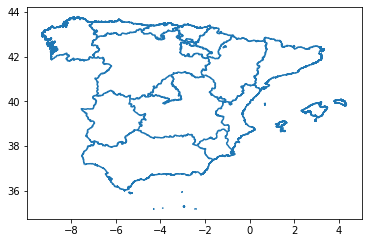

In [37]:
fp = "/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/OPCION/ll_autonomicas_inspire_peninbal_etrs89.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.plot()

In [28]:
import geopandas as gpd


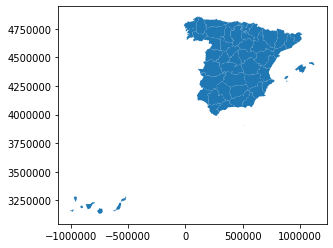

In [39]:
fp = "/home/erq/Desktop/Master Maastricht/Knowledge Graphs/Apellidos Project/OPCION/Provincias_ETRS89_30N.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe

map_df.plot()